# Abstract

This project is a binary classification problem. The aim of this project is to predict the customers that we will lose. Data consists of 51,047 instances and 58 attributes. If we focus on company goals, actually our problem is losing customers. In this situation the company needs to find churned customer in other words the customers that we will lose. Thus, the company will avoid losing profit and revenue.

# Libraries

In [1]:
!pip install xlrd
!pip install seaborn
!pip install missingno
!pip install xgboost
!pip install lightgbm
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 10.0 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from scipy.stats import randint, uniform
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neural_network import MLPClassifier
from catboost import CatBoostClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.metrics import (
    ConfusionMatrixDisplay,
    RocCurveDisplay,
    PrecisionRecallDisplay,
    roc_auc_score,
    confusion_matrix,
    precision_recall_fscore_support
)


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# DATA UNDERSTANDING

## Data Preprocessing

In [4]:
df_all=pd.read_csv('/content/drive/MyDrive/cell2celltrain.csv')
ozellik=pd.read_excel('/content/drive/MyDrive/Data_type.xlsx')

In [5]:
df_all.head()

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0     3000002   Yes           24.00           219.0                  22.0   
1     3000010   Yes           16.99            10.0                  17.0   
2     3000014    No           38.00             8.0                  38.0   
3     3000022    No           82.28          1312.0                  75.0   
4     3000026   Yes           17.14             0.0                  17.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   0.00             0.0           0.0               -4.0   
2                   0.00             0.0           0.0               -2.0   
3                   1.24             0.0           0.0              157.0   
4                   0.00             0.0           0.0                0.0   

   PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0               -19.0  ...                          0            4   
1                 0.0  ...                          0            5   
2                 0.0  ...                          0            6   
3                 8.1  ...                          0            6   
4                -0.2  ...                          0            9   

   OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0              No                          0            30   
1              No                          0            30   
2              No                          0       Unknown   
3              No                          0            10   
4              No                          1            10   

   MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                      Yes     1-Highest   Suburban  Professional   
1                       No      4-Medium   Suburban  Professional   
2                       No        3-Good       Town        Crafts   
3                       No      4-Medium      Other         Other   
4                       No     1-Highest      Other  Professional   

   MaritalStatus  
0             No  
1            Yes  
2            Yes  
3             No  
4            Yes  

[5 rows x 58 columns]

## Missing Value,Unique Value

In [ ]:
#Examine the missing values not handling part.

In [6]:
def DataFrameInfo(df):
    variable_name_list=[]
    total_entry_list=[]
    data_dype_list=[]
    unique_value_list=[]
    nunique_value_list=[]
    missing_value_list=[]
    missing_value_rate_list=[]

    mean_list=[]
    median_list=[]
    min_list=[]
    max_list=[]

    for i in df.columns:
        variable_name_list.append(i)
        total_entry_list.append(df[i].count())
        data_dype_list.append(df[i].dtype)
        unique_value_list.append(list(df[i].unique()))
        nunique_value_list.append(df[i].nunique())
        missing_value_list.append(df[i].isnull().sum())
        missing_value_rate_list.append(np.round((100*df[i].isnull().sum())/(df[i].shape[0]),4))

        if df[i].dtype in ["float64","int64"]:
            mean_list.append(np.round(df[i].mean(),2))
            median_list.append(np.round(df[i].median(),2))
            min_list.append(df[i].min())
            max_list.append(df[i].max())
        else:
            mean_list.append(np.nan)
            median_list.append(np.nan)
            min_list.append(np.nan)
            max_list.append(np.nan)



        df_info_data=pd.DataFrame({"Variable_Name":variable_name_list,
                               "Type":data_dype_list,
                               "Total_Entry":total_entry_list,
                               "Missing_Value":missing_value_list,
                               "Missing_Value_Rate":missing_value_rate_list,
                               "Unique_Values":unique_value_list,
                               "Nunique_Values":nunique_value_list,
                               "Mean":mean_list,
                               "Median":median_list,
                               "Min":min_list,
                               "Max":max_list})

    return df_info_data

In [7]:
df_info=DataFrameInfo(df_all)

In [8]:
display(df_info)

Variable_Name     Type  Total_Entry  Missing_Value  \
0                  CustomerID    int64        51047              0   
1                       Churn   object        51047              0   
2              MonthlyRevenue  float64        50891            156   
3              MonthlyMinutes  float64        50891            156   
4        TotalRecurringCharge  float64        50891            156   
5       DirectorAssistedCalls  float64        50891            156   
6              OverageMinutes  float64        50891            156   
7                RoamingCalls  float64        50891            156   
8           PercChangeMinutes  float64        50680            367   
9          PercChangeRevenues  float64        50680            367   
10               DroppedCalls  float64        51047              0   
11               BlockedCalls  float64        51047              0   
12            UnansweredCalls  float64        51047              0   
13          CustomerCareCalls  float64        51047              0   
14              ThreewayCalls  float64        51047              0   
15              ReceivedCalls  float64        51047              0   
16              OutboundCalls  float64        51047              0   
17               InboundCalls  float64        51047              0   
18             PeakCallsInOut  float64        51047              0   
19          OffPeakCallsInOut  float64        51047              0   
20        DroppedBlockedCalls  float64        51047              0   
21        CallForwardingCalls  float64        51047              0   
22           CallWaitingCalls  float64        51047              0   
23            MonthsInService    int64        51047              0   
24                 UniqueSubs    int64        51047              0   
25                 ActiveSubs    int64        51047              0   
26                ServiceArea   object        51023             24   
27                   Handsets  float64        51046              1   
28              HandsetModels  float64        51046              1   
29       CurrentEquipmentDays  float64        51046              1   
30                     AgeHH1  float64        50138            909   
31                     AgeHH2  float64        50138            909   
32               ChildrenInHH   object        51047              0   
33         HandsetRefurbished   object        51047              0   
34          HandsetWebCapable   object        51047              0   
35                 TruckOwner   object        51047              0   
36                    RVOwner   object        51047              0   
37              Homeownership   object        51047              0   
38           BuysViaMailOrder   object        51047              0   
39       RespondsToMailOffers   object        51047              0   
40             OptOutMailings   object        51047              0   
41                NonUSTravel   object        51047              0   
42               OwnsComputer   object        51047              0   
43              HasCreditCard   object        51047              0   
44             RetentionCalls    int64        51047              0   
45    RetentionOffersAccepted    int64        51047              0   
46           NewCellphoneUser   object        51047              0   
47        NotNewCellphoneUser   object        51047              0   
48  ReferralsMadeBySubscriber    int64        51047              0   
49                IncomeGroup    int64        51047              0   
50             OwnsMotorcycle   object        51047              0   
51  AdjustmentsToCreditRating    int64        51047              0   
52               HandsetPrice   object        51047              0   
53    MadeCallToRetentionTeam   object        51047              0   
54               CreditRating   object        51047              0   
55                  PrizmCode   object        51047              0   
56                 Occupat

In [10]:
df_detail=pd.read_excel("/content/drive/MyDrive/Data_type.xlsx")
df_detail=df_detail.iloc[:,-1]
df_info=pd.concat([df_info,df_detail],axis=1)

In [11]:
df_info.head()

Variable_Name     Type  Total_Entry  Missing_Value  \
0            CustomerID    int64        51047              0   
1                 Churn   object        51047              0   
2        MonthlyRevenue  float64        50891            156   
3        MonthlyMinutes  float64        50891            156   
4  TotalRecurringCharge  float64        50891            156   

   Missing_Value_Rate                                      Unique_Values  \
0              0.0000  [3000002, 3000010, 3000014, 3000022, 3000026, ...   
1              0.0000                                          [Yes, No]   
2              0.3056  [24.0, 16.99, 38.0, 82.28, 17.14, 38.05, 31.66...   
3              0.3056  [219.0, 10.0, 8.0, 1312.0, 0.0, 682.0, 26.0, 9...   
4              0.3056  [22.0, 17.0, 38.0, 75.0, 52.0, 30.0, 66.0, 35....   

   Nunique_Values        Mean      Median         Min         Max  \
0           51047  3201956.88  3201534.00  3000002.00  3399994.00   
1               2         NaN         NaN         NaN         NaN   
2           12665       58.83       48.46       -6.17     1223.38   
3            2719      525.65      366.00        0.00     7359.00   
4             214       46.83       45.00      -11.00      400.00   

           Variable  
0          Cardinal  
1           Nominal  
2  Continuous-Ratio  
3  Continuous-Ratio  
4  Continuous-Ratio

In [12]:
df_info.shape

(58, 12)

In [13]:
df_info_copy=df_info.copy()
df_info_copy.index=df_info["Variable_Name"]
df_info_copy.sort_values("Missing_Value",ascending=False,inplace=True)

cm = sns.light_palette("red", as_cmap=True)
df_info_missing_value = df_info_copy[["Missing_Value_Rate","Missing_Value"]].style.background_gradient(cmap=cm)
df_info_missing_value

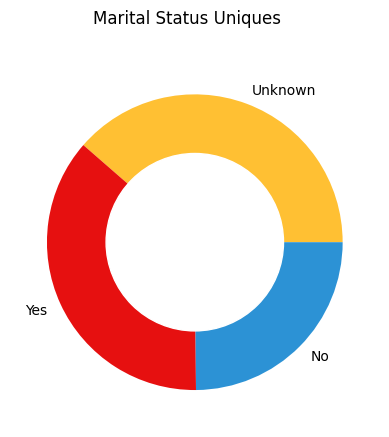

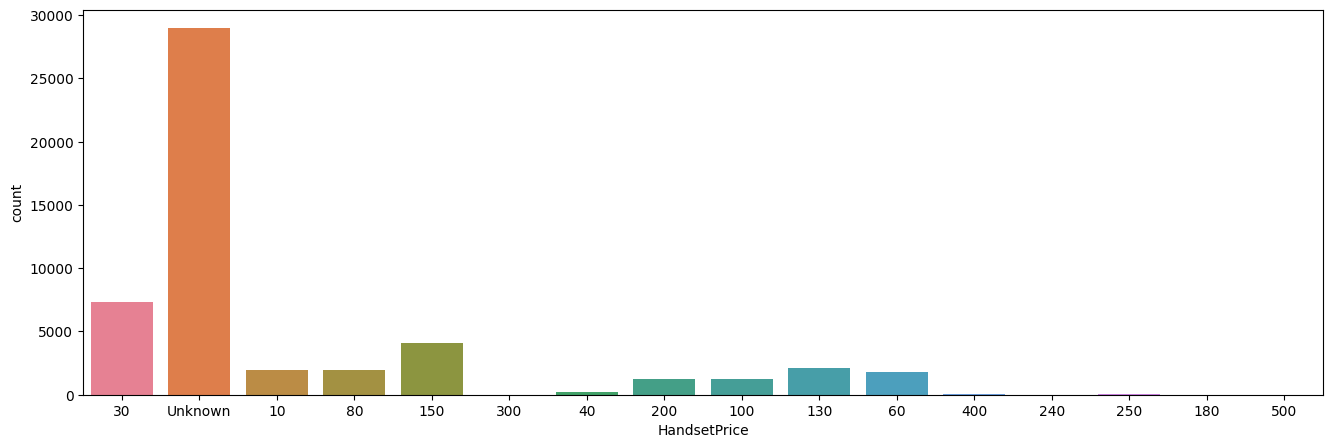

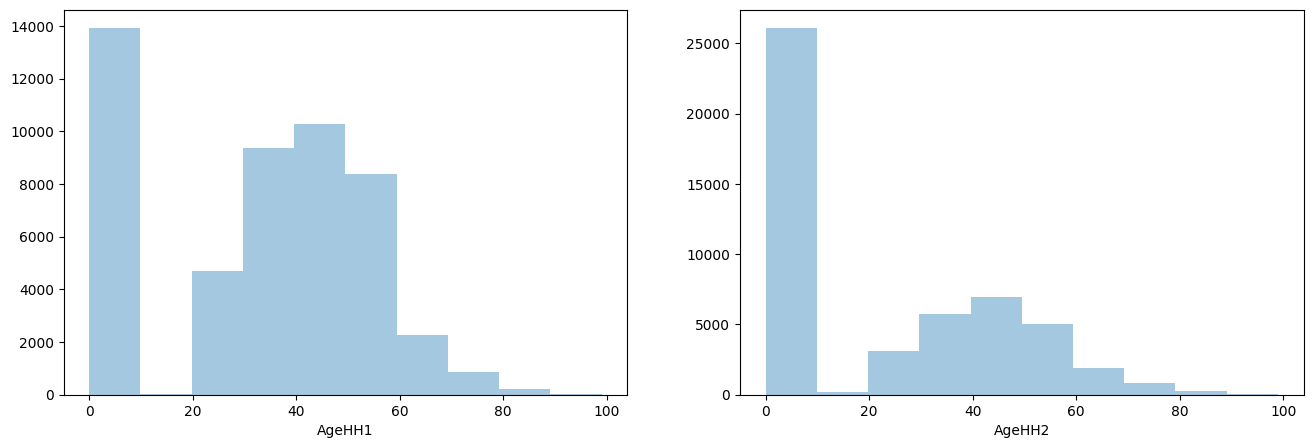

In [14]:
# We noticed that some features have "unknown" values.

val_count_MaritalStatus=pd.DataFrame(df_all["MaritalStatus"].value_counts())
col=[]
size=[]
for i in range(len(val_count_MaritalStatus)):
    col.append(val_count_MaritalStatus.index[i])
for i in range(len(val_count_MaritalStatus)):
    size.append(val_count_MaritalStatus.iloc[i,:][0])
fig=plt.figure()
fig.patch.set_facecolor('white')
plt.rcParams['text.color']='black'
graph=plt.Circle((0,0),0.6,color='white')
plt.pie(size,labels=col,colors=['#ffc033','#e61010','#2c92d5'])
p=plt.gcf()
p.gca().add_artist(graph)
fig.suptitle("Marital Status Uniques")
plt.show()
plt.figure(figsize=(16,5))

sns.countplot(x='HandsetPrice', data=df_all,palette="husl")
features_=["AgeHH1","AgeHH2"]
fig,ax=plt.subplots(1,2,figsize=(16,5))
for i in range(2):
    sns.distplot(df_all[features_[i]],ax=ax[i],kde=False,bins=10)



In [15]:
# Changing the unknown values to nan(To fill them as missing value later)

df_all['MaritalStatus'].replace("Unknown", np.nan, inplace = True)
df_all['HandsetPrice'].replace("Unknown",np.nan, inplace=True)
df_all["AgeHH1"].replace(0,np.nan,inplace=True)
df_all["AgeHH2"].replace(0,np.nan,inplace=True)

In [17]:
df_info=DataFrameInfo(df_all)
df_detail=pd.read_excel("/content/drive/MyDrive/Data_type.xlsx")
df_detail=df_detail.iloc[:,-1]            #check to remove
df_info=pd.concat([df_info,df_detail],axis=1)

In [18]:
df_info.shape

(58, 12)

In [19]:
df_all.shape

(51047, 58)

In [20]:
df_info_copy=df_info.copy()
df_info_copy.index=df_info["Variable_Name"]
df_info_copy.sort_values("Missing_Value",ascending=False,inplace=True)

cm = sns.light_palette("red", as_cmap=True)
df_info_missing_value = df_info_copy[["Missing_Value_Rate","Missing_Value"]].style.background_gradient(cmap=cm)
df_info_missing_value

In [21]:
df_info.shape

(58, 12)

## Correlation

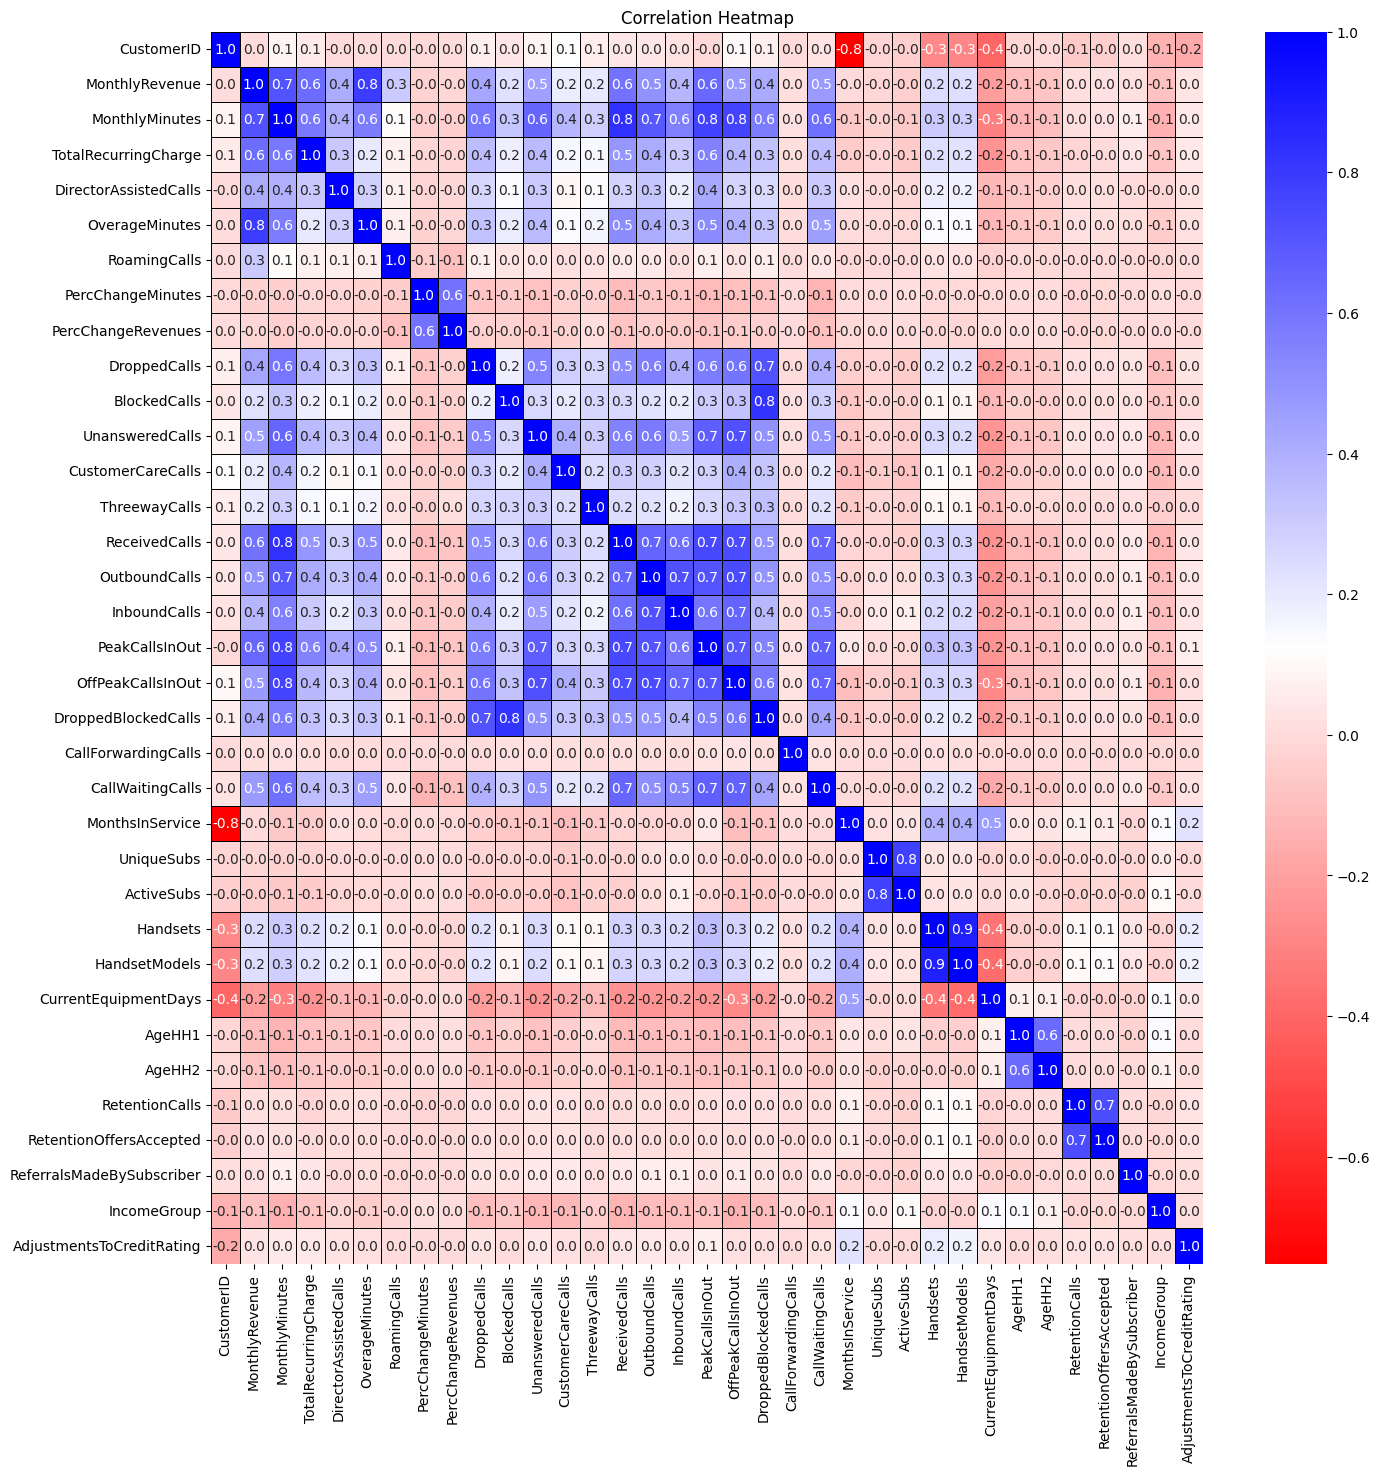

In [22]:
plt.figure(figsize=(16, 16))
sns.heatmap(df_all.select_dtypes(include=[np.number]).corr(),
            cmap="bwr_r", annot=True, fmt=".1f", linewidths=.5, linecolor="black")
plt.title("Correlation Heatmap")
plt.show()


# EXPLORATORY DATA ANALYSIS (EDA)

## Exploring the attributes that may cause churn

In [23]:
#Creating new dataframes for churned and not churned
df_churned =df_all[df_all['Churn']=='Yes']
df_not_churned= df_all[df_all['Churn']=='No']

churned= df_all[df_all['Churn']=='Yes'].shape[0]
notchurned= df_all[df_all['Churn']=='No'].shape[0]


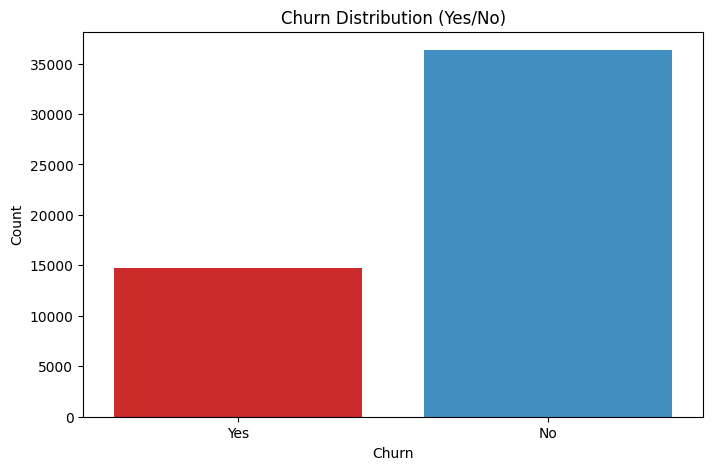

In [24]:
fig, ax = plt.subplots(figsize=(8,5))  # Only one subplot now (not 2)

sns.countplot(x="Churn", data=df_all, palette=["#e61010","#2c92d5"])
plt.title("Churn Distribution (Yes/No)")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


In [26]:
num_columns=list(df_info[((df_info["Variable"]=="Continuous-Ratio")|(df_info["Variable"]=="Continuous-Interval"))]["Variable_Name"])


In [27]:
two_unique_list=list(df_info[((df_info["Variable"]=="Nominal")|(df_info["Variable"]=="Ordinal"))&(df_info["Nunique_Values"]==2)]["Variable_Name"])
two_unique_list.remove("Churn")
order_cat_list=["CreditRating","PrizmCode","Occupation","MaritalStatus"]

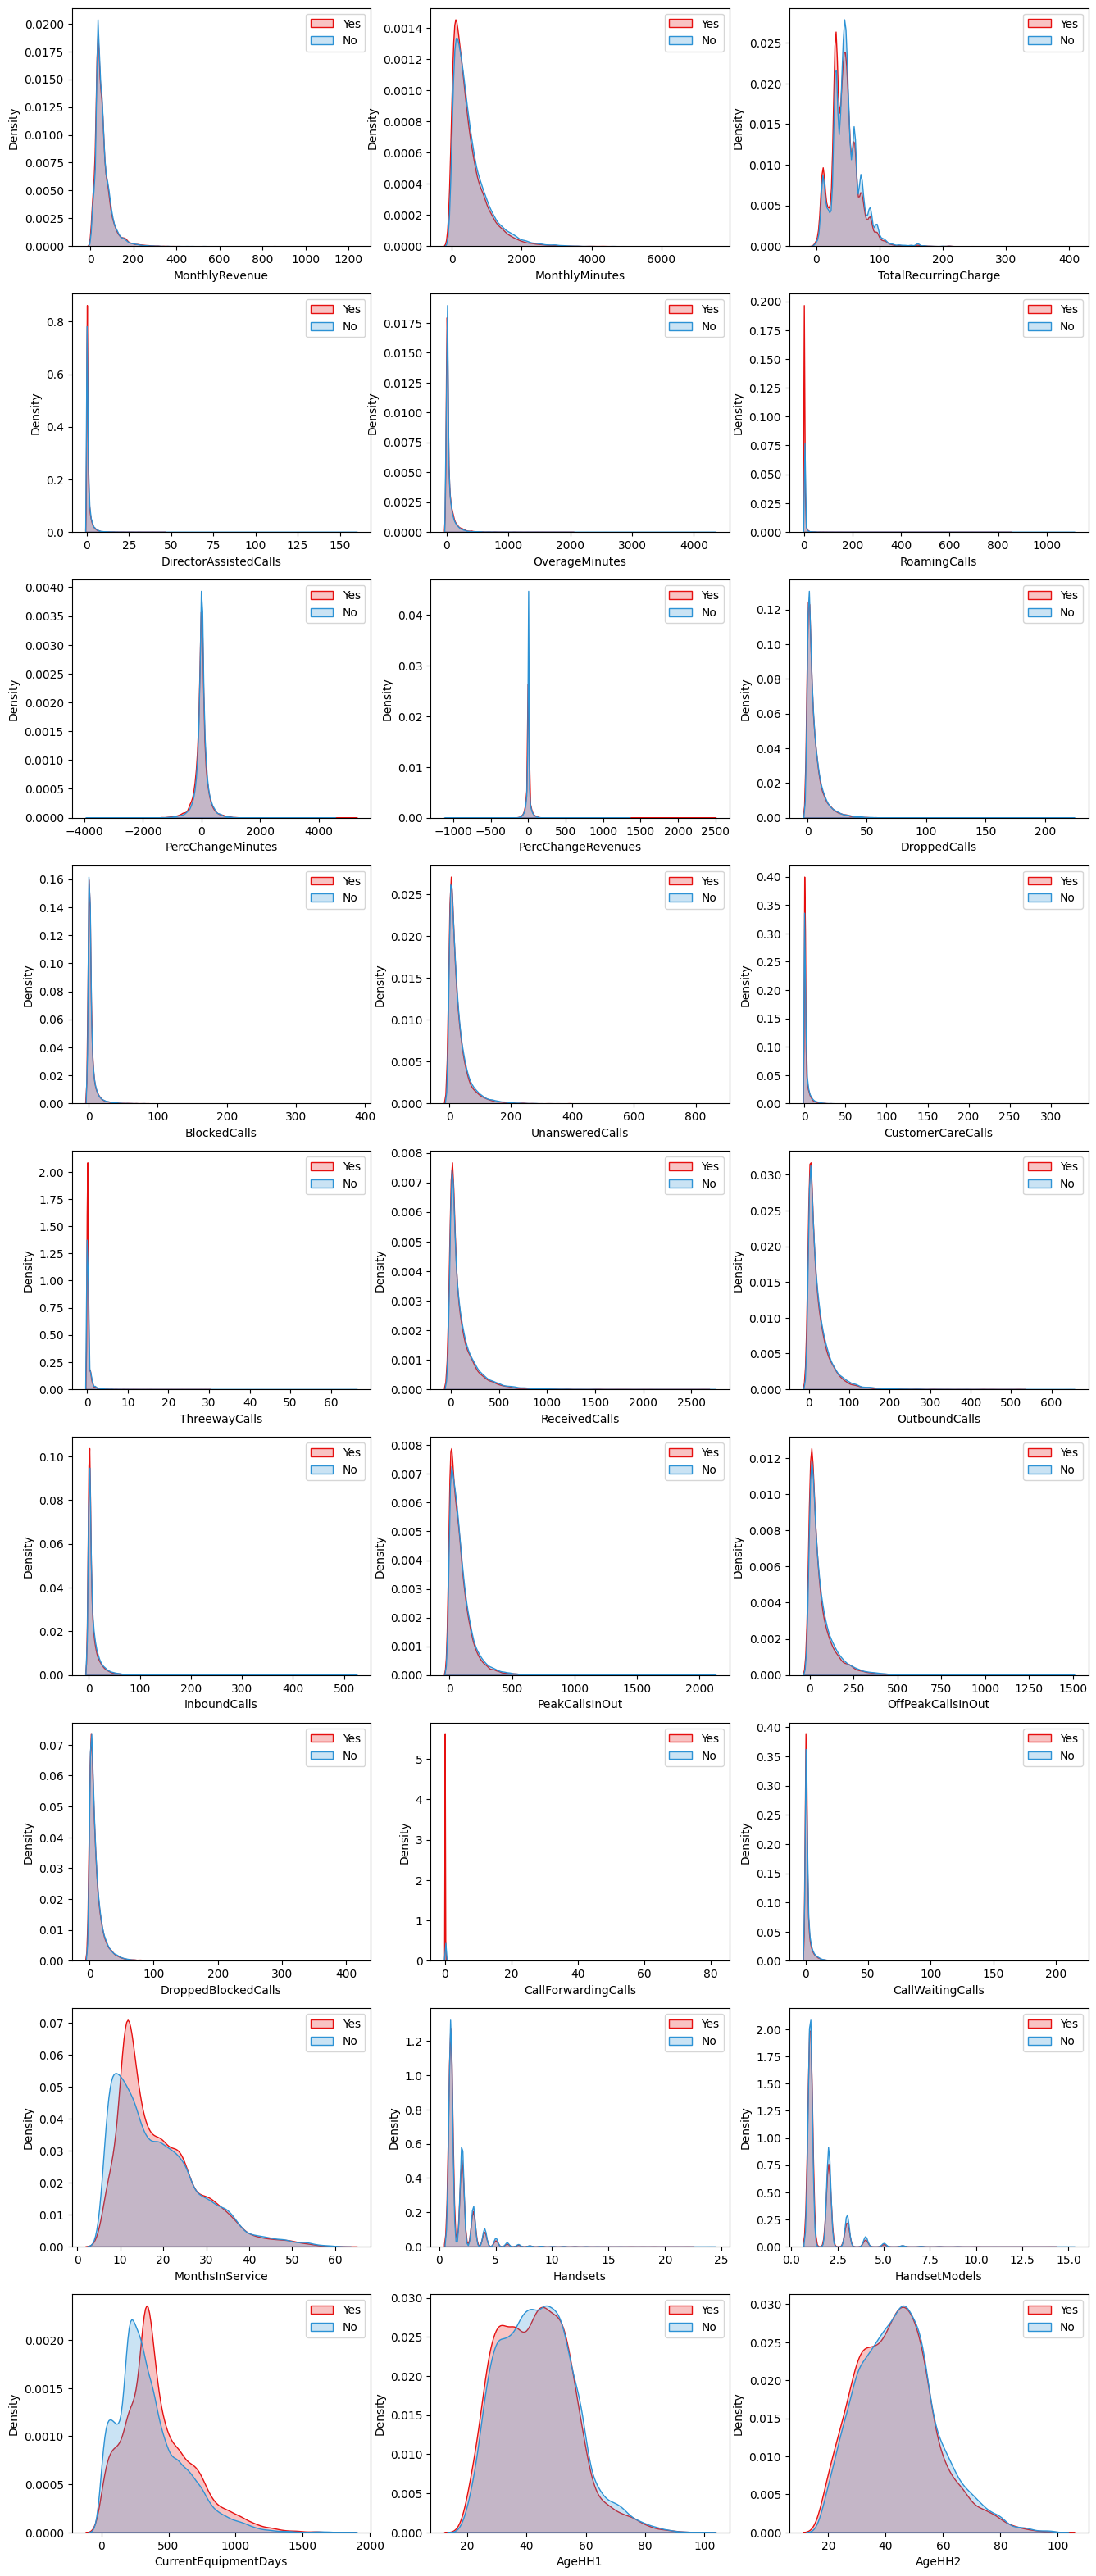

In [28]:
fig,ax=plt.subplots(9,3,figsize=(16,40))
count=0
for i in range(9):
    for j in range(3):
        sns.kdeplot(df_all[df_all["Churn"]=="Yes"][num_columns[count]],ax=ax[i][j],color="#e61010",shade=True)
        sns.kdeplot(df_all[df_all["Churn"]=="No"][num_columns[count]],ax=ax[i][j],color="#2c92d5",shade=True)
        ax[i][j].legend(loc="upper right",labels=["Yes","No"])
        count+=1

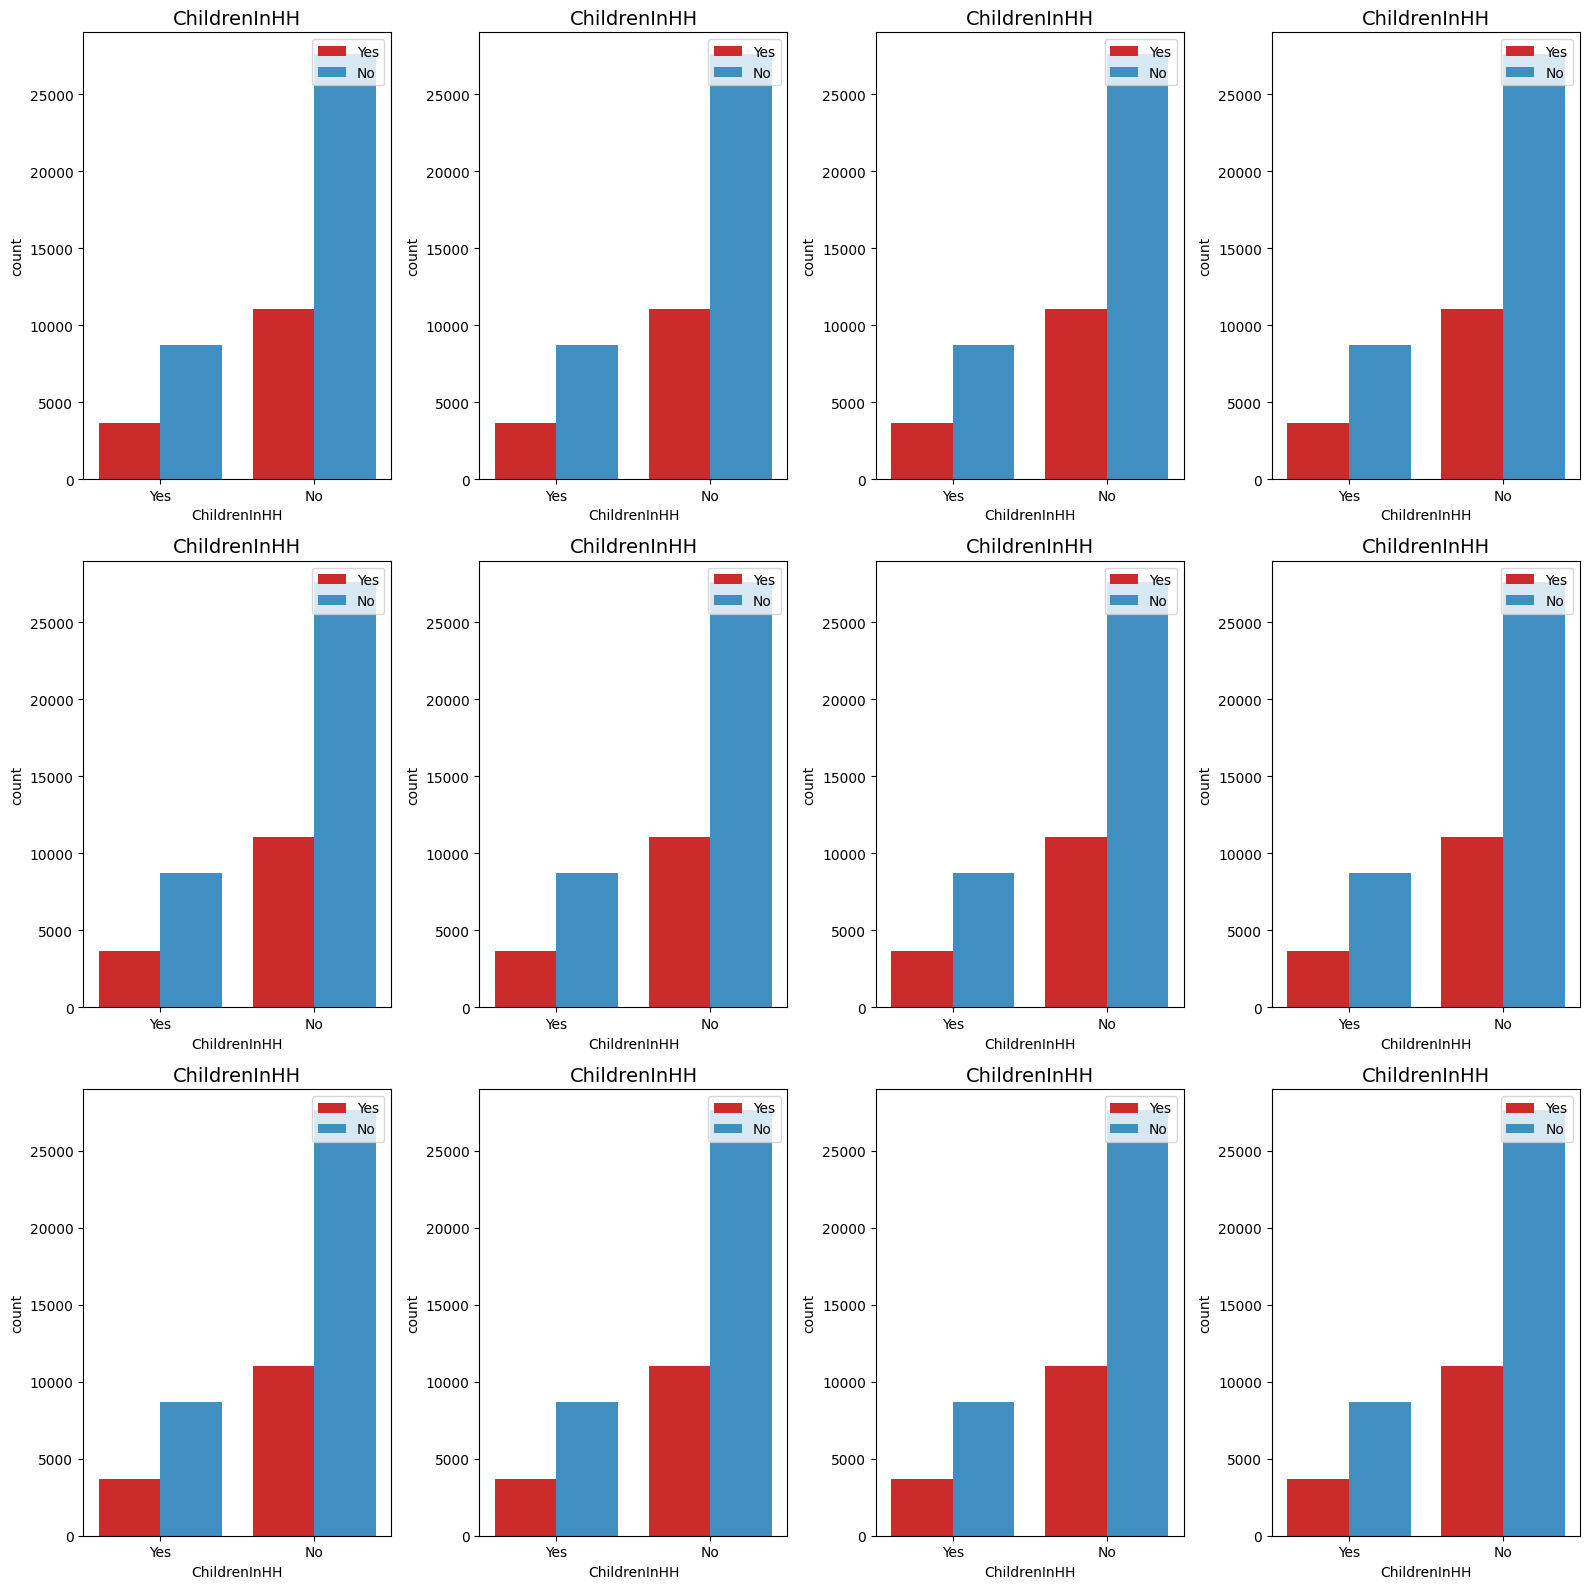

In [29]:
fig, ax = plt.subplots(nrows=3, ncols=4, figsize=(16, 16))
count = 0

for i in range(3):
    for j in range(4):
        sns.countplot(
            data=df_all,
            x=two_unique_list[count],
            hue="Churn",
            order=["Yes", "No"],
            palette=["#e61010", "#2c92d5"],
             ax=ax[i][j]
        )
        ax[i][j].set_title(two_unique_list[count], fontsize=14)
        ax[i][j].legend(loc="upper right")

plt.tight_layout()
plt.show()


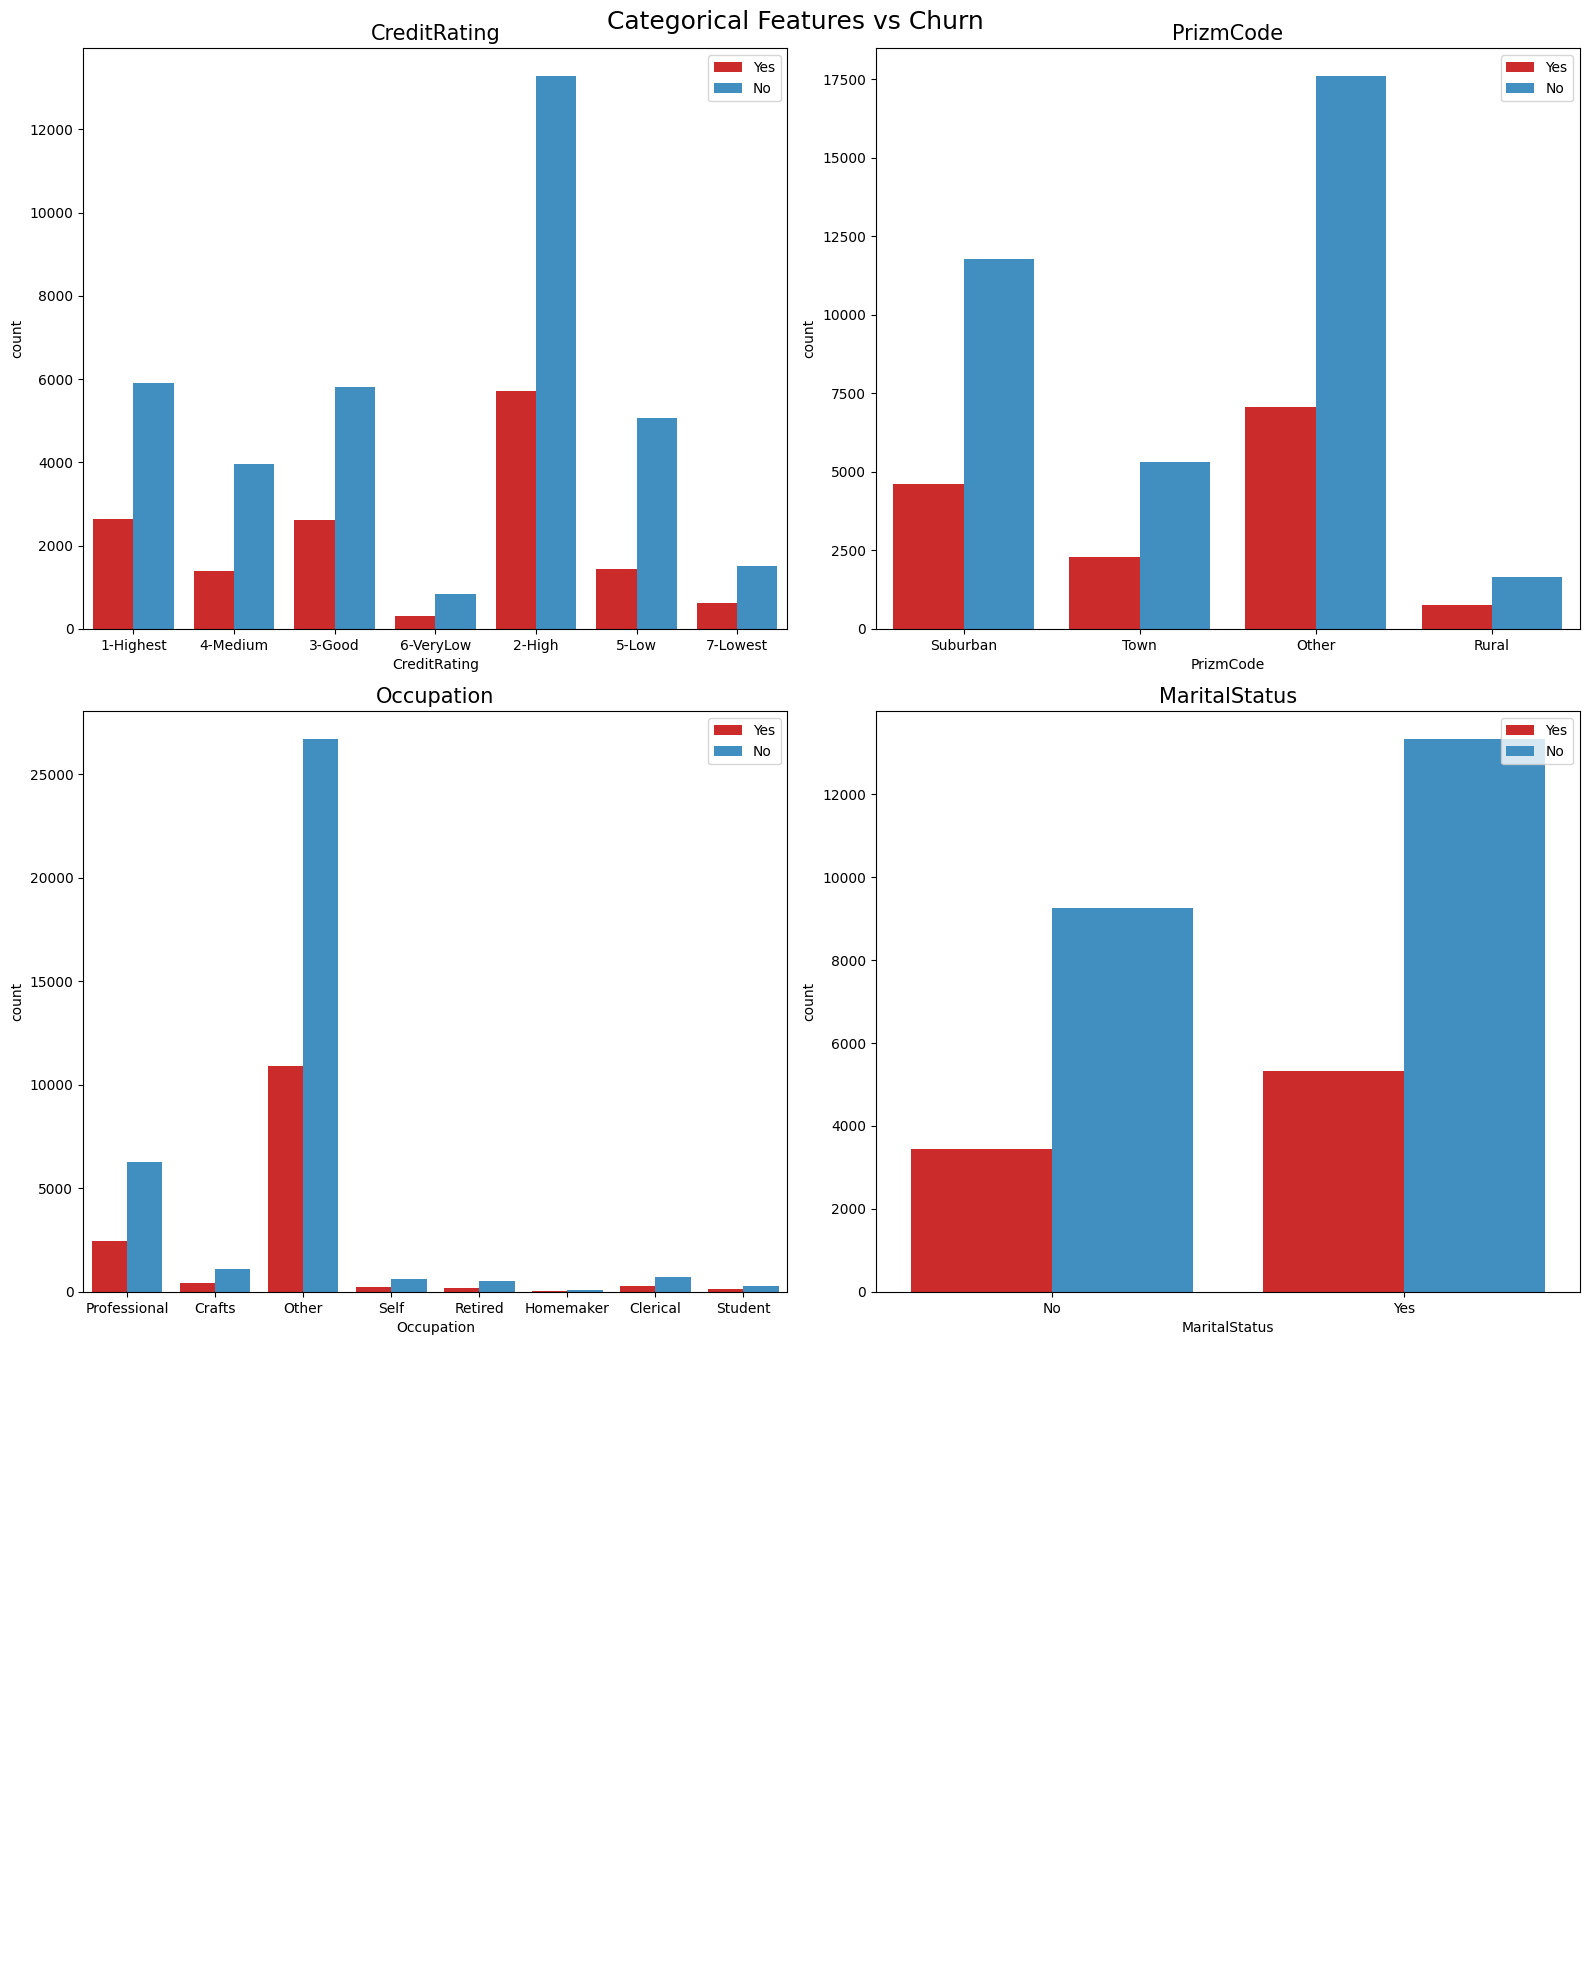

In [30]:
credit_rating_order=["1-Highest","2-High","3-Good","4-Medium","5-Low","6-VeryLow","7-Lowest"]
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 20))
count = 0

for i in range(3):
    for j in range(2):
        if count < len(order_cat_list):
            sns.countplot(
                data=df_all,
                x=order_cat_list[count],
                hue="Churn",
                ax=ax[i][j],
               # order=credit_rating_order if count == 0 else None,
                palette=["#e61010", "#2c92d5"]
            )
            ax[i][j].set_title(order_cat_list[count], fontsize=15)
            ax[i][j].legend(loc="upper right")
            count += 1
        else:
            ax[i][j].axis("off")

fig.suptitle("Categorical Features vs Churn", fontsize=18)
plt.tight_layout()
plt.show()


In [31]:
df_all["MadeCallToRetentionTeam"][:5]

0    Yes
1     No
2     No
3     No
4     No
Name: MadeCallToRetentionTeam, dtype: object

In [32]:
df_all['MadeCallToRetentionTeam'].isna().sum()

np.int64(0)

In [33]:
#We need a dataframe that keeps the data of the customer doing the retentioncall.
#Lets see how many of the customers who made a retention call then churn.

df_whodidretentioncall = df_all[df_all['MadeCallToRetentionTeam']=='Yes']

In [34]:
print("Number of customer who churn after retentioncall {}".format(df_whodidretentioncall[df_whodidretentioncall['Churn']=='Yes'].shape[0]))
print("Number of customer who don't churn after retentioncall {}".format(df_whodidretentioncall[df_whodidretentioncall['Churn']=='No'].shape[0]))

Number of customer who churn after retentioncall 786
Number of customer who don't churn after retentioncall 959


In [35]:
df_whodidretentioncall.shape[0] # total 1745 retention call

1745

1745 retention calls were made from 51047 customers. 959 of them chose to stay with us, it means non churned.

#### Sucess rate of retention calls

In [36]:
#Non churn/total
print ("Success rate of calls {}".format(df_whodidretentioncall[df_whodidretentioncall['Churn']=='No'].shape[0]/df_whodidretentioncall.shape[0]))

Success rate of calls 0.5495702005730659


<Axes: xlabel='count', ylabel='Churn'>

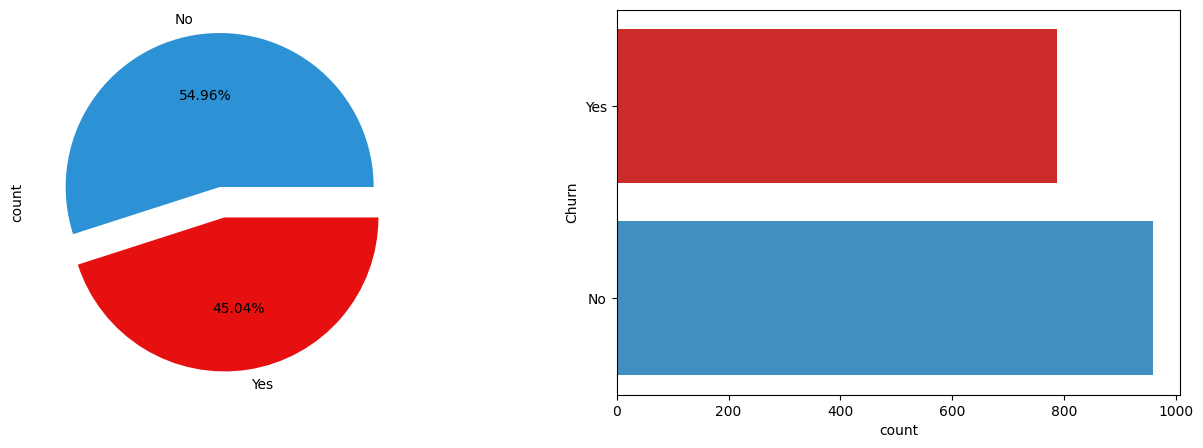

In [37]:
fig,ax=plt.subplots(ncols=2,figsize=(16,5)) #(Yes:1, No:0)
df_whodidretentioncall["Churn"].value_counts().plot.pie(autopct="%.2f%%",colors=["#2c92d5","#e61010"],explode = (0.1, 0.1),ax=ax[0])
sns.countplot(df_whodidretentioncall["Churn"],ax=ax[1],palette=["#e61010","#2c92d5"])

In [38]:
df_all["RetentionOffersAccepted"]

0        0
1        0
2        0
3        0
4        0
        ..
51042    0
51043    0
51044    0
51045    0
51046    1
Name: RetentionOffersAccepted, Length: 51047, dtype: int64

In [39]:
df_ret_offer_accept = df_all[df_all['RetentionOffersAccepted']== 1]
musteri_retoffer = df_ret_offer_accept.shape[0]
print("Customers who accept the Retention offer  {}".format(musteri_retoffer))

Customers who accept the Retention offer  837


In [40]:
print("Number of customers who is churned after accepting the retention offer {}".format(df_ret_offer_accept[df_ret_offer_accept['Churn']=='Yes'].shape[0]))
print("Number of customers who is not churned after accepting the retention offer {}".format(df_ret_offer_accept[df_ret_offer_accept['Churn']=='No'].shape[0]))

Number of customers who is churned after accepting the retention offer 343
Number of customers who is not churned after accepting the retention offer 494


# TRAIN TEST VALIDATION SPLIT

The dataset splits into three subsets:

        training set size 80%
        test set size 10%
        validation set size 10%

In [41]:

X=df_all.drop(["Churn"],axis=1)
y=df_all[["Churn"]]

def train_val_test_split(X, y, train_size, val_size, test_size):

    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = test_size,random_state=42)
    relative_train_size = train_size / (val_size + train_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      train_size = relative_train_size, test_size = 1-relative_train_size,random_state=42)
    return X_train, X_val, X_test, y_train, y_val, y_test


train_size = 0.8
val_size = 0.1
test_size = 0.1

X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X, y, train_size, val_size, test_size)

In [42]:
# Subsets are added
df_train=pd.concat([X_train,y_train],axis=1)
df_test=pd.concat([X_test,y_test],axis=1)
df_val=pd.concat([X_val,y_val],axis=1)

In [43]:
df_train.head()

CustomerID  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
43543     3345494           35.84           600.0                  45.0   
49664     3389450           40.98           160.0                  50.0   
29423     3233582           52.61           314.0                  54.0   
27685     3219238           34.74           163.0                  30.0   
26167     3206718           67.71           546.0                  48.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
43543                   0.00             2.0           0.2              191.0   
49664                   0.99             0.0           0.0              -96.0   
29423                   1.49             0.0           1.2               69.0   
27685                   0.50             2.0           3.2               86.0   
26167                   7.92            59.0           0.0              290.0   

       PercChangeRevenues  DroppedCalls  ...  IncomeGroup  OwnsMotorcycle  \
43543                -0.8          11.0  ...            1              No   
49664                -1.0           1.7  ...            2              No   
29423                -0.6           6.7  ...            0              No   
27685                11.2           1.7  ...            6              No   
26167                40.1           3.3  ...            7              No   

       AdjustmentsToCreditRating  HandsetPrice  MadeCallToRetentionTeam  \
43543                          0           NaN                       No   
49664                          0           NaN                       No   
29423                          0            30                       No   
27685                          0            10                       No   
26167                          0           NaN                       No   

       CreditRating  PrizmCode    Occupation  MaritalStatus  Churn  
43543        2-High      Other         Other            Yes    Yes  
49664        2-High       Town         Other             No     No  
29423        3-Good       Town         Other            NaN     No  
27685        2-High      Rural         Other            Yes     No  
26167        2-High   Suburban  Professional            NaN     No  

[5 rows x 58 columns]

In [44]:
df_test.head()

CustomerID  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
14589     3114822           34.43           314.0                  30.0   
5048      3039574           30.00           153.0                  30.0   
7616      3059830           61.11           328.0                  57.0   
30623     3243582           14.31           350.0                  10.0   
11037     3087070           30.25           174.0                  30.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
14589                   0.00             5.0           2.6              -12.0   
5048                    0.00             0.0           0.0               10.0   
7616                    0.99            22.0           0.0             -328.0   
30623                   0.00             1.0           0.0             -150.0   
11037                   0.25             0.0           0.0               56.0   

       PercChangeRevenues  DroppedCalls  ...  IncomeGroup  OwnsMotorcycle  \
14589                -1.2           9.0  ...            5              No   
5048                  0.0           0.7  ...            4             Yes   
7616                 -6.5           6.7  ...            5              No   
30623                -0.3           0.0  ...            7              No   
11037                -0.2           2.3  ...            8              No   

       AdjustmentsToCreditRating  HandsetPrice  MadeCallToRetentionTeam  \
14589                          0           NaN                       No   
5048                           1           NaN                       No   
7616                           0            30                       No   
30623                          0           NaN                       No   
11037                          0            30                       No   

       CreditRating  PrizmCode    Occupation  MaritalStatus  Churn  
14589        2-High      Rural  Professional            Yes     No  
5048         3-Good      Other         Other             No     No  
7616         3-Good      Rural  Professional            Yes    Yes  
30623        2-High      Other     Homemaker            Yes    Yes  
11037        2-High      Other  Professional            Yes     No  

[5 rows x 58 columns]

In [45]:
df_val.head()

CustomerID  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
4332      3034006           33.23           228.0                  32.0   
20054     3157074           50.44           509.0                  60.0   
26075     3205966           57.10          1345.0                  60.0   
17151     3134334           38.10           503.0                  38.0   
4808      3037670           31.50            60.0                  30.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
4332                    0.74             0.0           0.0              -79.0   
20054                   0.00             0.0           0.0              114.0   
26075                   0.99            29.0           0.0              -72.0   
17151                   0.00             2.0           0.0              -80.0   
4808                    1.24             0.0           0.0               27.0   

       PercChangeRevenues  DroppedCalls  ...  IncomeGroup  OwnsMotorcycle  \
4332                 -0.7           2.3  ...            9              No   
20054                -0.4           1.0  ...            6              No   
26075                -2.1          13.7  ...            6              No   
17151               -38.1           2.0  ...            9              No   
4808                 -0.5           1.3  ...            0              No   

       AdjustmentsToCreditRating  HandsetPrice  MadeCallToRetentionTeam  \
4332                           0            30                       No   
20054                          0           NaN                       No   
26075                          0           150                       No   
17151                          0           NaN                       No   
4808                           0           NaN                       No   

       CreditRating  PrizmCode    Occupation  MaritalStatus  Churn  
4332      1-Highest   Suburban          Self             No     No  
20054        2-High      Other  Professional            Yes     No  
26075     1-Highest   Suburban         Other             No     No  
17151        2-High       Town         Other            NaN    Yes  
4808      1-Highest      Other         Other            NaN    Yes  

[5 rows x 58 columns]

# OUTLIER HANDLING

In [46]:
df_outlier=df_all.copy()

In [47]:
sparse_columns=[]
for col in num_columns:
    if (df_train[col].quantile(0.01)==df_train[col].quantile(0.25)==df_train[col].mode()[0]):
        sparse_columns.append(col)

In [48]:
iqr_df = pd.DataFrame(index = num_columns, columns = ["Q1","Q3","IQR","Lower-Bound","Lower-Outlier-Value","Upper-Bound","Upper-Outlier-Value", "#-of-Outliers"])
df_train_outlier_cleaned = df_train.copy()

for col in num_columns:

  if col not in sparse_columns :
    q1 = df_train_outlier_cleaned.describe().loc['25%',col]
    q3 = df_train_outlier_cleaned.describe().loc['75%',col]
    iqr = q3 - q1
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    number_of_outlier = df_train_outlier_cleaned.loc[(df_train_outlier_cleaned.loc[:,col]<lower_bound) | (df_train_outlier_cleaned.loc[:,col]>upper_bound)].shape[0]

    print("Sparse:",col)

    if lower_bound < 0:
      lower_outlier_value = lower_bound * 1.25
    else:
      lower_outlier_value = lower_bound * 0.75

    iqr_df.loc[col,:] = [q1,q3,iqr,lower_bound,lower_outlier_value,upper_bound,upper_bound*1.25,number_of_outlier]

    df_train_outlier_cleaned.loc[(df_train_outlier_cleaned.loc[:,col]<lower_bound),col] =  lower_outlier_value
    df_train_outlier_cleaned.loc[(df_train_outlier_cleaned.loc[:,col]>upper_bound),col] =  upper_bound*1.25

  else:
    most_frequent_item = df_train_outlier_cleaned[col].mode()[0]
    nonsparse_data = pd.DataFrame(df_train_outlier_cleaned[df_train_outlier_cleaned[col] != most_frequent_item][col])

    print("Non-Sparse:",col)

    q1 = nonsparse_data.describe().loc['25%',col]
    # print("q1 =",q1, col)
    q3 = nonsparse_data.describe().loc['75%',col]
    # print("q3 =",q3, col)
    iqr = q3 - q1
    # print("iqr =",iqr, col)
    upper_bound = q3 + 1.5*iqr
    lower_bound = q1 - 1.5*iqr
    number_of_outlier = nonsparse_data.loc[(nonsparse_data.loc[:,col]<lower_bound) | (nonsparse_data.loc[:,col]>upper_bound)].shape[0]

    if lower_bound < 0:
      lower_outlier_value = lower_bound * 1.25
      df_train_outlier_cleaned.loc[(df_train_outlier_cleaned.loc[:,col]<lower_bound) & (df_train_outlier_cleaned.loc[:,col] != 0),col] =  lower_outlier_value # lower_bound - 0.25*iqr olabilir
      # print("lower_bound negatif")
    else:
      lower_outlier_value = lower_bound * 0.75
      df_train_outlier_cleaned.loc[(df_train_outlier_cleaned.loc[:,col]<lower_bound) & (df_train_outlier_cleaned.loc[:,col] != 0),col] =  lower_outlier_value # lower_bound - 0.25*iqr olabilir
      # print("lower_bound pozitif")

    iqr_df.loc[col,:] = [q1,q3,iqr,lower_bound,lower_outlier_value,upper_bound,upper_bound*1.25,number_of_outlier]

    df_train_outlier_cleaned.loc[(df_train_outlier_cleaned.loc[:,col]>upper_bound),col] =  upper_bound*1.25 # upper_bound + 0.25*iqr olabilir

iqr_df

Sparse: MonthlyRevenue
Sparse: MonthlyMinutes
Sparse: TotalRecurringCharge
Non-Sparse: DirectorAssistedCalls
Non-Sparse: OverageMinutes
Non-Sparse: RoamingCalls
Sparse: PercChangeMinutes
Sparse: PercChangeRevenues
Sparse: DroppedCalls
Non-Sparse: BlockedCalls
Sparse: UnansweredCalls
Non-Sparse: CustomerCareCalls
Non-Sparse: ThreewayCalls
Sparse: ReceivedCalls
Sparse: OutboundCalls
Non-Sparse: InboundCalls
Sparse: PeakCallsInOut
Sparse: OffPeakCallsInOut
Sparse: DroppedBlockedCalls
Non-Sparse: CallForwardingCalls
Non-Sparse: CallWaitingCalls
Sparse: MonthsInService
Non-Sparse: Handsets
Non-Sparse: HandsetModels
Sparse: CurrentEquipmentDays
Sparse: AgeHH1
Sparse: AgeHH2


Q1     Q3    IQR Lower-Bound Lower-Outlier-Value  \
MonthlyRevenue         33.56  71.01  37.45     -22.615           -28.26875   
MonthlyMinutes         158.0  722.0  564.0      -688.0              -860.0   
TotalRecurringCharge    30.0   60.0   30.0       -15.0              -18.75   
DirectorAssistedCalls   0.25   1.98   1.73      -2.345            -2.93125   
OverageMinutes          12.0   88.0   76.0      -102.0              -127.5   
RoamingCalls             0.3    3.0    2.7       -3.75             -4.6875   
PercChangeMinutes      -84.0   66.0  150.0      -309.0             -386.25   
PercChangeRevenues      -7.1    1.6    8.7      -20.15            -25.1875   
DroppedCalls             0.7    7.7    7.0        -9.8              -12.25   
BlockedCalls             0.7    5.3    4.6        -6.2               -7.75   
UnansweredCalls          5.0   36.3   31.3      -41.95            -52.4375   
CustomerCareCalls        0.7    5.0    4.3       -5.75             -7.1875   
ThreewayCalls            0.3    1.0    0.7       -0.75             -0.9375   
ReceivedCalls            8.4  153.7  145.3     -209.55           -261.9375   
OutboundCalls            3.3   34.0   30.7      -42.75            -53.4375   
InboundCalls             1.7   13.7   12.0       -16.3             -20.375   
PeakCallsInOut          23.0  120.7   97.7     -123.55           -154.4375   
OffPeakCallsInOut       11.0   88.7   77.7     -105.55           -131.9375   
DroppedBlockedCalls      1.7   12.3   10.6       -14.2              -17.75   
CallForwardingCalls      0.3    1.3    1.0        -1.2                -1.5   
CallWaitingCalls         0.7    3.7    3.0        -3.8               -4.75   
MonthsInService         11.0   24.0   13.0        -8.5             -10.625   
Handsets                 2.0    3.0    1.0         0.5               0.375   
HandsetModels            2.0    3.0    1.0         0.5               0.375   
CurrentEquipmentDays   205.0  518.0  313.0      -264.5            -330.625   
AgeHH1                  34.0   52.0   18.0         7.0                5.25   
AgeHH2                  34.0   52.0   18.0         7.0                5.25   

                      Upper-Bound Upper-Outlier-Value #-of-Outliers  
MonthlyRevenue            127.185           158.98125          2404  
MonthlyMinutes             1568.0              1960.0          2047  
TotalRecurringCharge        105.0              131.25           654  
DirectorAssistedCalls       4.575             5.71875          1736  
OverageMinutes              202.0               252.5          1837  
RoamingCalls                 7.05              8.8125          1472  
PercChangeMinutes           291.0              363.75          5435  
PercChangeRevenues          14.65             18.3125         10626  
DroppedCalls                 18.2               22.75          2979  
BlockedCalls                 12.2               15.25          3141  
UnansweredCalls             83.25            104.0625          2869  
CustomerCareCalls           11.45             14.3125          1487  
ThreewayCalls                2.05              2.5625          1132  
ReceivedCalls              371.65            464.5625          2894  
OutboundCalls               80.05            100.0625          2622  
InboundCalls                 31.7              39.625          2481  
PeakCallsInOut             267.25            334.0625          2247  
OffPeakCallsInOut          205.25            256.5625          2867  
DroppedBlockedCalls          28.2               35.25          3123  
CallForwardingCalls           2.8                 3.5            22  
CallWaitingCalls              8.2               10.25          2182  
MonthsInService              43.5              54.375           959  
Handsets                      4.5               5.625          1760  
HandsetModels                 4.5               5.625           583  
CurrentEquipmentDays        987.5            1234.375          1098  
AgeHH1               

In [49]:
number_of_outlier_test = pd.DataFrame(index = num_columns, columns = ["#-of-Outliers"])
df_test_outlier_cleaned = df_test.copy()

for col in num_columns:

  if col not in sparse_columns:
    number_of_outlier_test.loc[col,"#-of-Outliers"] = df_test_outlier_cleaned.loc[(df_test_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) | (df_test_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"])].shape[0]

    print("Sparce:",col)

    df_test_outlier_cleaned.loc[(df_test_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]),col] =  iqr_df.loc[col,"Lower-Outlier-Value"]
    df_test_outlier_cleaned.loc[(df_test_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"]),col] =  iqr_df.loc[col,"Upper-Outlier-Value"]

  else: # sparse
    most_frequent_item = df_test_outlier_cleaned[col].mode()[0]
    nonsparse_data = pd.DataFrame(df_test_outlier_cleaned[df_test_outlier_cleaned[col] != most_frequent_item][col])

    print("Non-Sparce:",col)

    number_of_outlier_test.loc[col,"#-of-Outliers"] = nonsparse_data.loc[(nonsparse_data.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) | (nonsparse_data.loc[:,col]>iqr_df.loc[col,"Upper-Bound"])].shape[0]

    df_test_outlier_cleaned.loc[(df_test_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) & (df_test_outlier_cleaned.loc[:,col] != 0),col] =  iqr_df.loc[col,"Lower-Outlier-Value"]
    df_test_outlier_cleaned.loc[(df_test_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"]),col] =  iqr_df.loc[col,"Upper-Outlier-Value"]

number_of_outlier_test

Sparce: MonthlyRevenue
Sparce: MonthlyMinutes
Sparce: TotalRecurringCharge
Non-Sparce: DirectorAssistedCalls
Non-Sparce: OverageMinutes
Non-Sparce: RoamingCalls
Sparce: PercChangeMinutes
Sparce: PercChangeRevenues
Sparce: DroppedCalls
Non-Sparce: BlockedCalls
Sparce: UnansweredCalls
Non-Sparce: CustomerCareCalls
Non-Sparce: ThreewayCalls
Sparce: ReceivedCalls
Sparce: OutboundCalls
Non-Sparce: InboundCalls
Sparce: PeakCallsInOut
Sparce: OffPeakCallsInOut
Sparce: DroppedBlockedCalls
Non-Sparce: CallForwardingCalls
Non-Sparce: CallWaitingCalls
Sparce: MonthsInService
Non-Sparce: Handsets
Non-Sparce: HandsetModels
Sparce: CurrentEquipmentDays
Sparce: AgeHH1
Sparce: AgeHH2


#-of-Outliers
MonthlyRevenue                  297
MonthlyMinutes                  266
TotalRecurringCharge             88
DirectorAssistedCalls           222
OverageMinutes                  228
RoamingCalls                    179
PercChangeMinutes               645
PercChangeRevenues             1274
DroppedCalls                    369
BlockedCalls                    401
UnansweredCalls                 380
CustomerCareCalls               180
ThreewayCalls                   159
ReceivedCalls                   365
OutboundCalls                   367
InboundCalls                    299
PeakCallsInOut                  314
OffPeakCallsInOut               388
DroppedBlockedCalls             411
CallForwardingCalls               2
CallWaitingCalls                291
MonthsInService                 120
Handsets                        214
HandsetModels                    73
CurrentEquipmentDays            132
AgeHH1                           31
AgeHH2                           34

In [50]:
number_of_outlier_val = pd.DataFrame(index = num_columns, columns = ["#-of-Outliers"])
df_val_outlier_cleaned = df_val.copy()

for col in num_columns:

  if col not in sparse_columns:
    number_of_outlier_val.loc[col,"#-of-Outliers"] = df_val_outlier_cleaned.loc[(df_val_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) | (df_val_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"])].shape[0]

    print("Sparce",col)

    df_val_outlier_cleaned.loc[(df_val_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]),col] =  iqr_df.loc[col,"Lower-Outlier-Value"]
    df_val_outlier_cleaned.loc[(df_val_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"]),col] =  iqr_df.loc[col,"Upper-Outlier-Value"]

  else: # sparse
    most_frequent_item = df_val_outlier_cleaned[col].mode()[0]
    nonsparse_data = pd.DataFrame(df_val_outlier_cleaned[df_val_outlier_cleaned[col] != most_frequent_item][col])

    print("Non-Sparse:",col)

    number_of_outlier_val.loc[col,"#-of-Outliers"] = nonsparse_data.loc[(nonsparse_data.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) | (nonsparse_data.loc[:,col]>iqr_df.loc[col,"Upper-Bound"])].shape[0]

    df_val_outlier_cleaned.loc[(df_val_outlier_cleaned.loc[:,col]<iqr_df.loc[col,"Lower-Bound"]) & (df_val_outlier_cleaned.loc[:,col] != 0),col] =  iqr_df.loc[col,"Lower-Outlier-Value"]
    df_val_outlier_cleaned.loc[(df_val_outlier_cleaned.loc[:,col]>iqr_df.loc[col,"Upper-Bound"]),col] =  iqr_df.loc[col,"Upper-Outlier-Value"]

number_of_outlier_val

Sparce MonthlyRevenue
Sparce MonthlyMinutes
Sparce TotalRecurringCharge
Non-Sparse: DirectorAssistedCalls
Non-Sparse: OverageMinutes
Non-Sparse: RoamingCalls
Sparce PercChangeMinutes
Sparce PercChangeRevenues
Sparce DroppedCalls
Non-Sparse: BlockedCalls
Sparce UnansweredCalls
Non-Sparse: CustomerCareCalls
Non-Sparse: ThreewayCalls
Sparce ReceivedCalls
Sparce OutboundCalls
Non-Sparse: InboundCalls
Sparce PeakCallsInOut
Sparce OffPeakCallsInOut
Sparce DroppedBlockedCalls
Non-Sparse: CallForwardingCalls
Non-Sparse: CallWaitingCalls
Sparce MonthsInService
Non-Sparse: Handsets
Non-Sparse: HandsetModels
Sparce CurrentEquipmentDays
Sparce AgeHH1
Sparce AgeHH2


#-of-Outliers
MonthlyRevenue                  298
MonthlyMinutes                  264
TotalRecurringCharge             82
DirectorAssistedCalls           222
OverageMinutes                  213
RoamingCalls                    180
PercChangeMinutes               652
PercChangeRevenues             1321
DroppedCalls                    364
BlockedCalls                    424
UnansweredCalls                 356
CustomerCareCalls               202
ThreewayCalls                   138
ReceivedCalls                   374
OutboundCalls                   353
InboundCalls                    312
PeakCallsInOut                  297
OffPeakCallsInOut               369
DroppedBlockedCalls             402
CallForwardingCalls               2
CallWaitingCalls                270
MonthsInService                 139
Handsets                        208
HandsetModels                    74
CurrentEquipmentDays            152
AgeHH1                           21
AgeHH2                           37

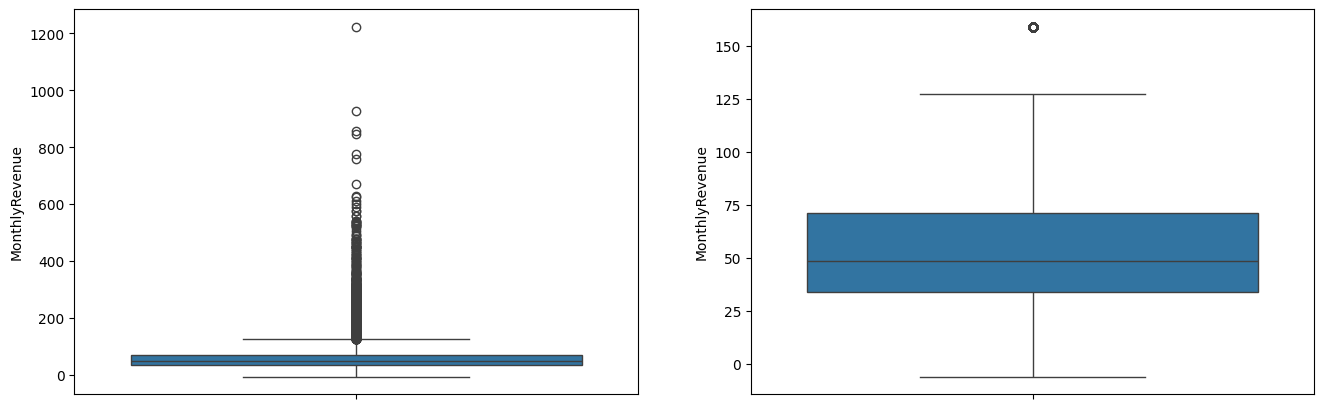

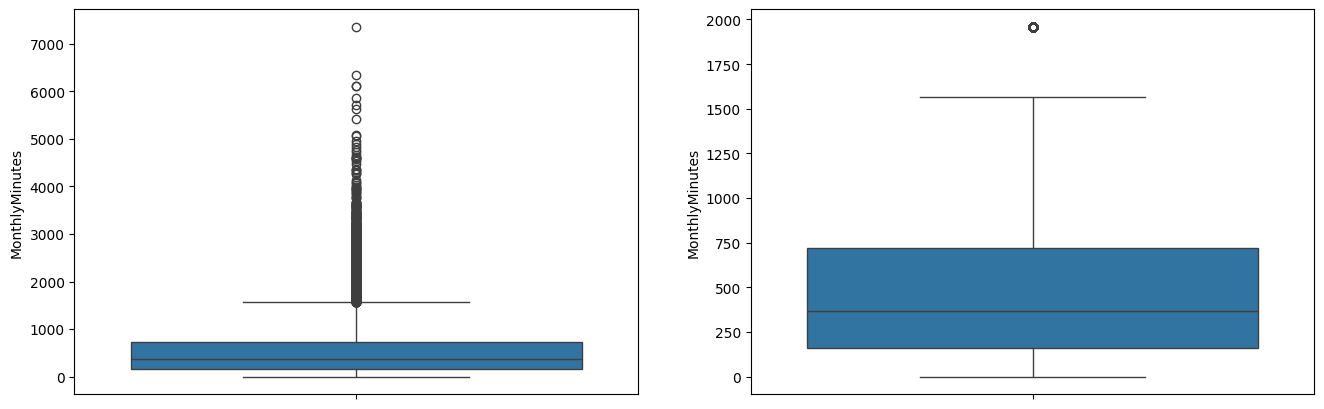

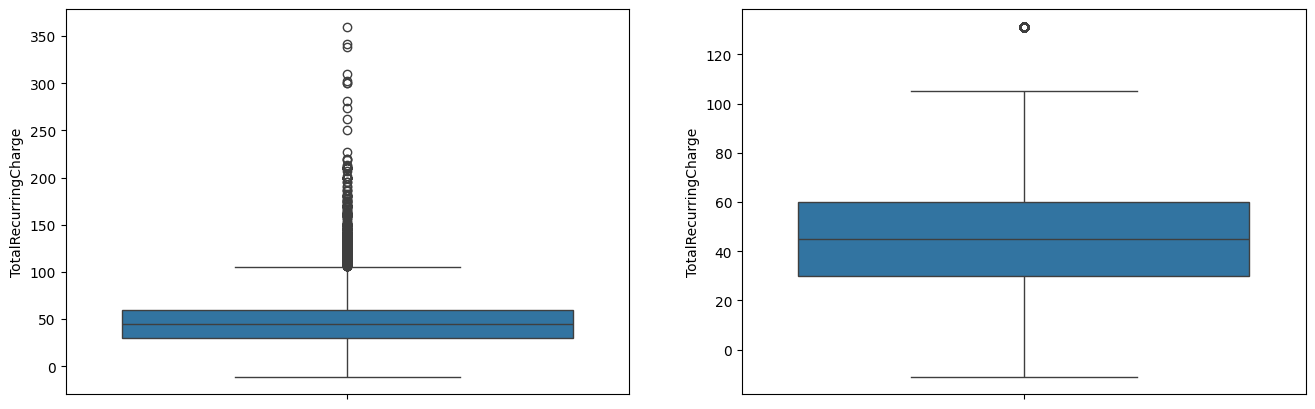

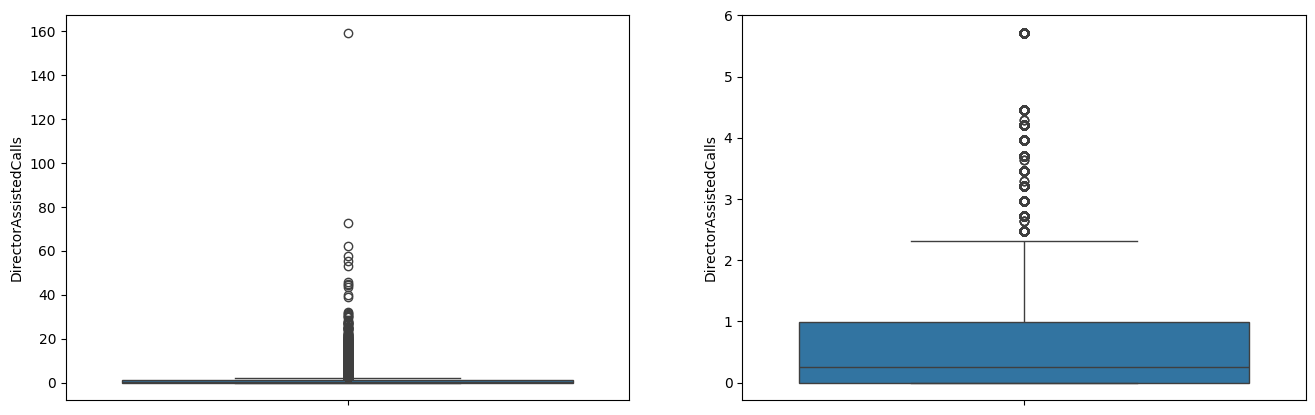

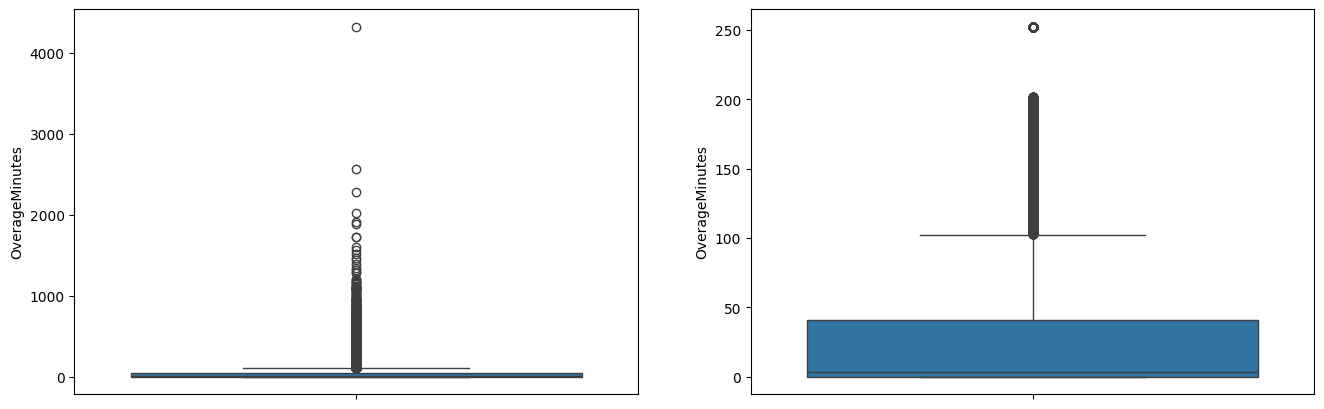

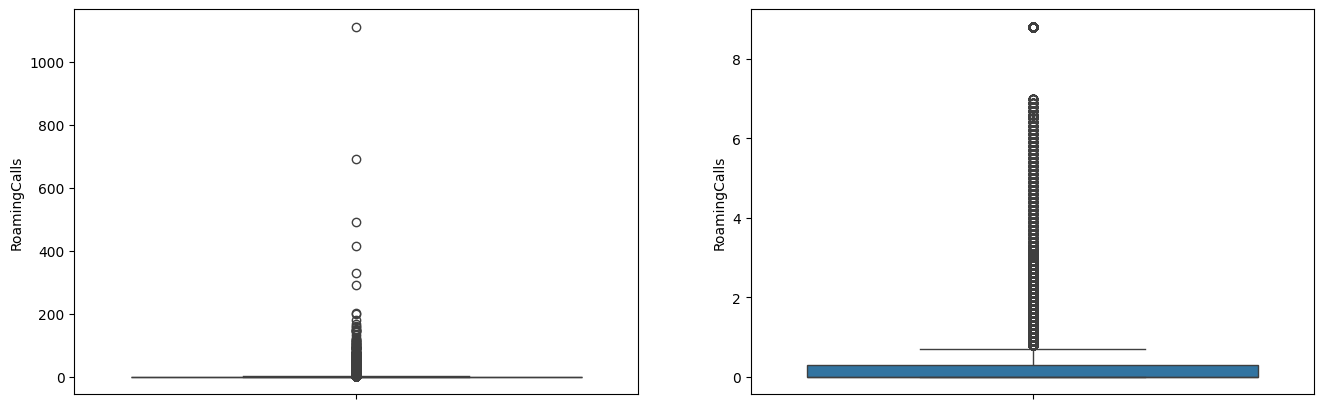

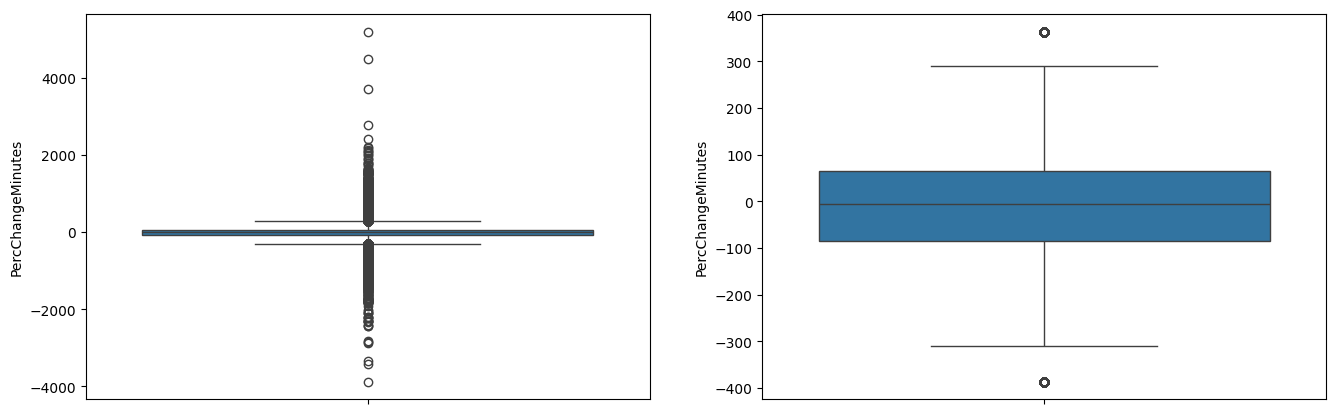

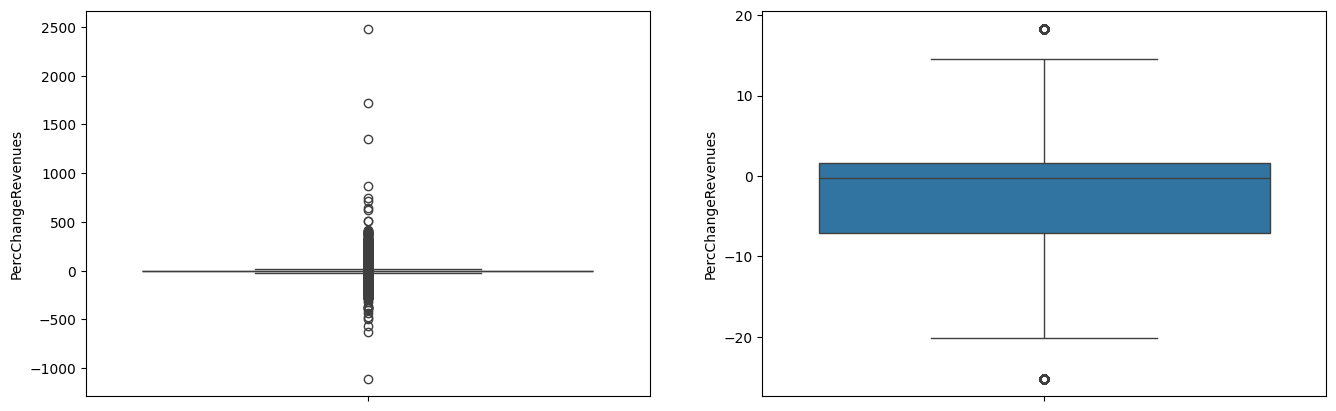

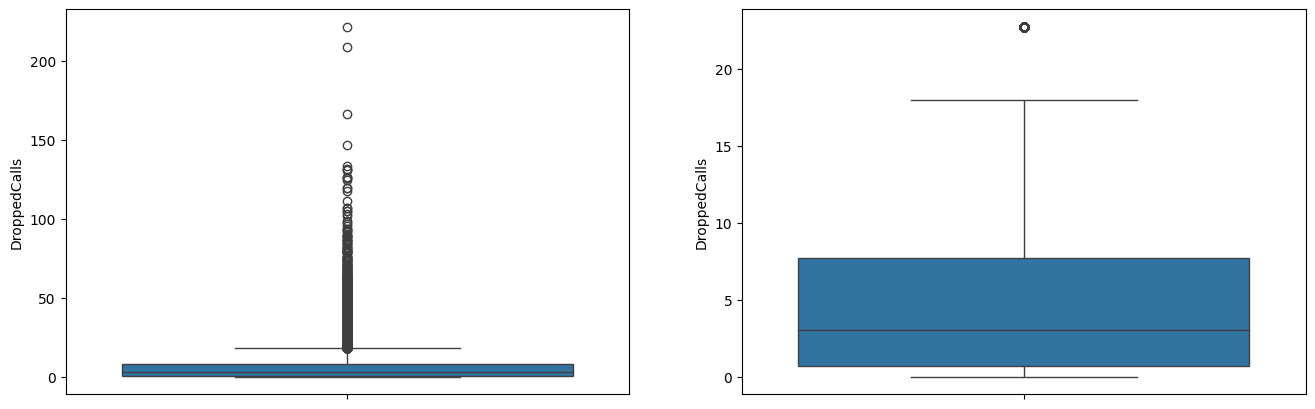

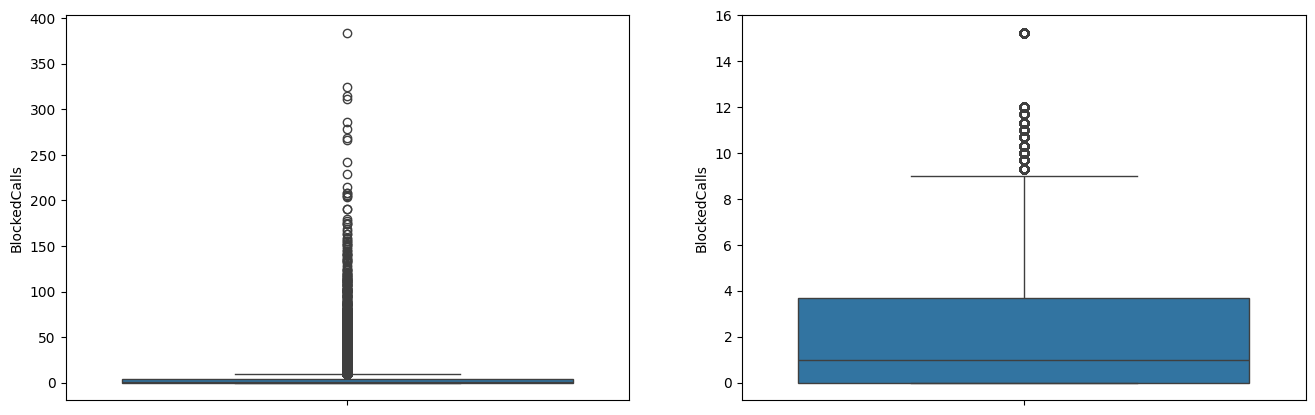

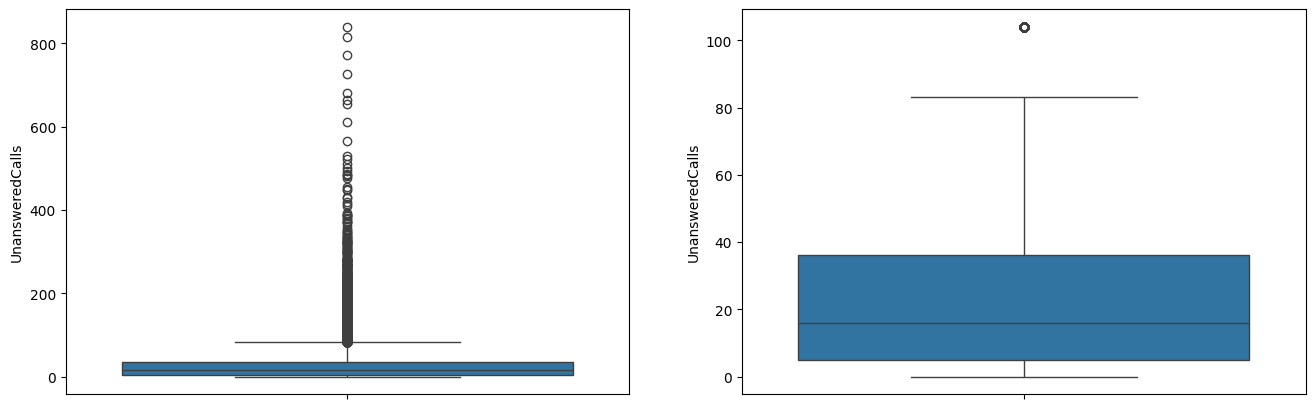

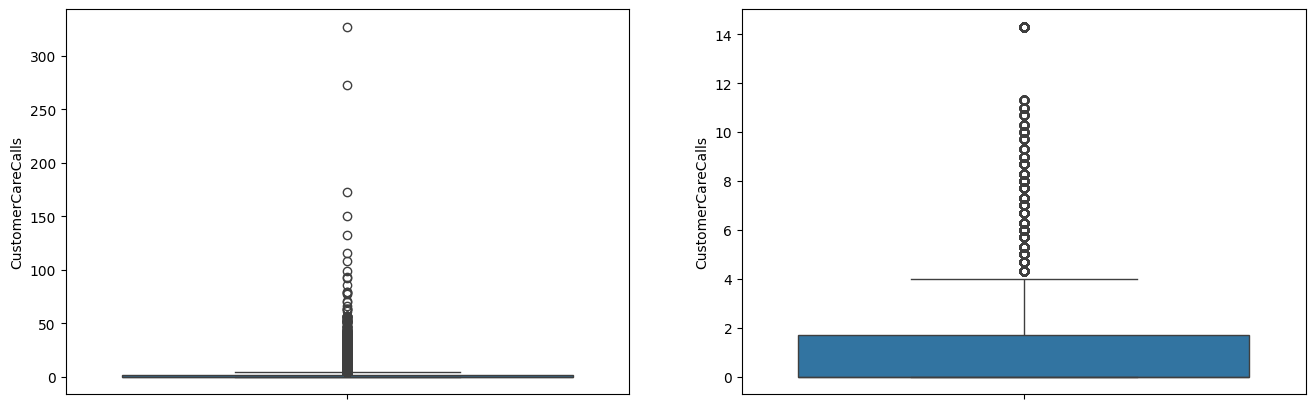

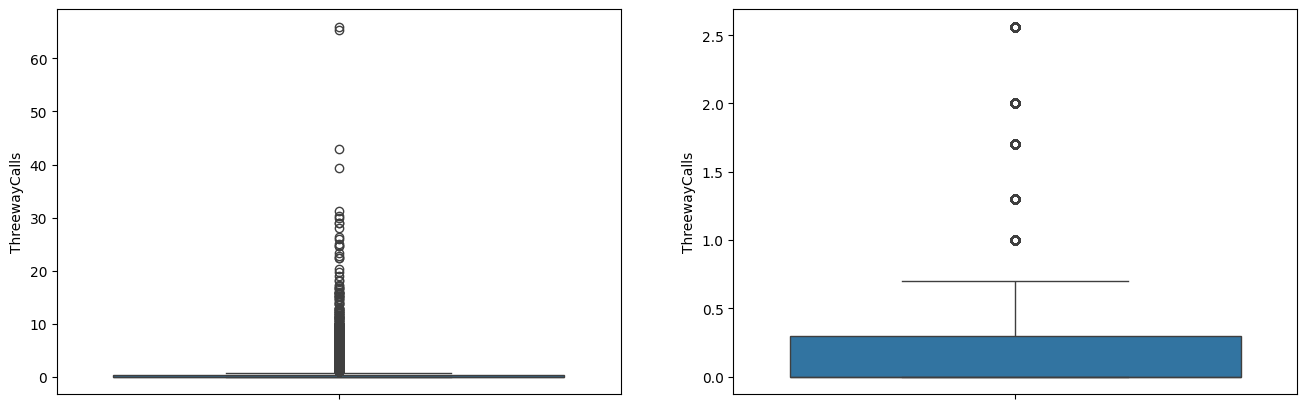

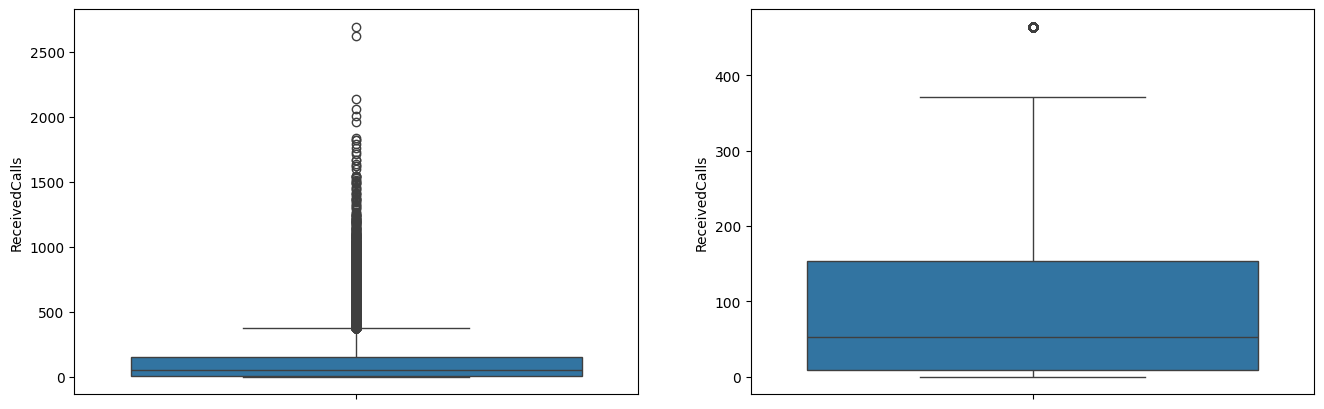

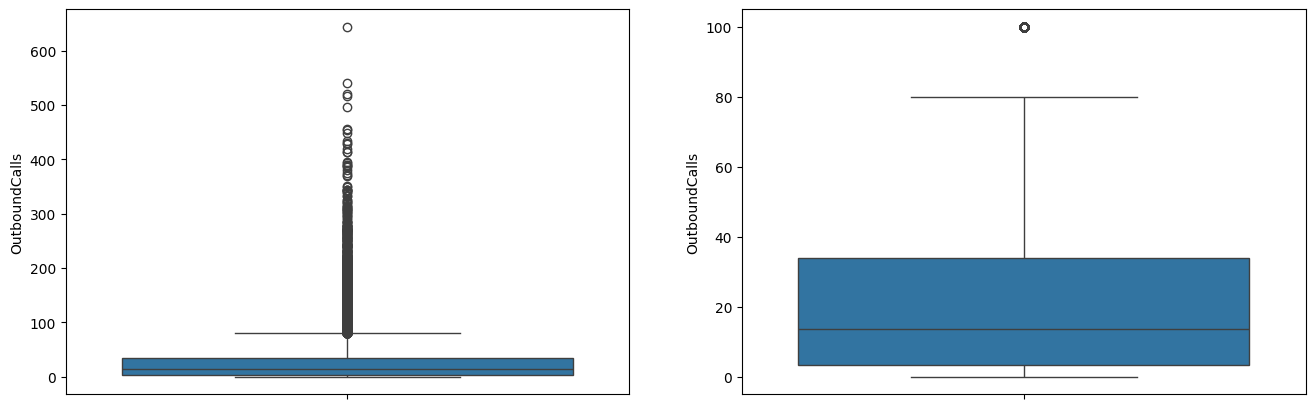

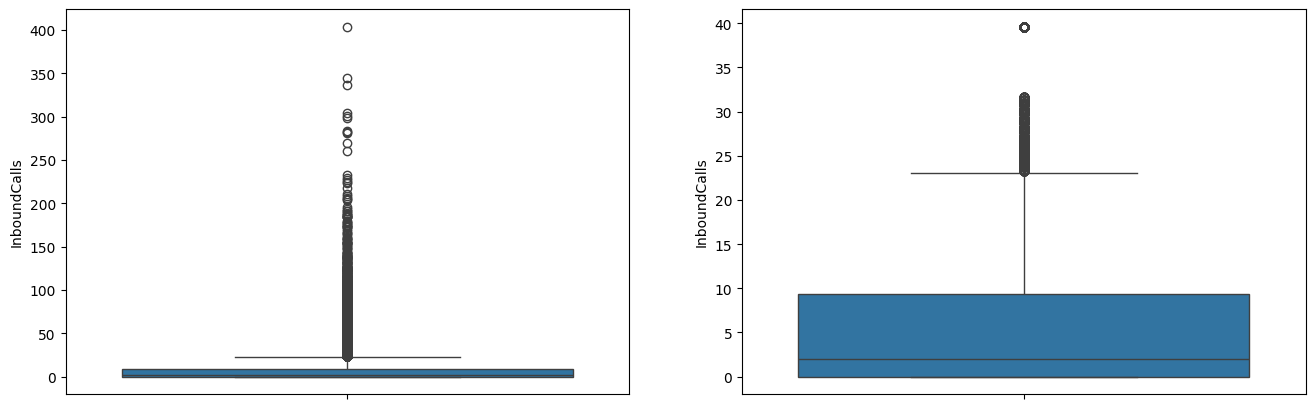

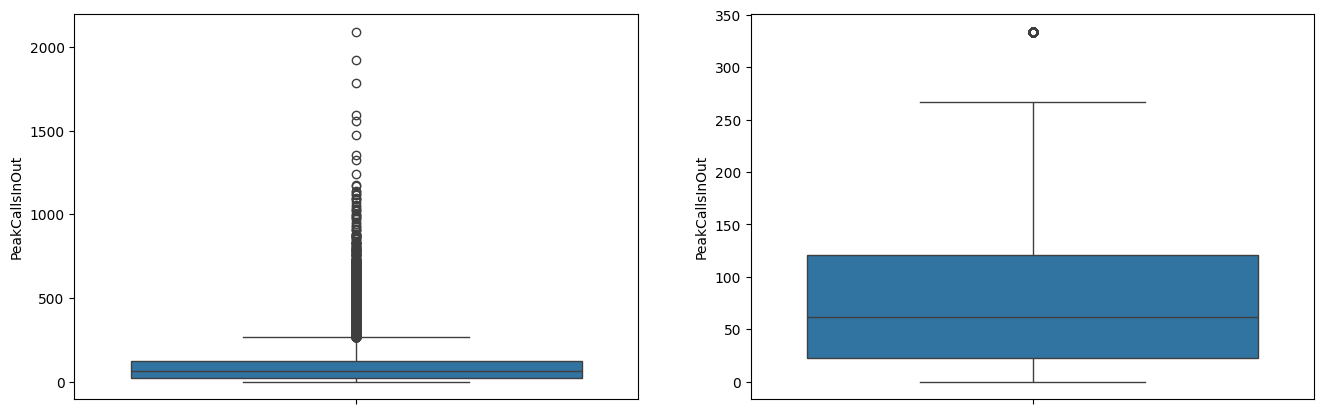

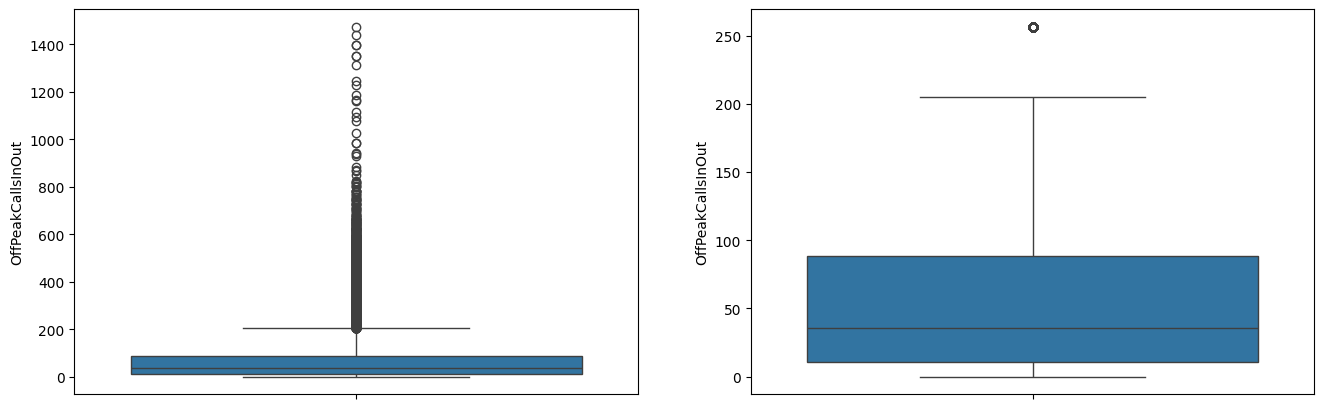

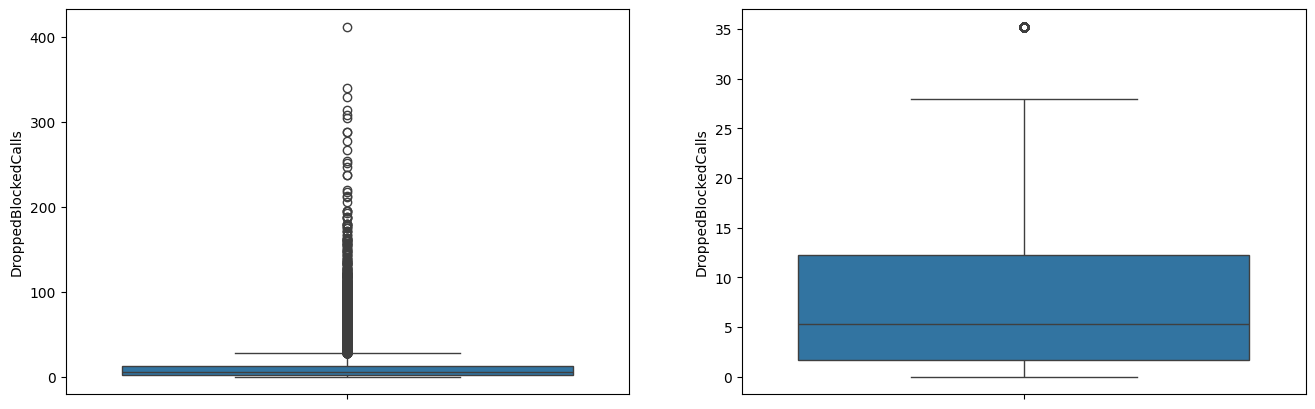

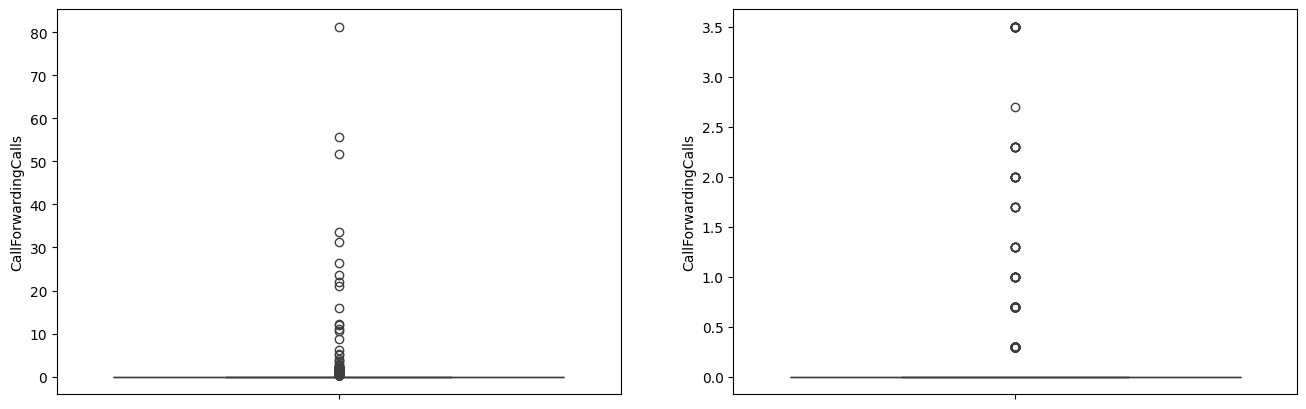

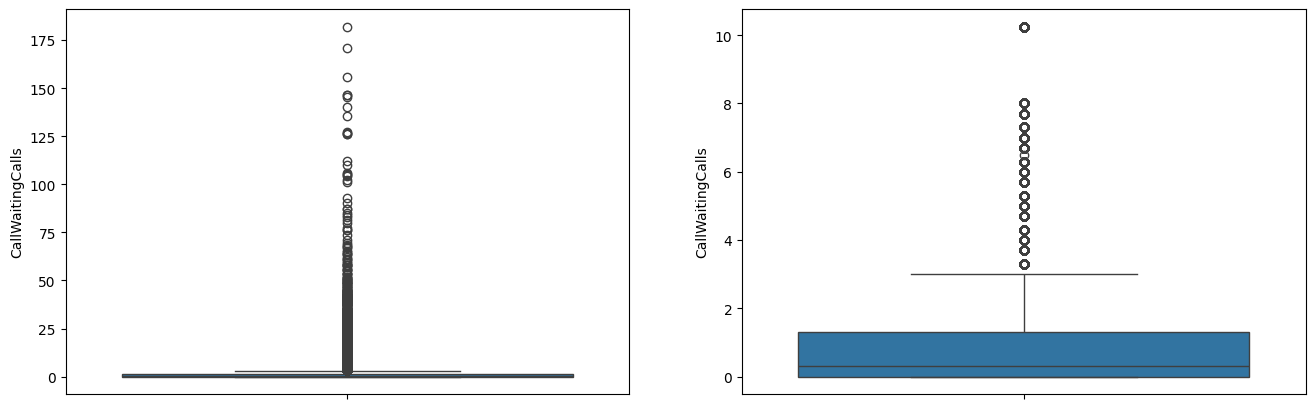

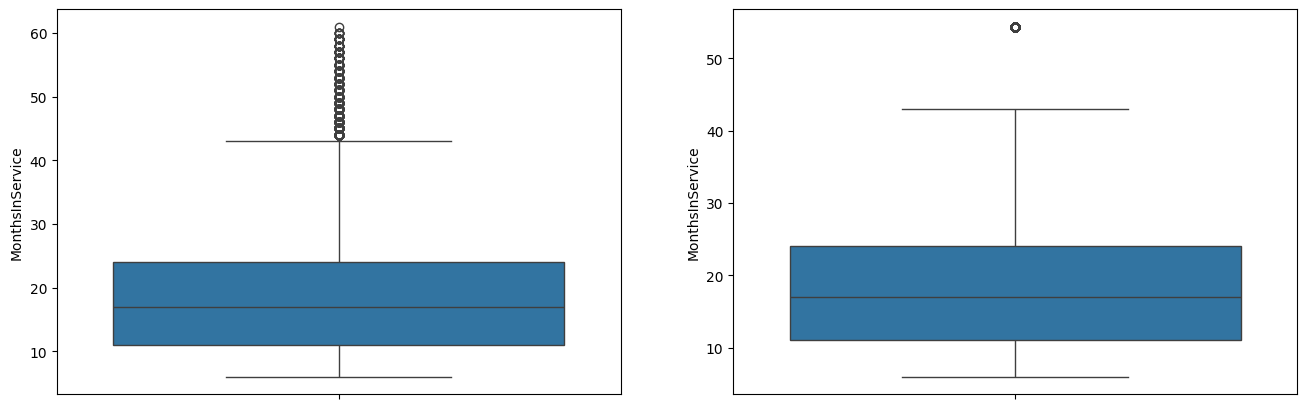

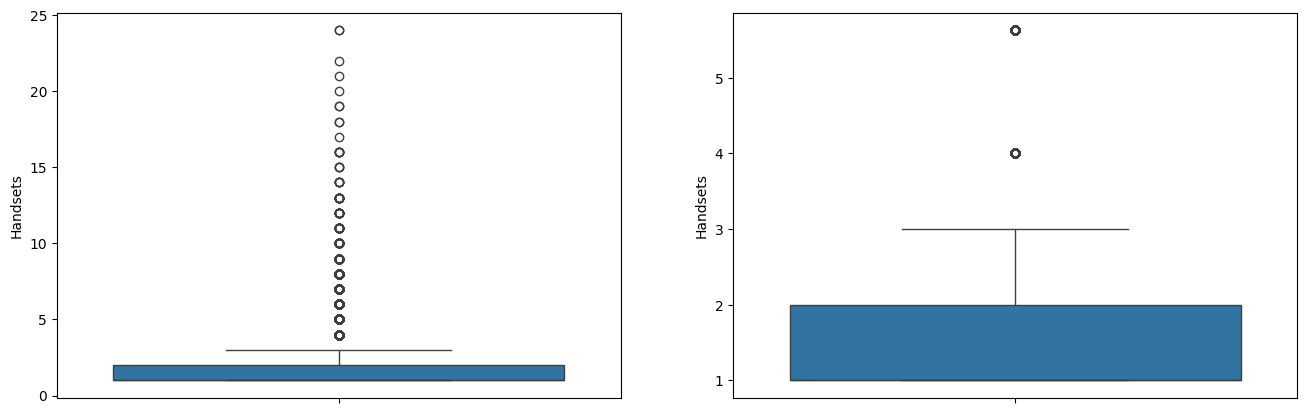

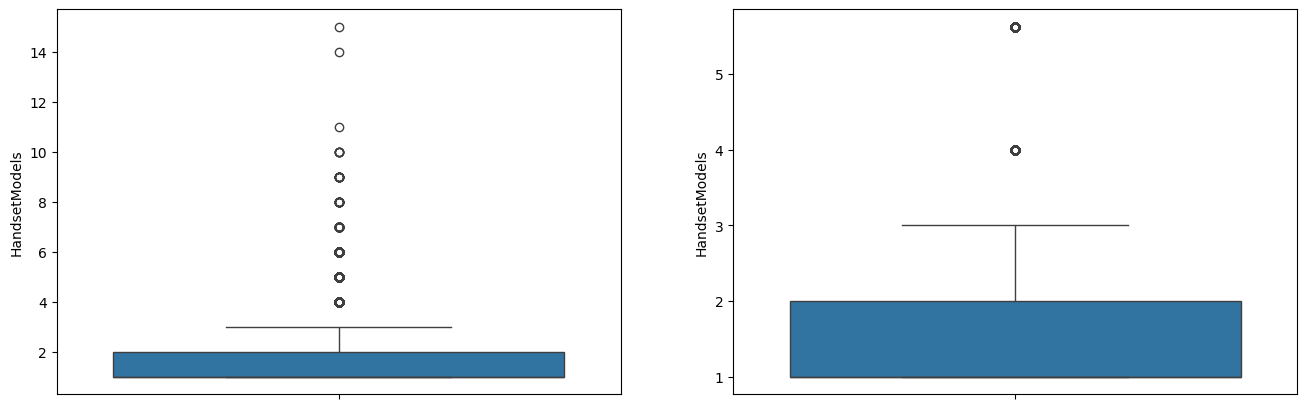

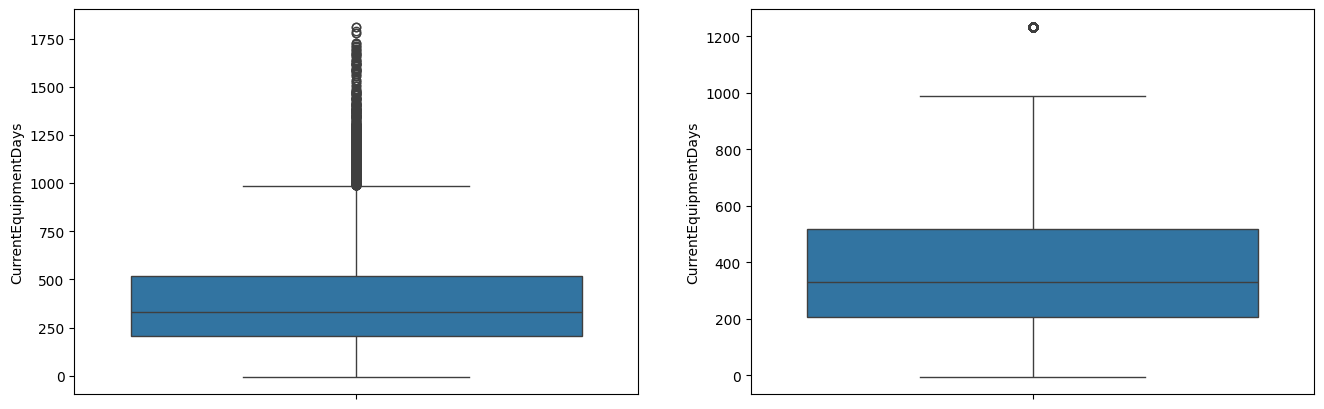

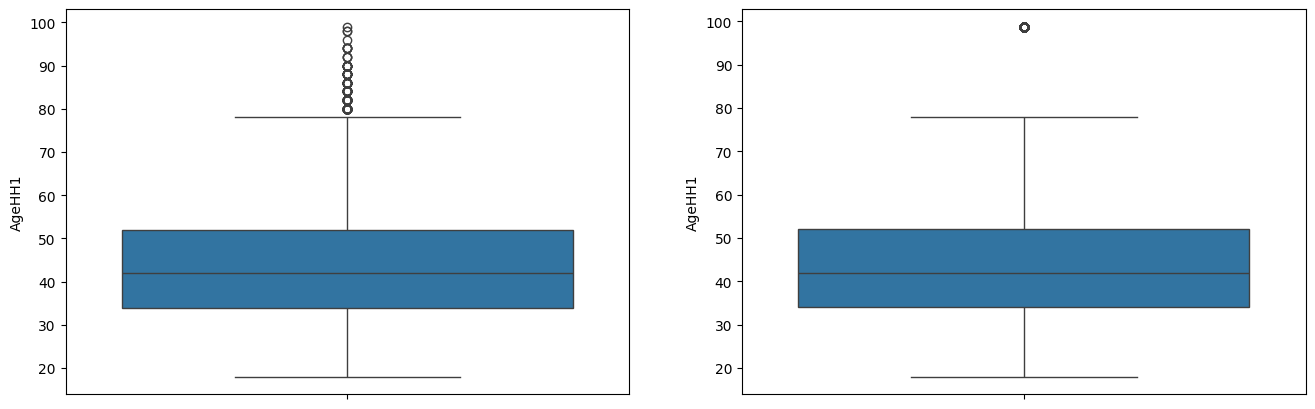

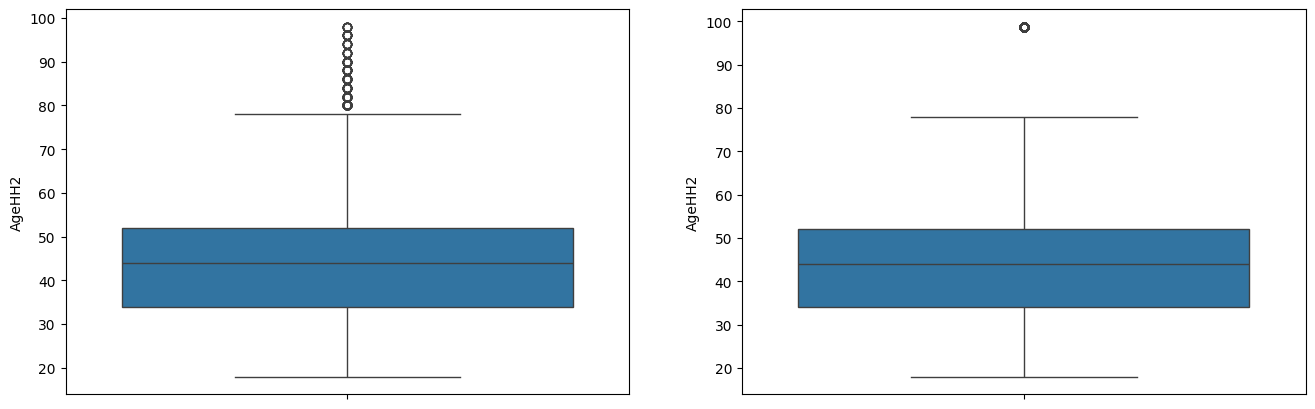

In [51]:
liste=list(iqr_df["#-of-Outliers"].index)
for i in liste:

    fig,ax=plt.subplots(1,2,figsize=(16,5))
    sns.boxplot(df_train[i],ax=ax[0])
    sns.boxplot(df_train_outlier_cleaned[i],ax=ax[1])

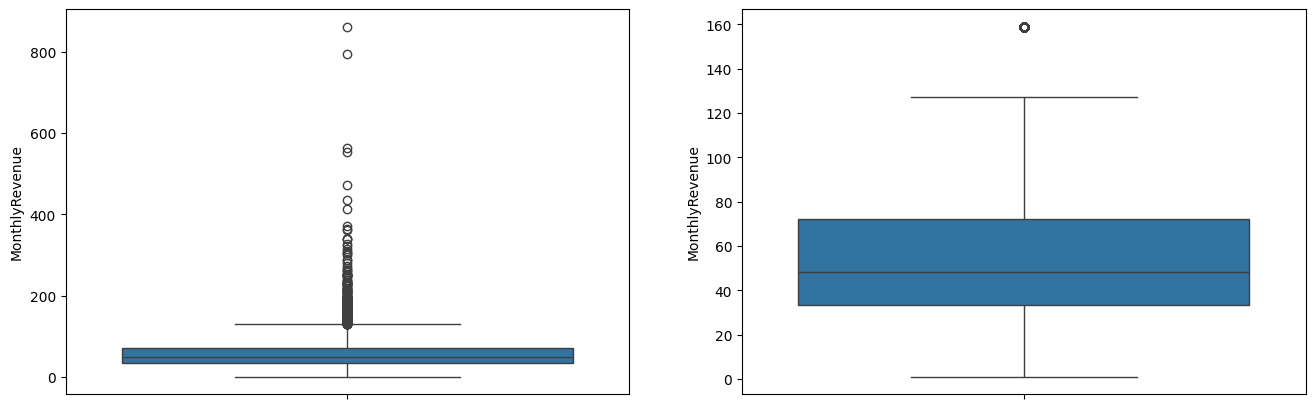

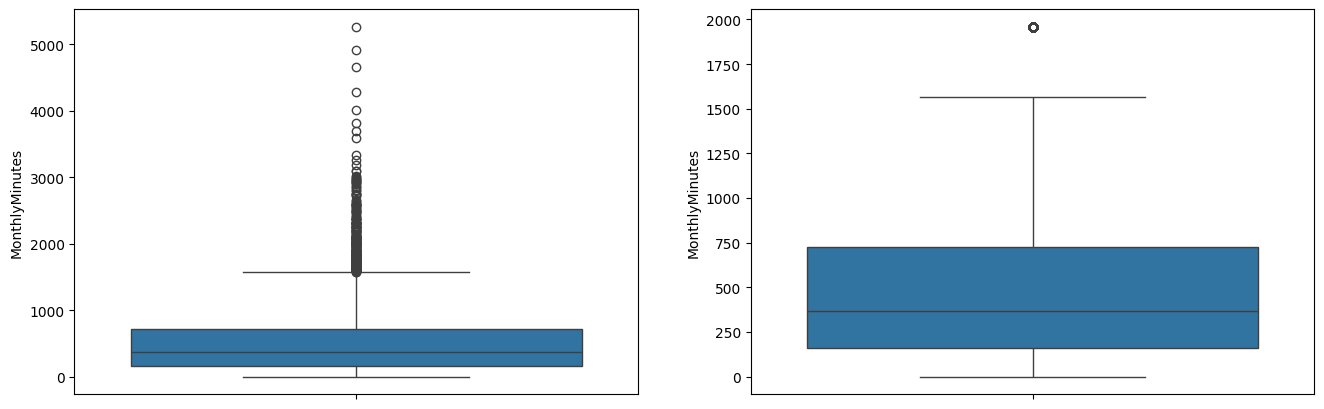

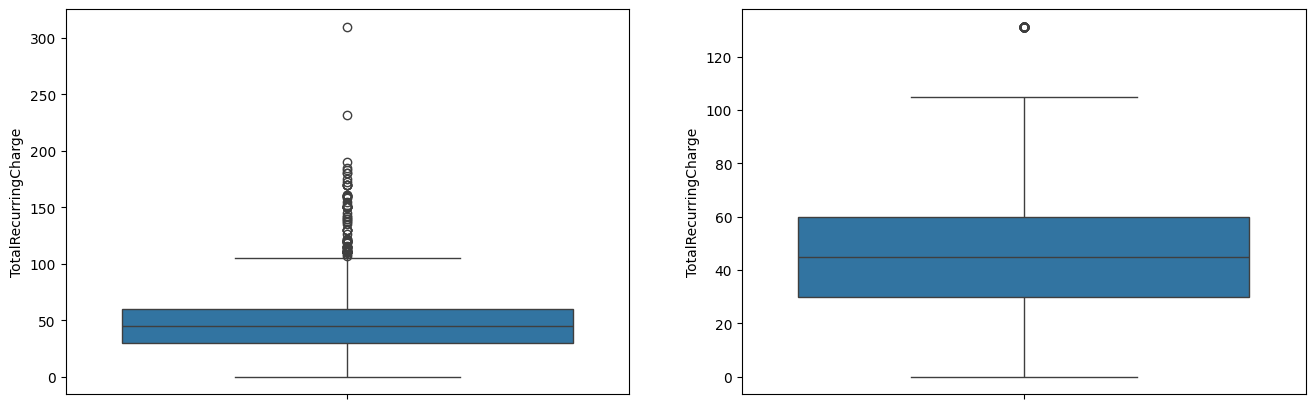

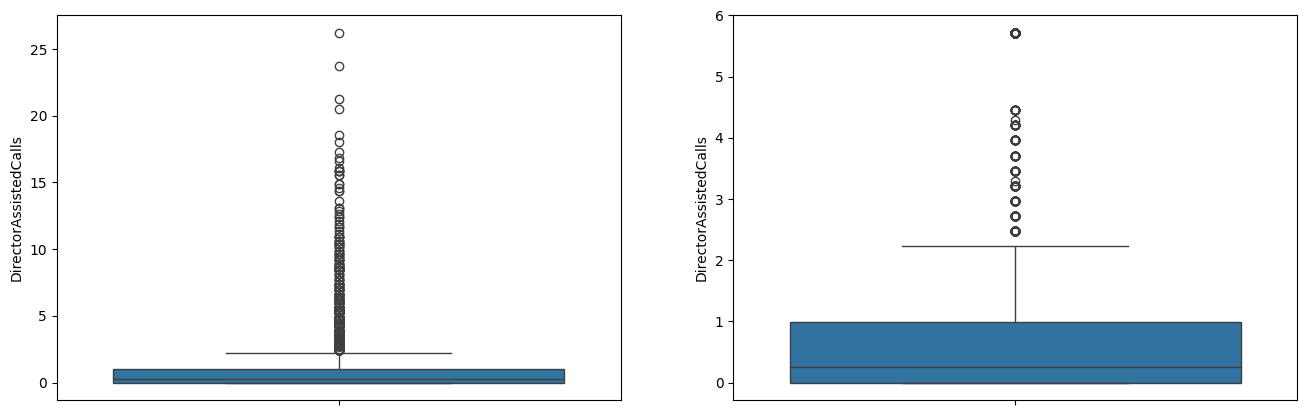

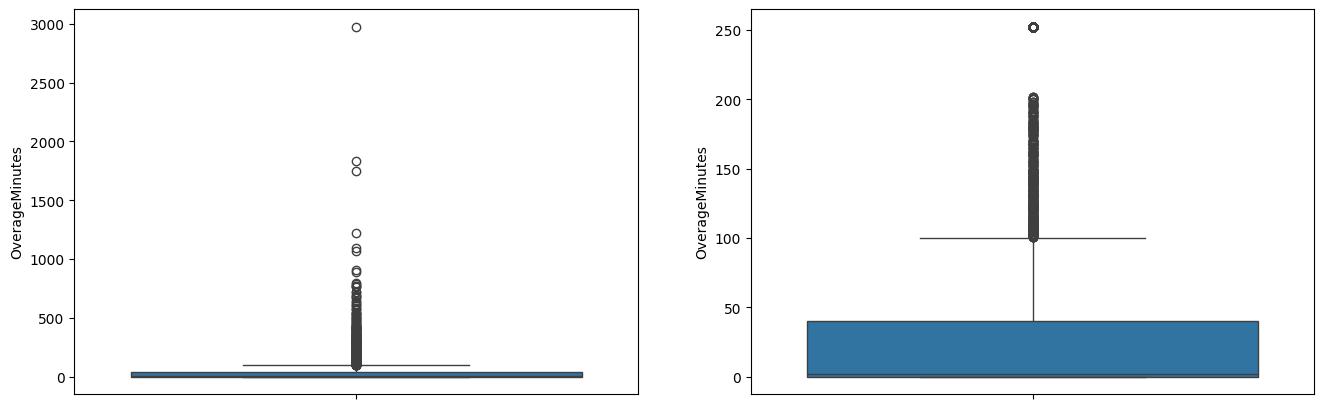

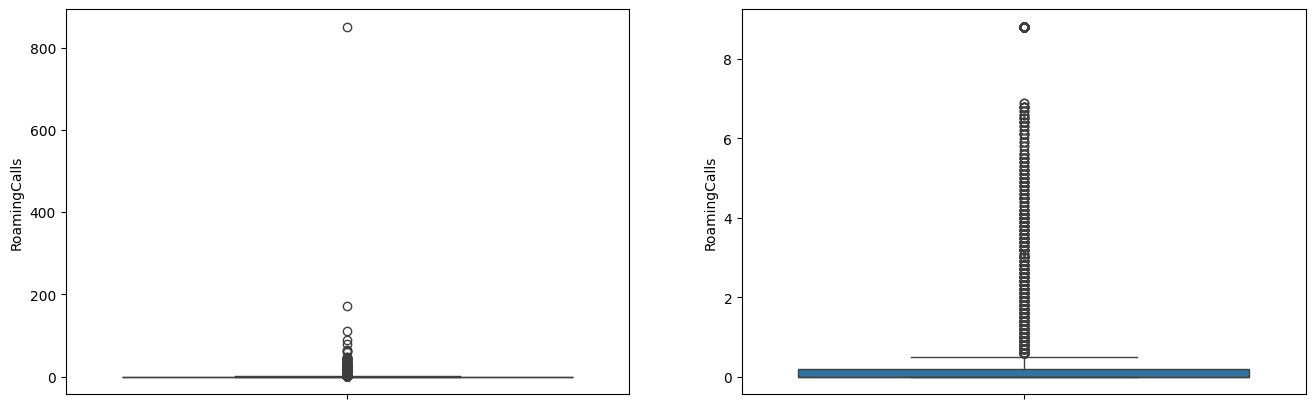

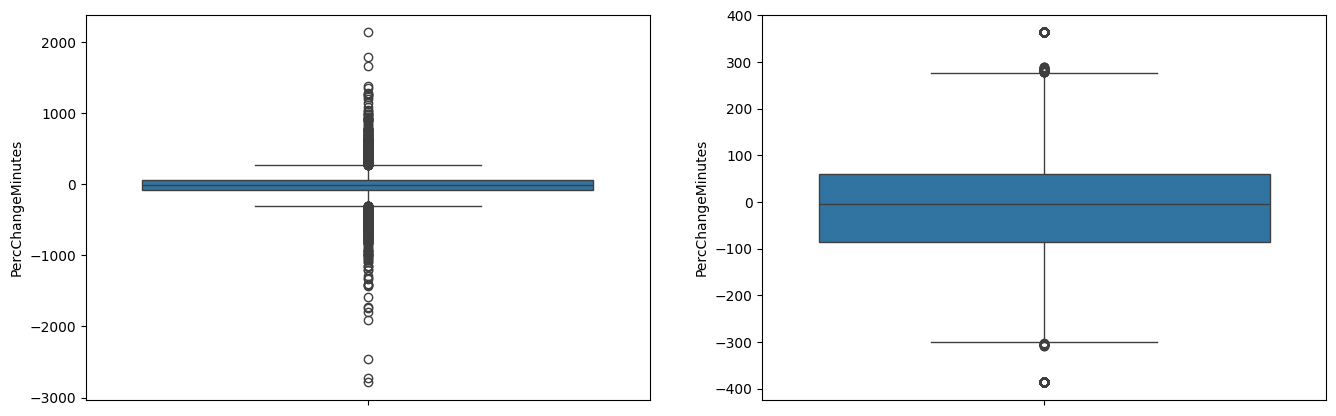

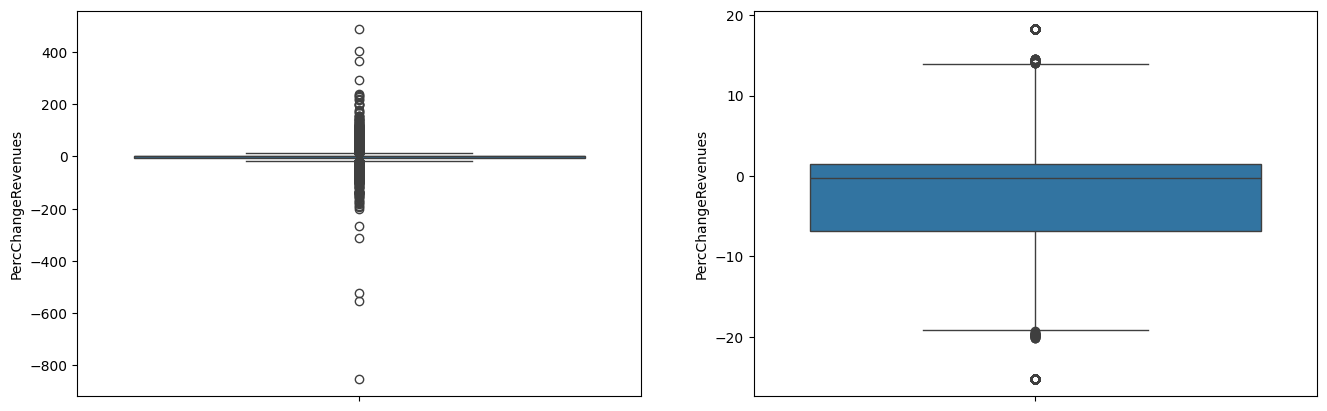

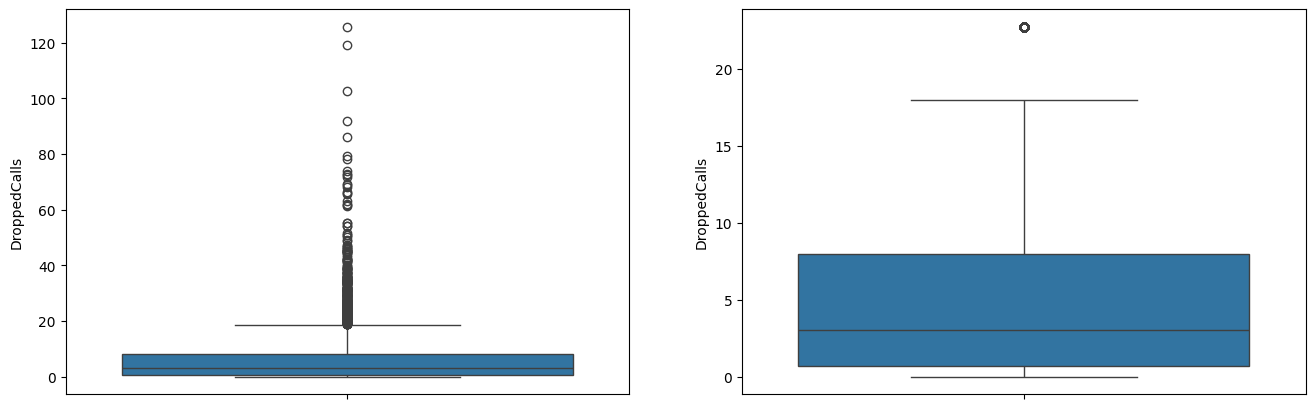

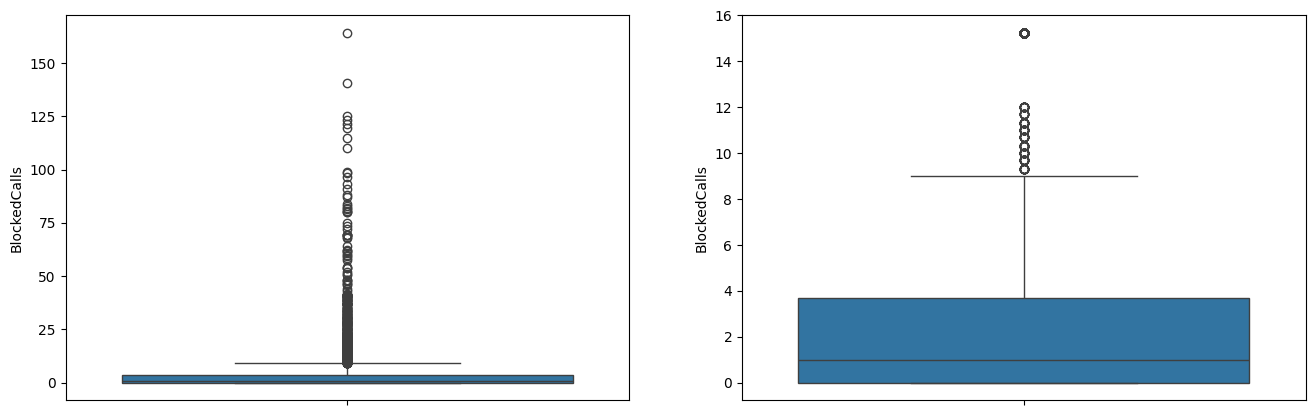

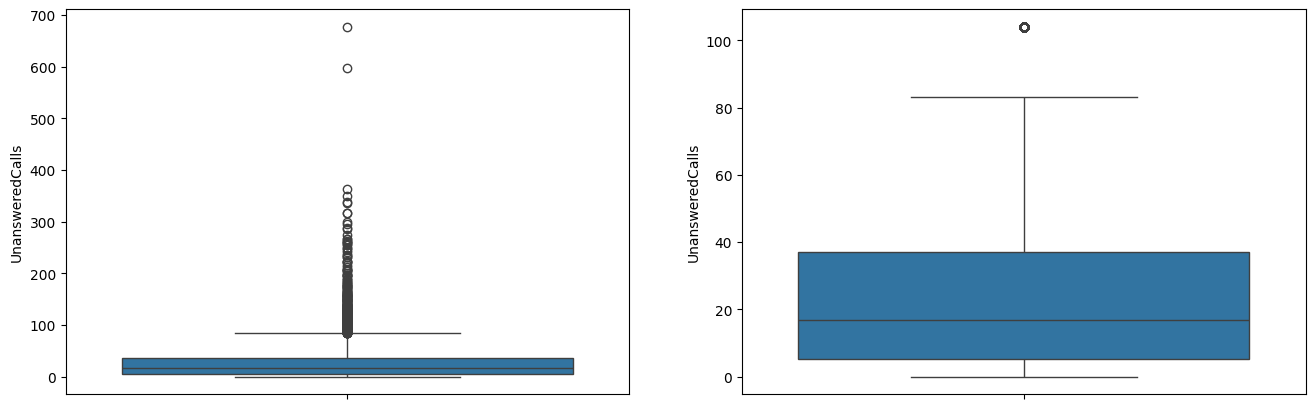

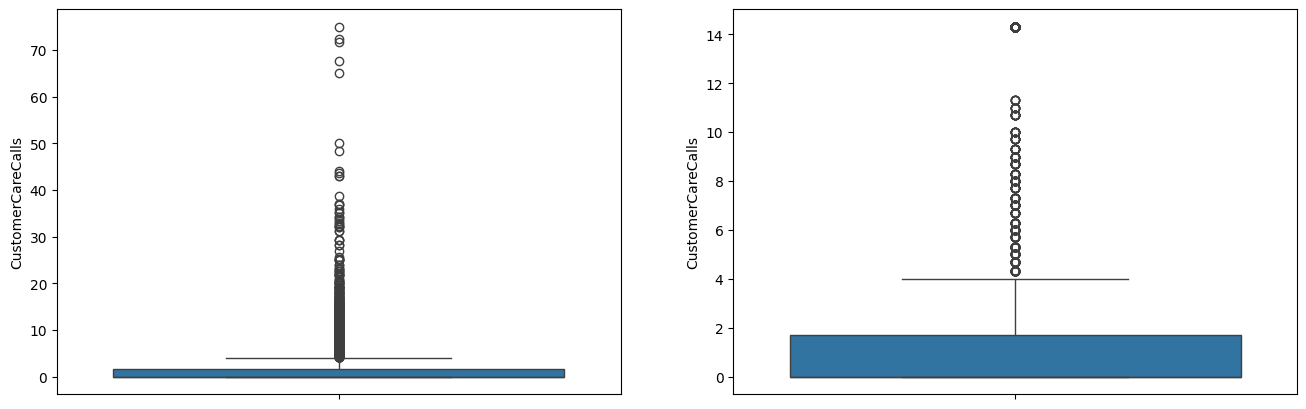

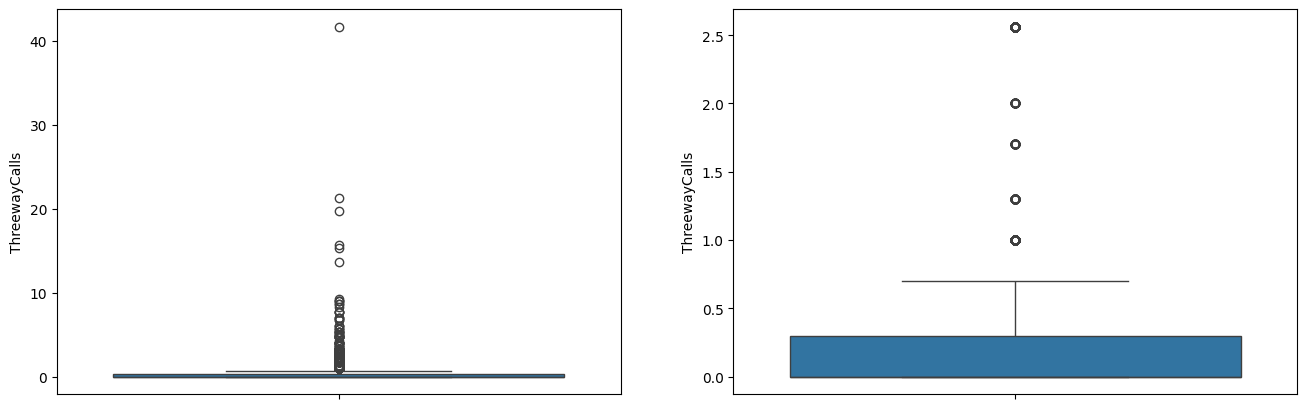

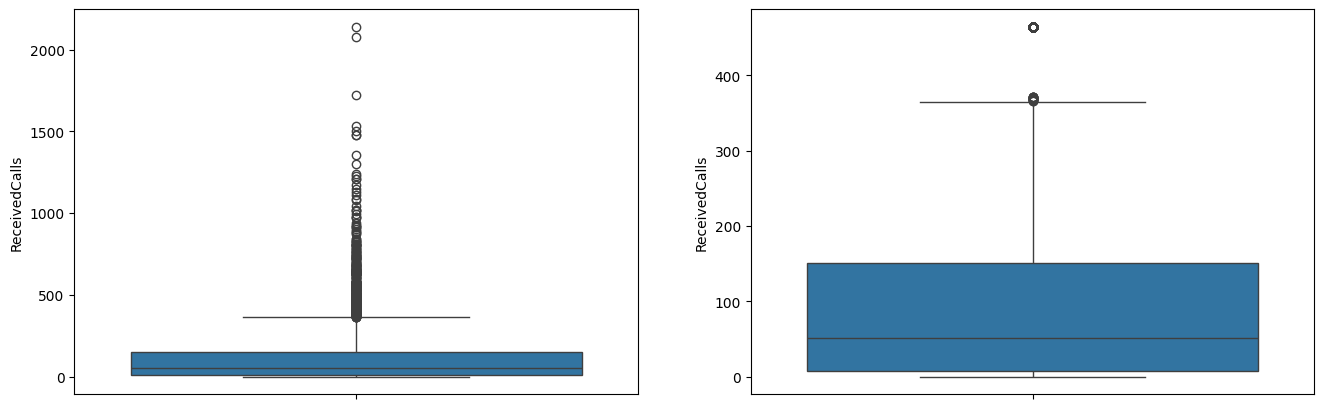

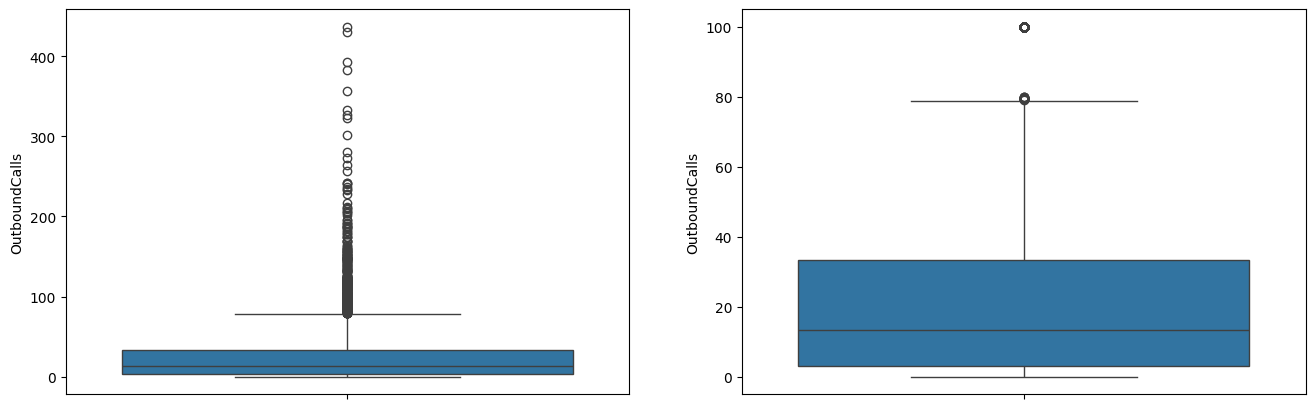

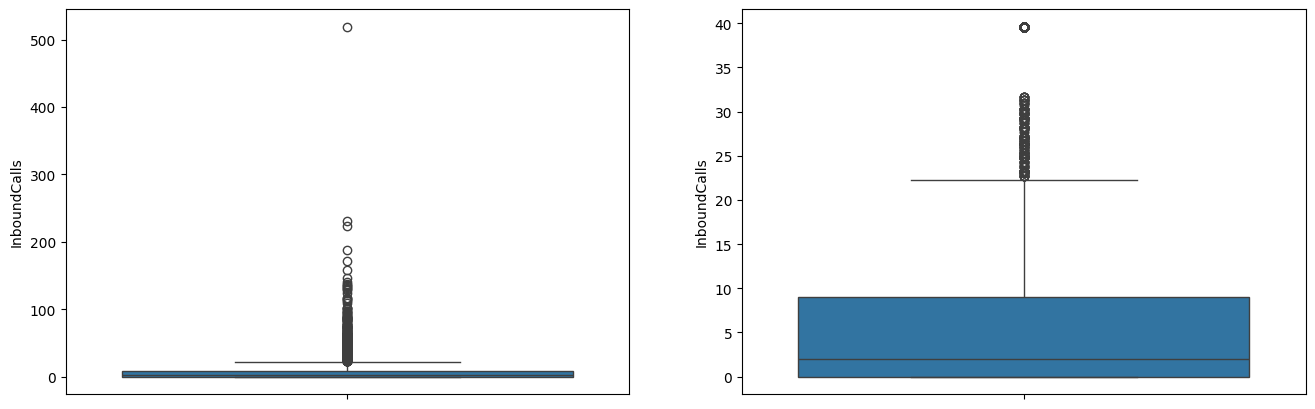

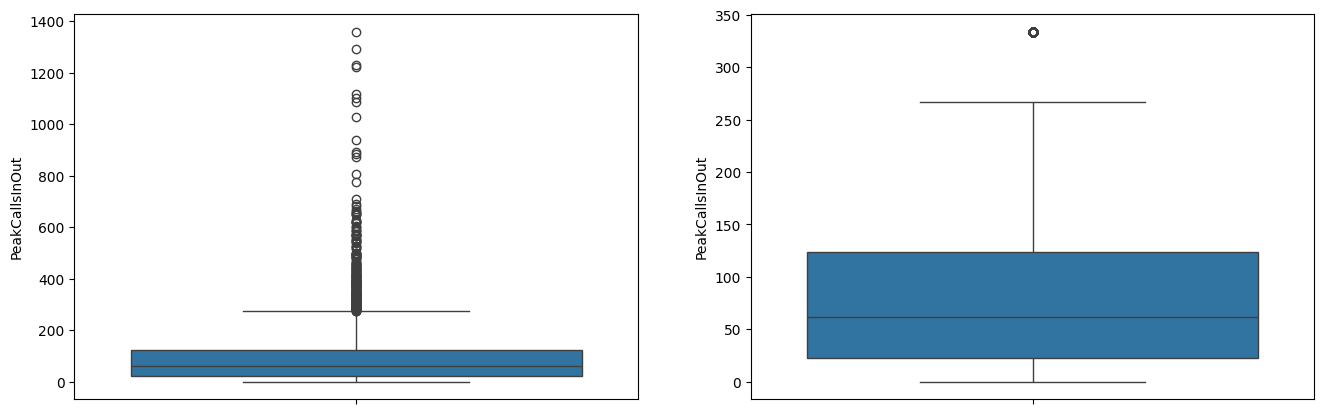

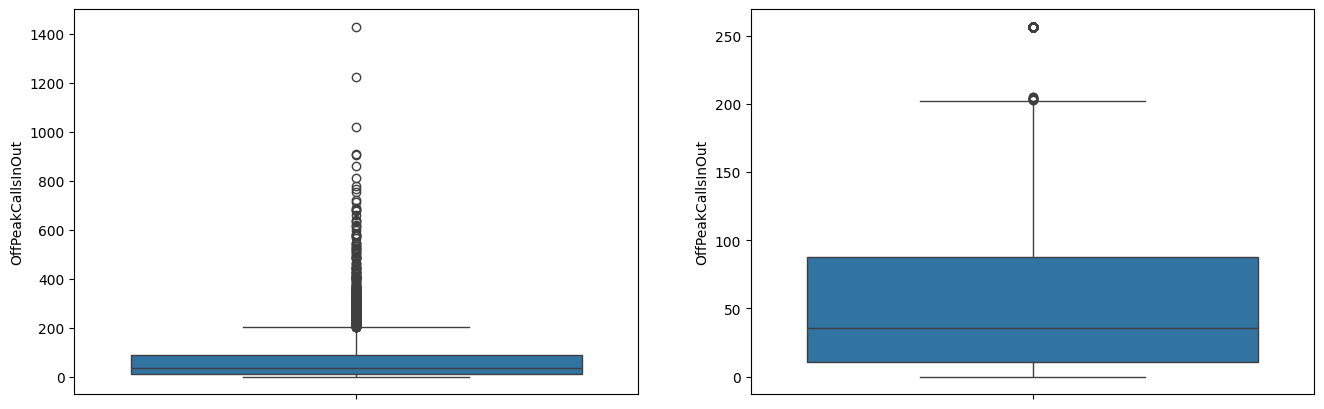

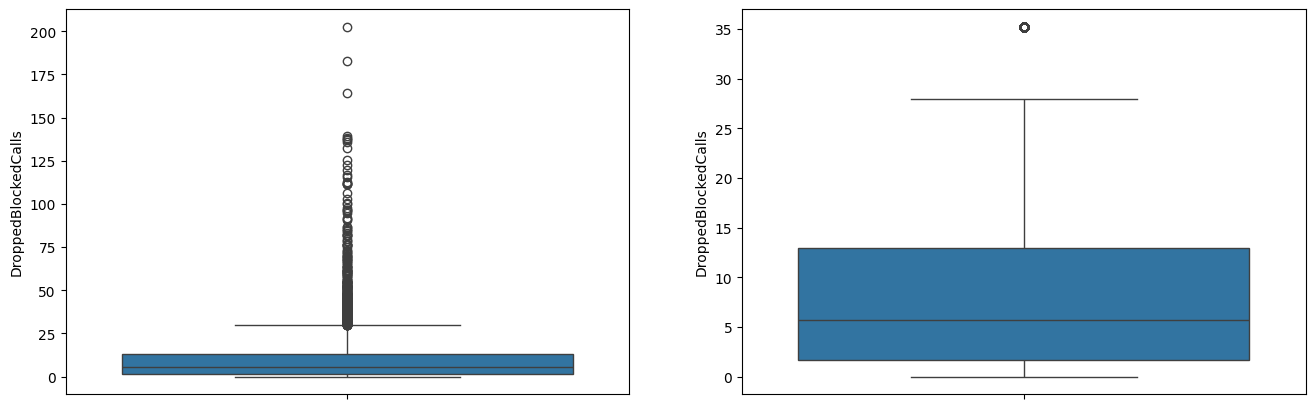

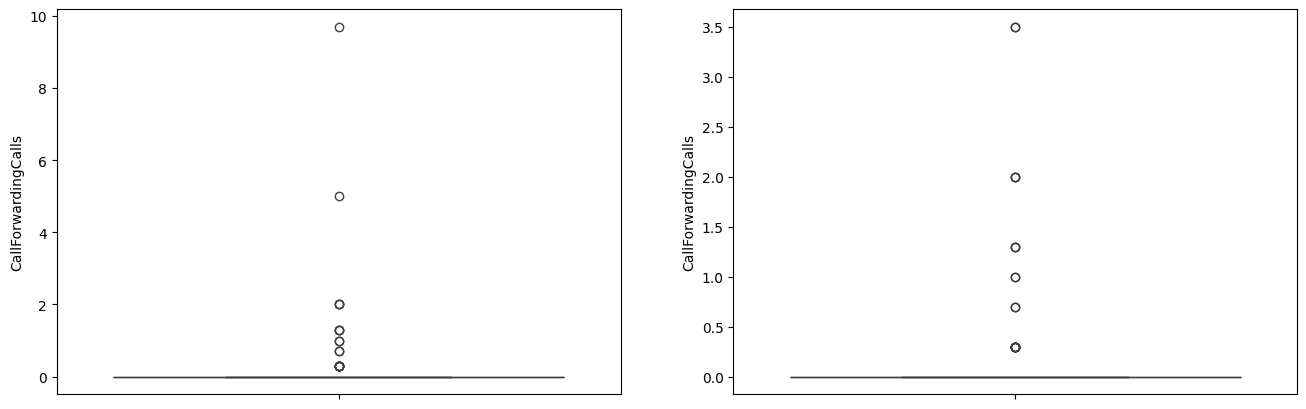

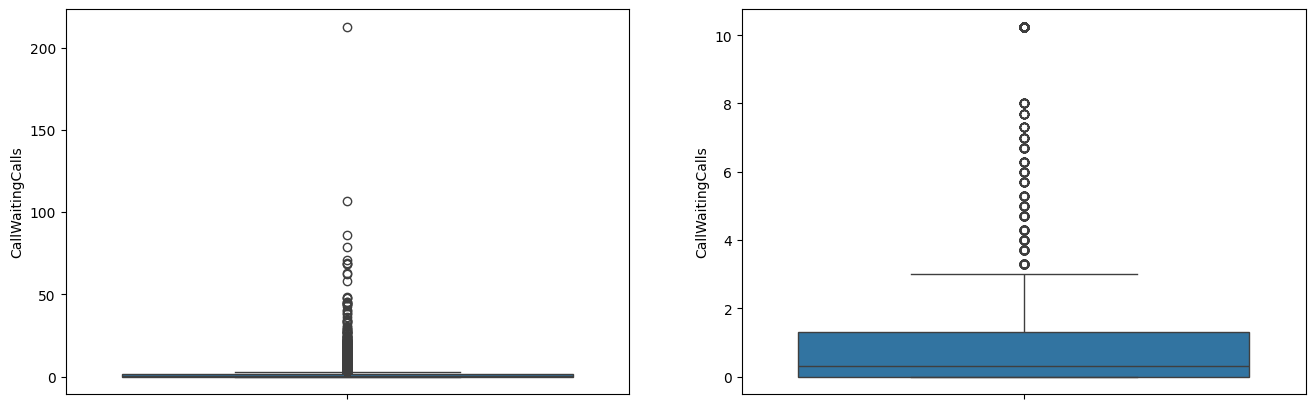

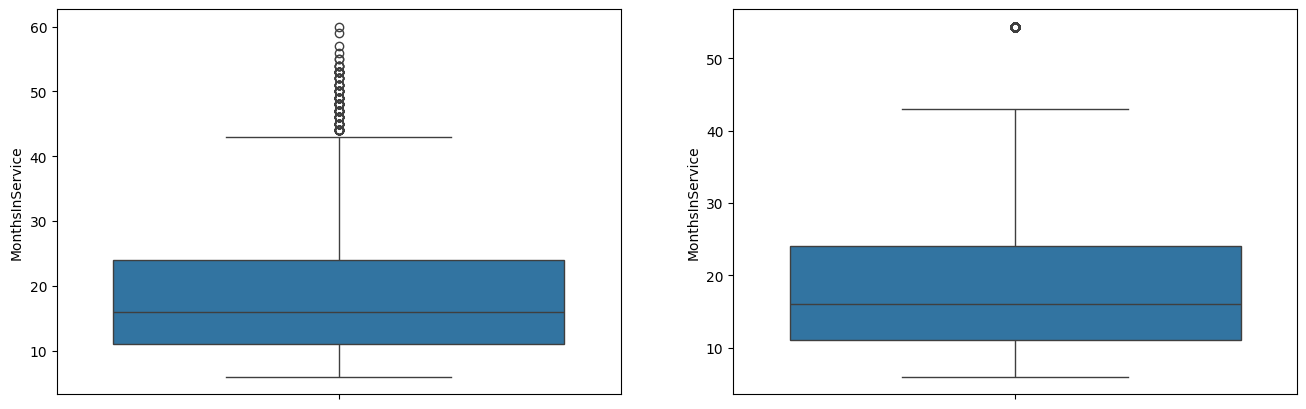

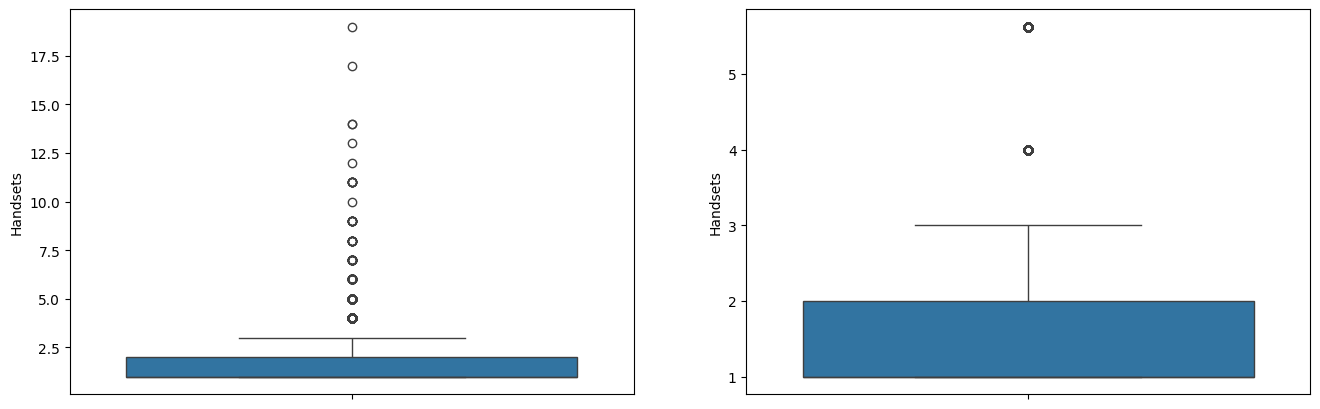

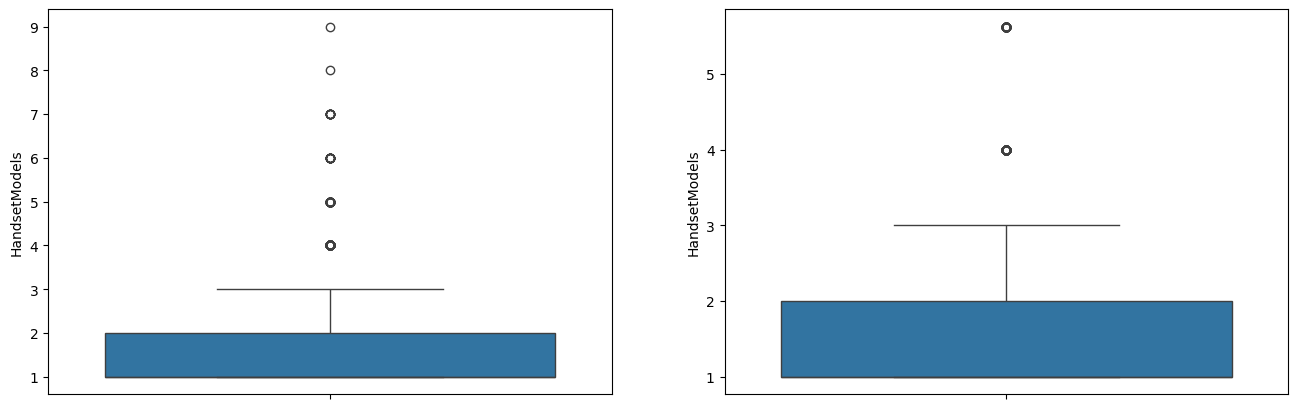

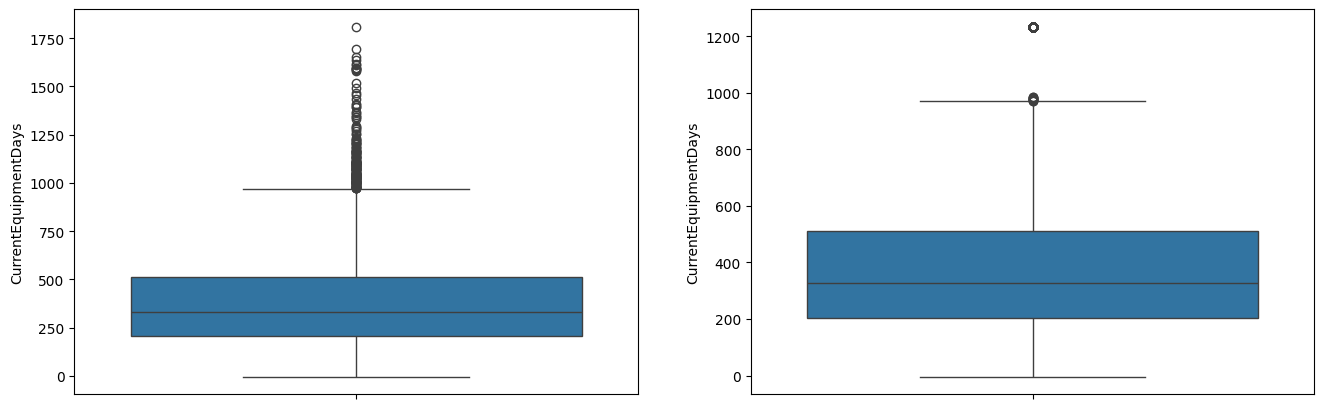

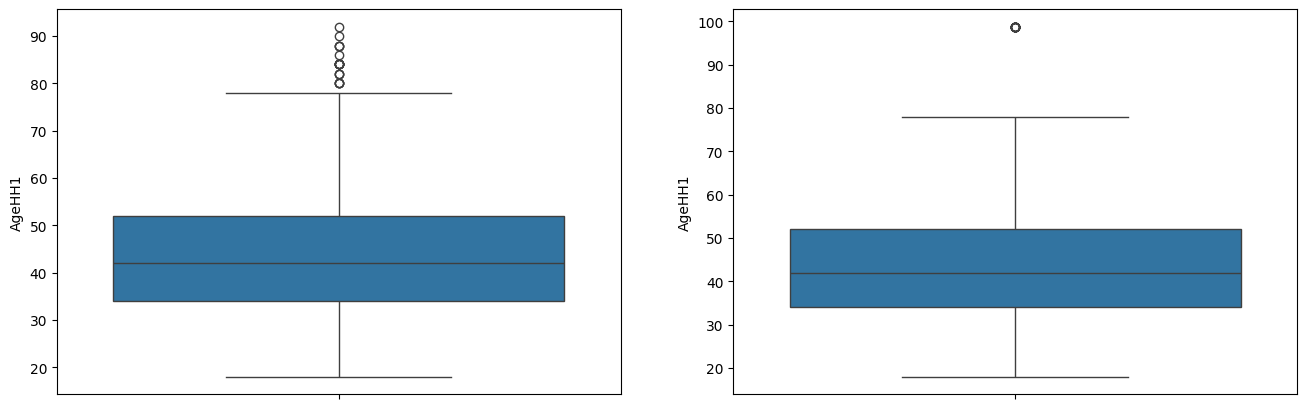

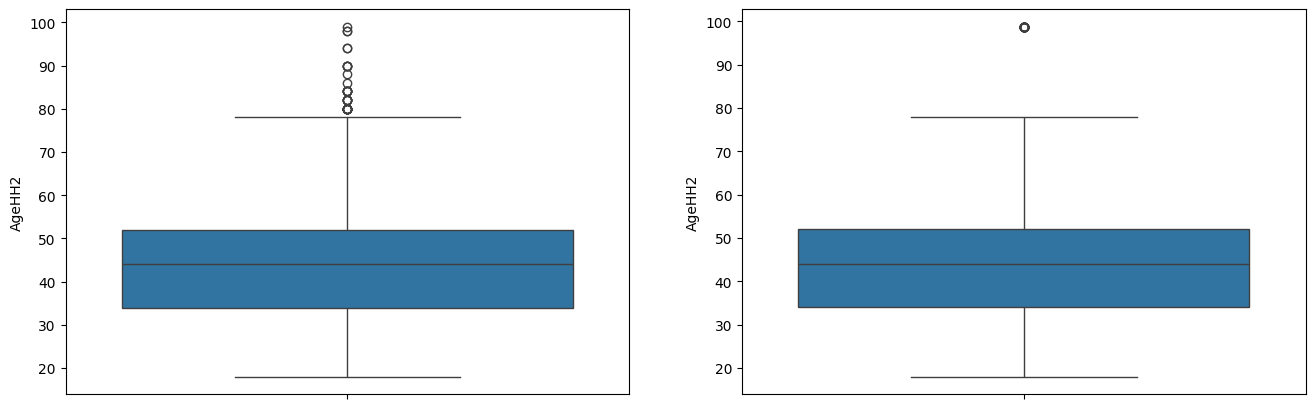

In [52]:
liste=list(number_of_outlier_test["#-of-Outliers"].index)
for i in liste:

    fig,ax=plt.subplots(1,2,figsize=(16,5))
    sns.boxplot(df_val[i],ax=ax[0])
    sns.boxplot(df_val_outlier_cleaned[i],ax=ax[1])

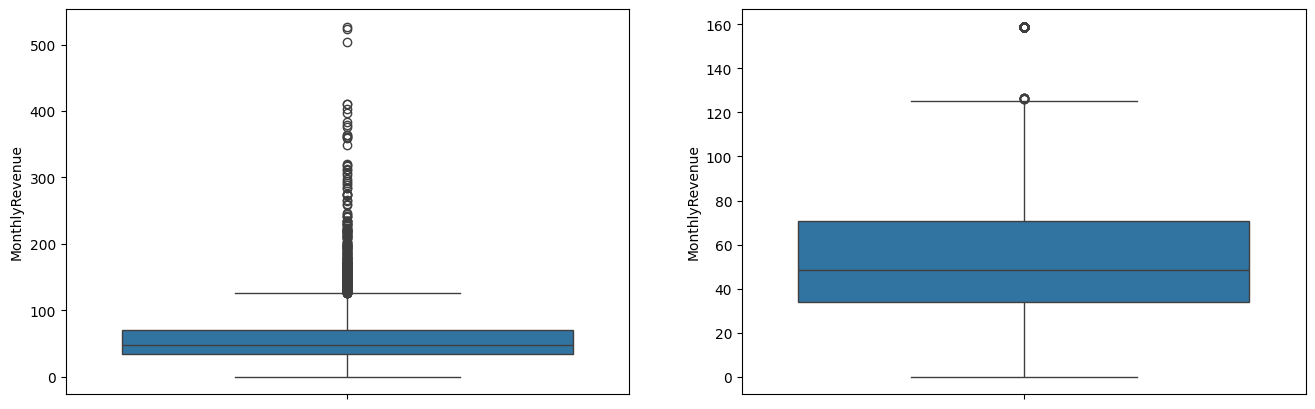

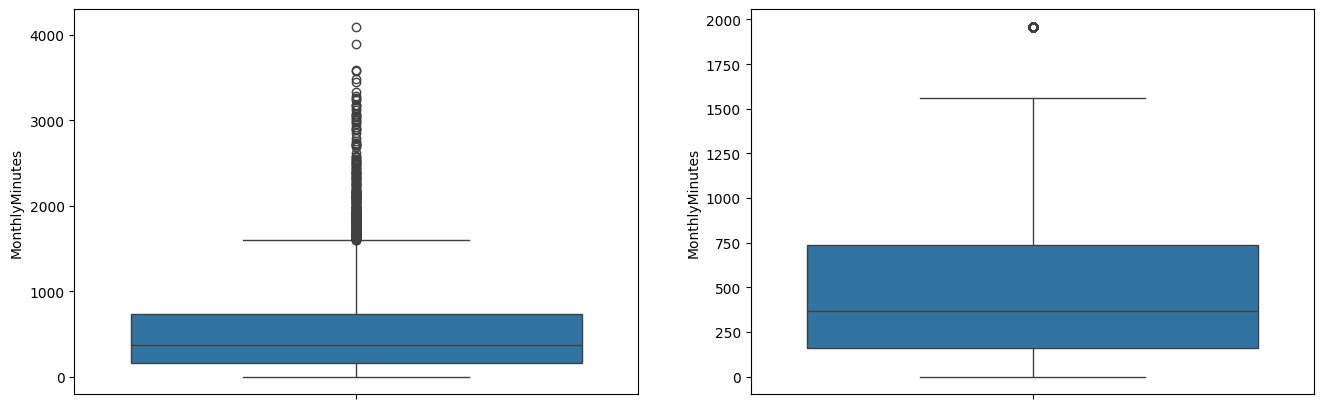

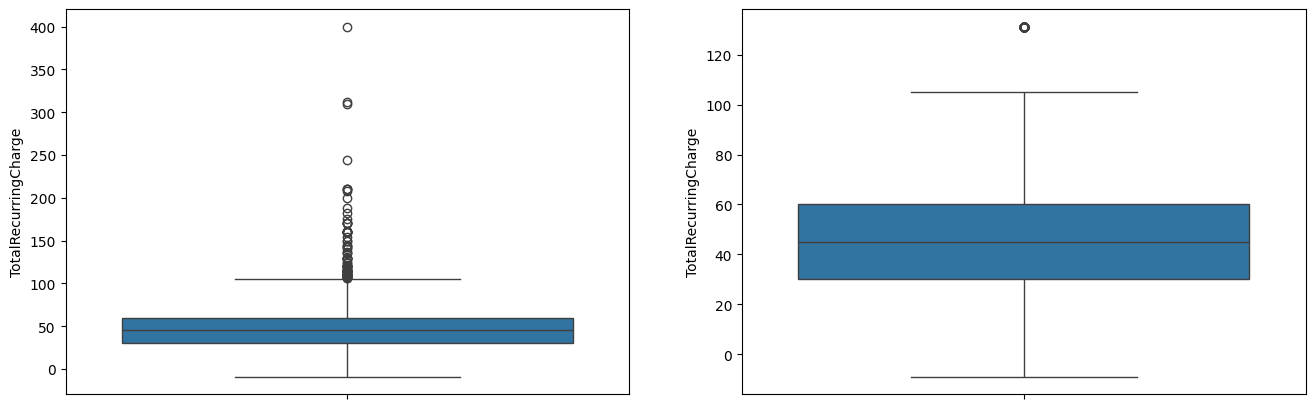

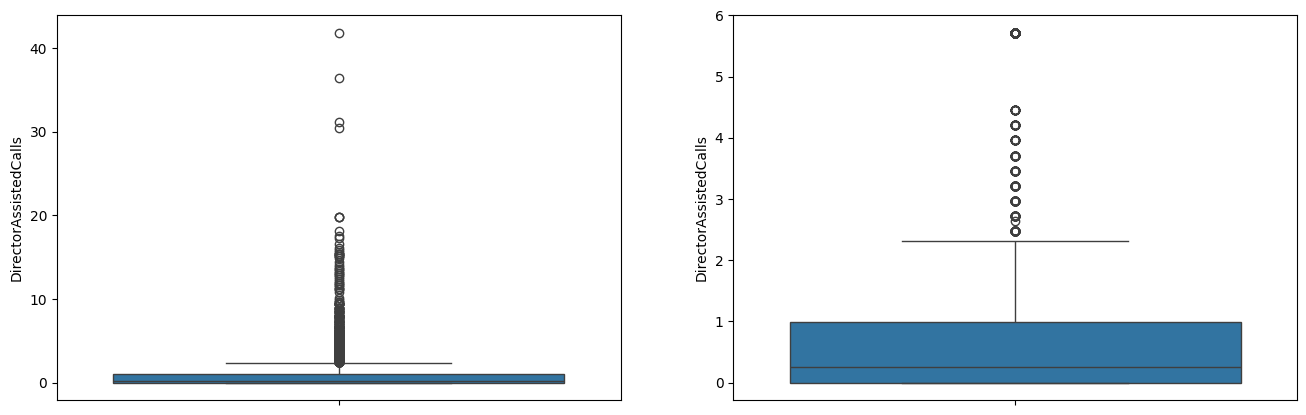

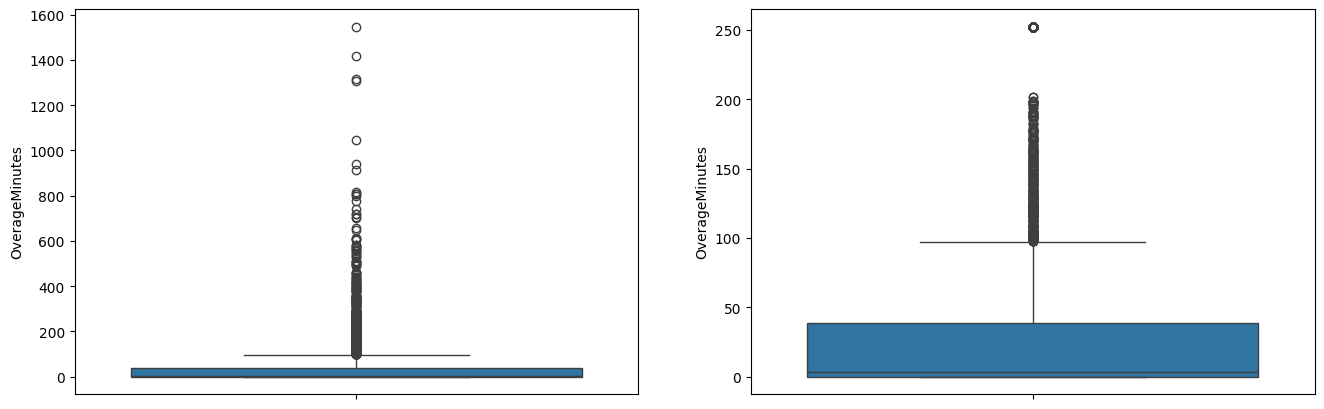

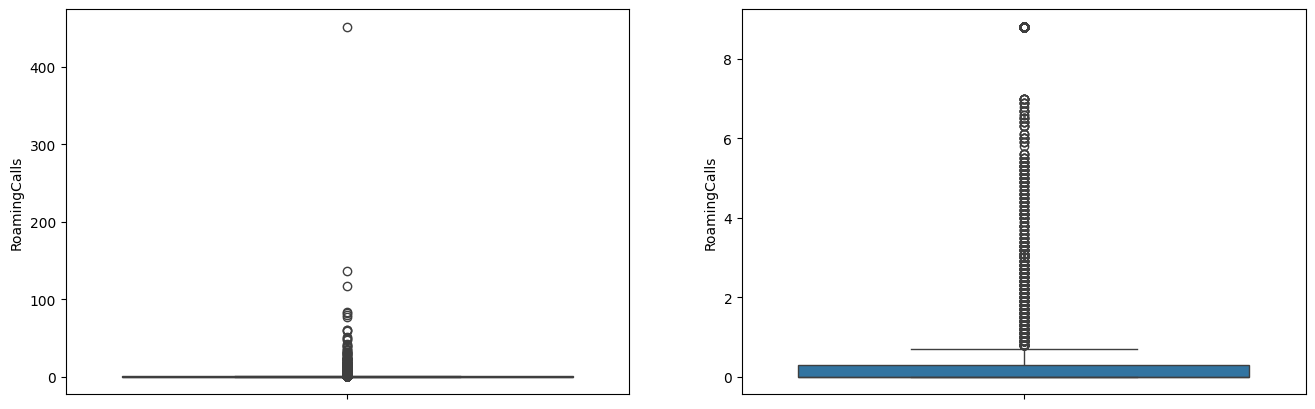

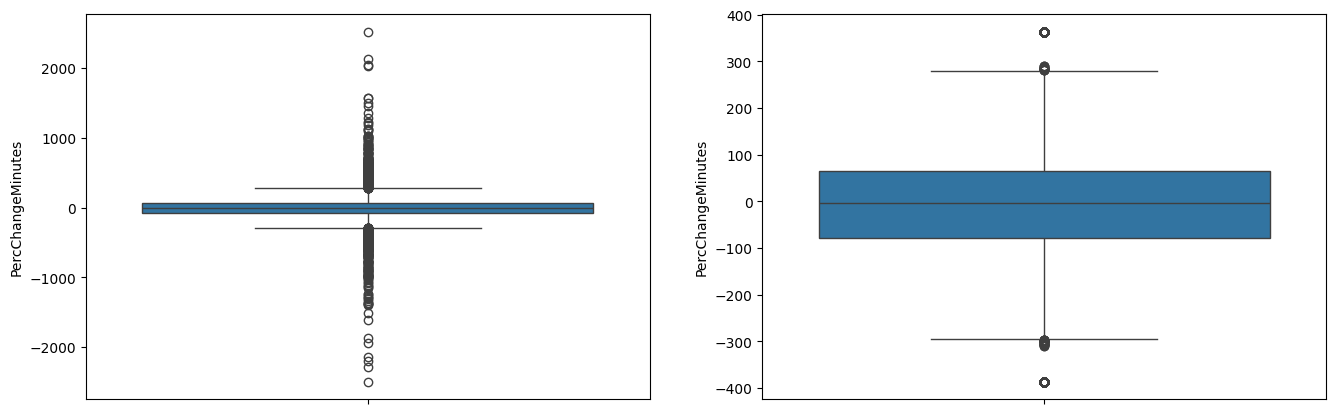

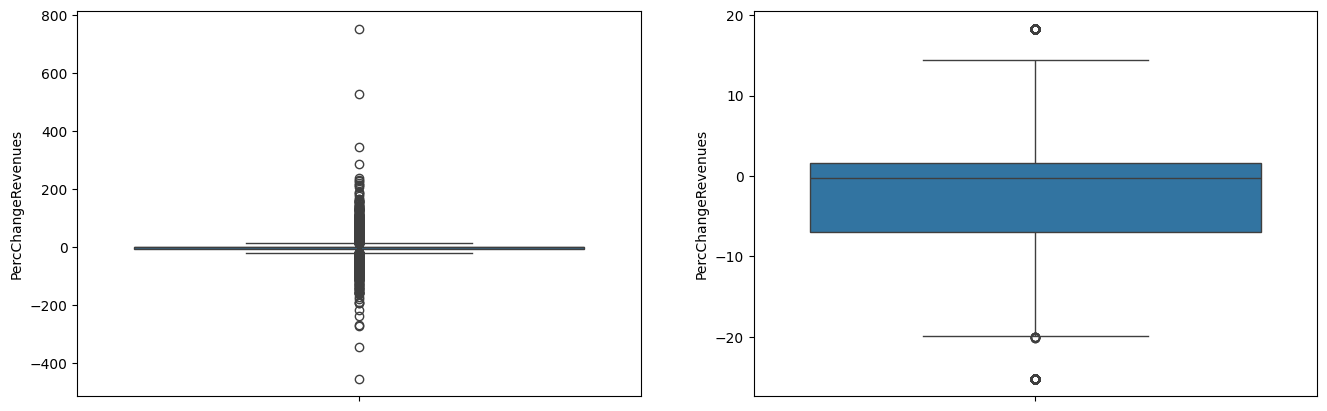

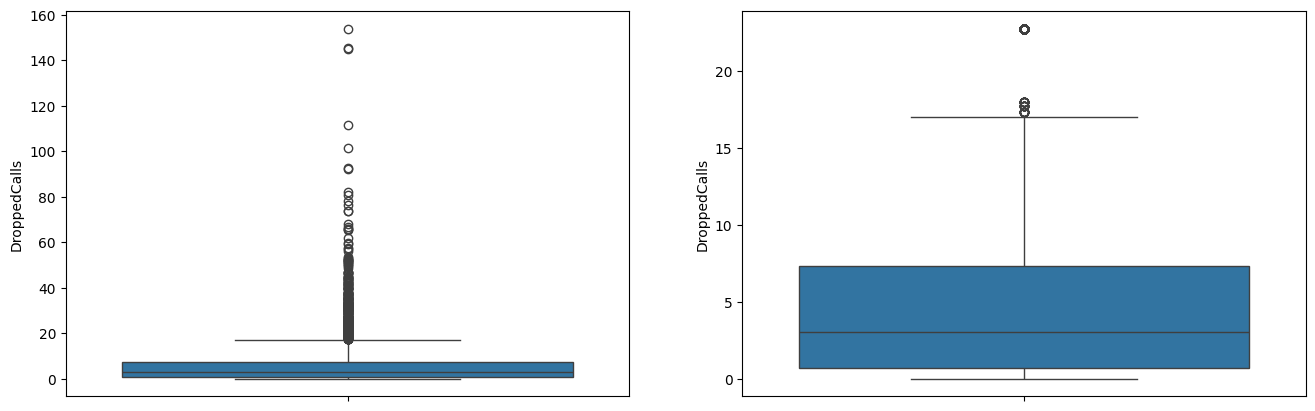

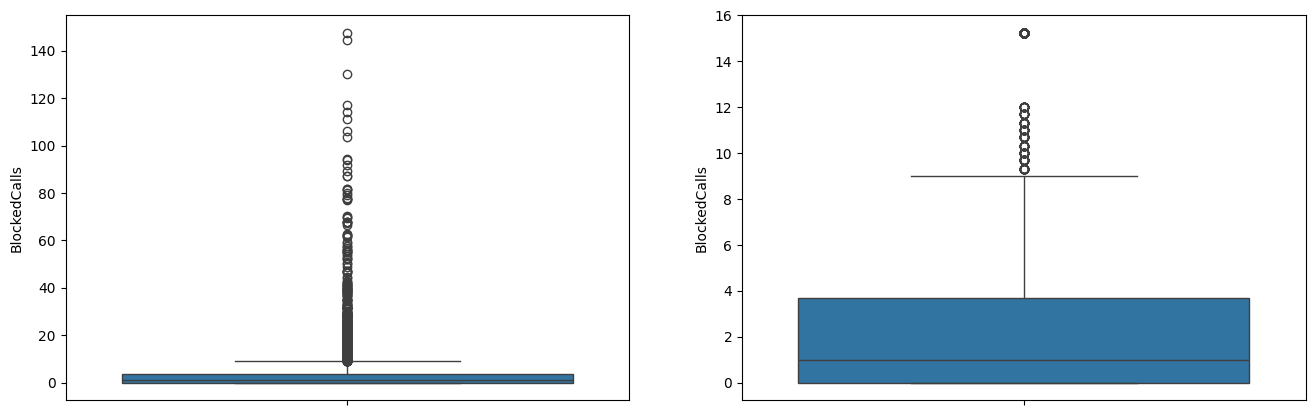

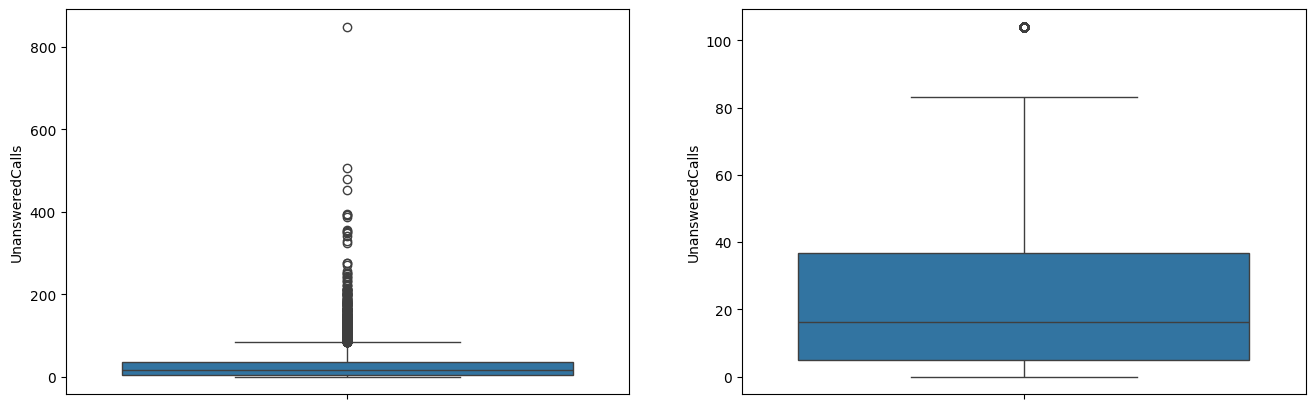

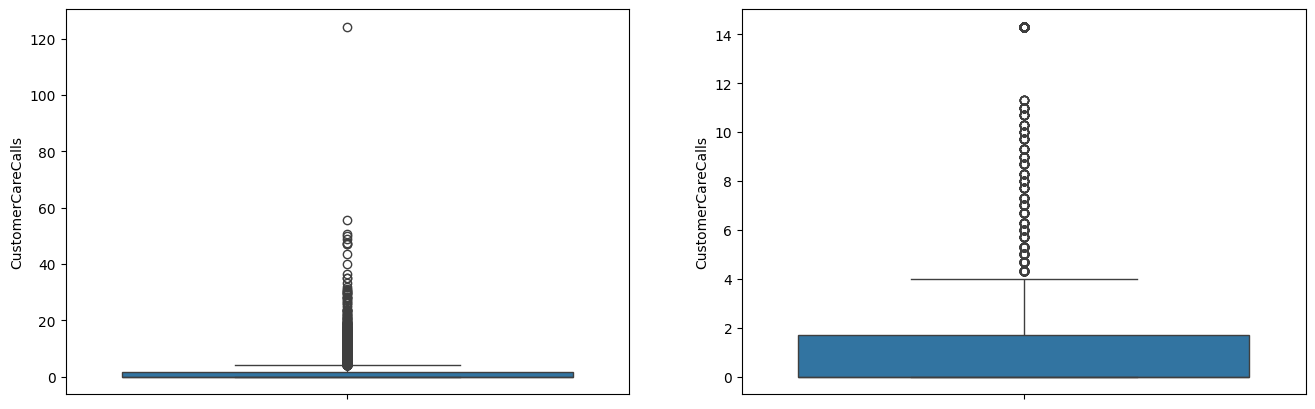

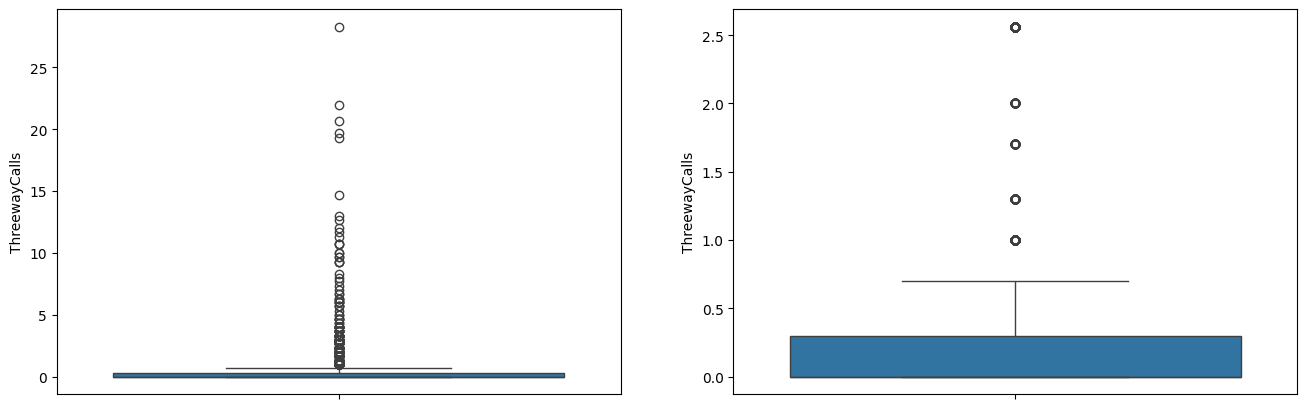

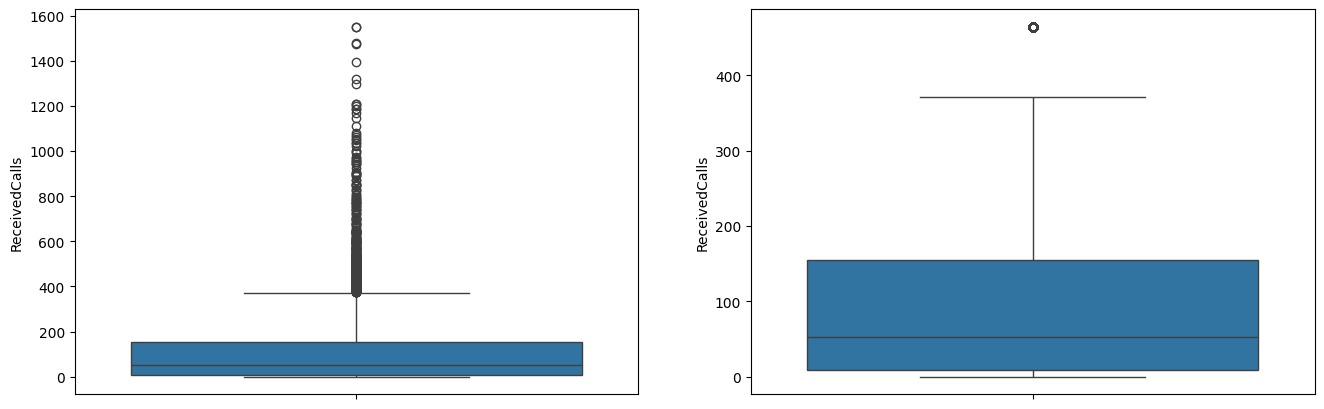

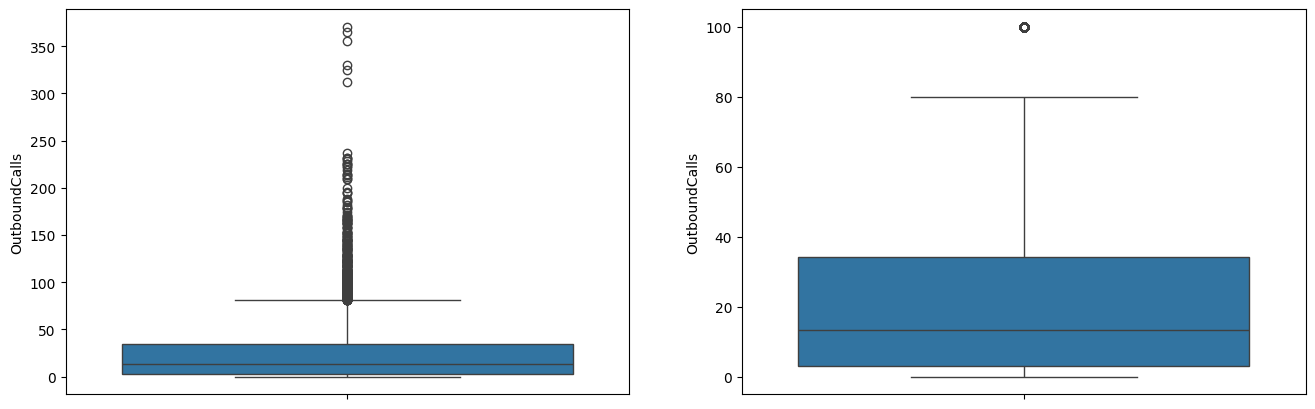

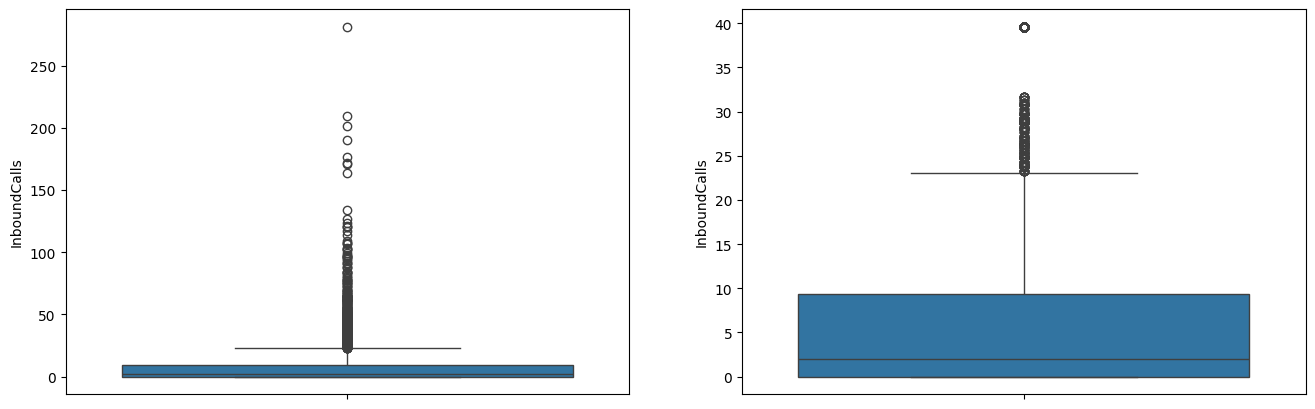

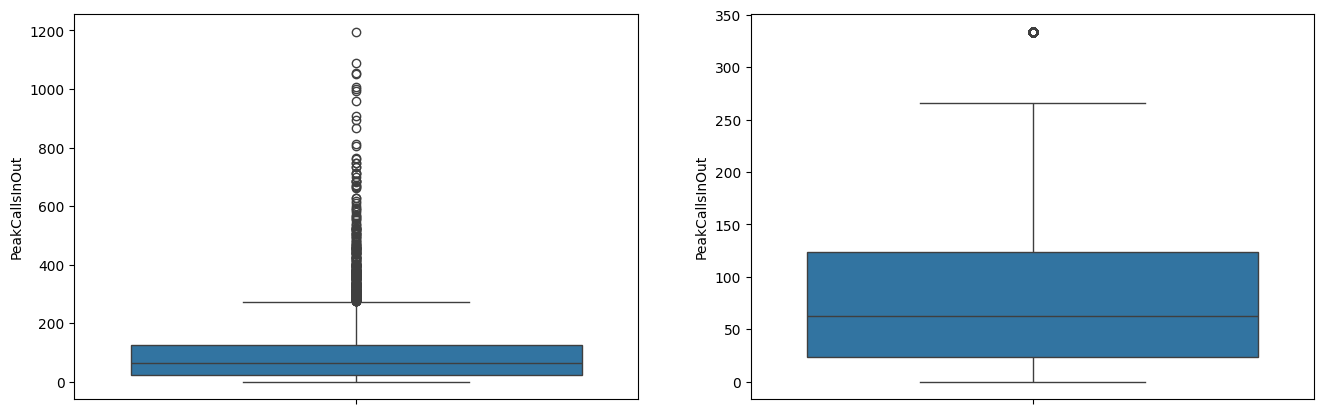

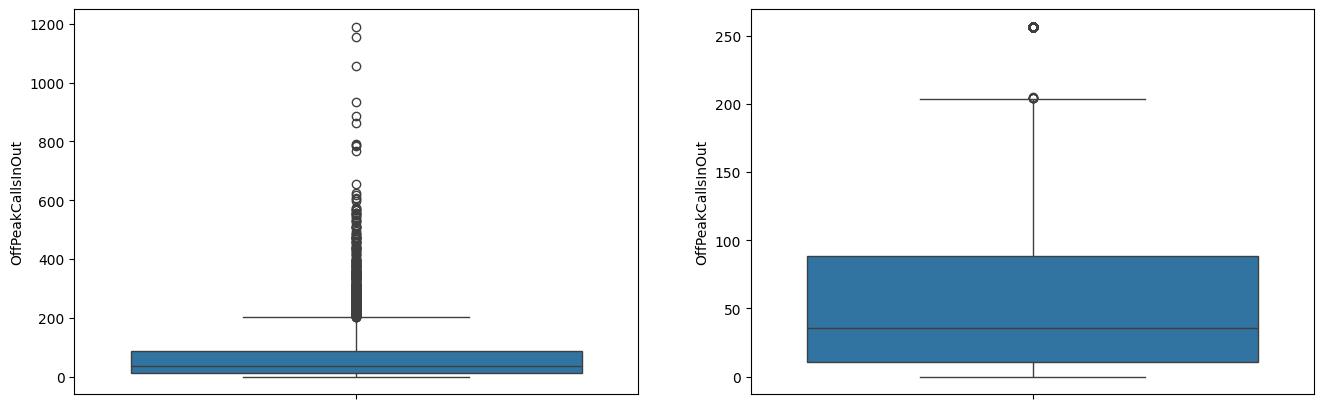

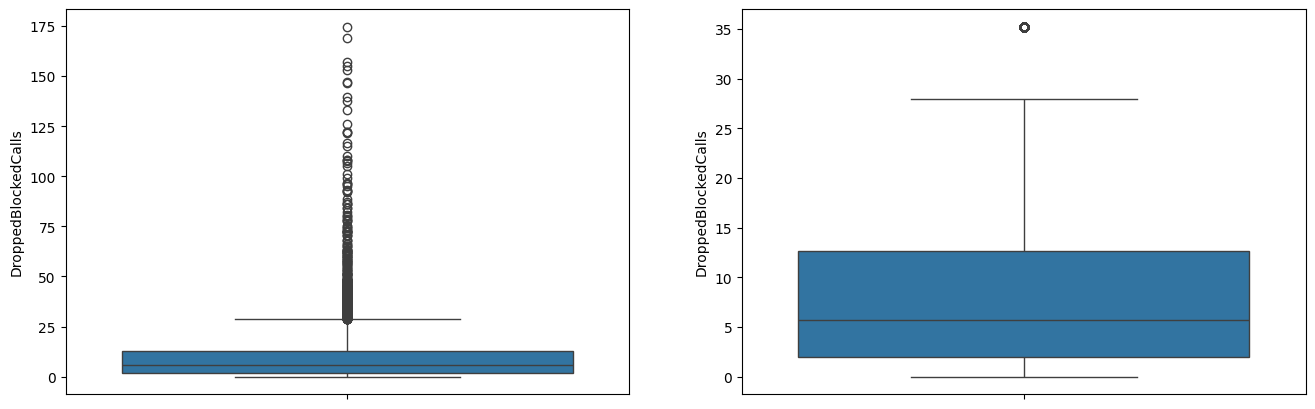

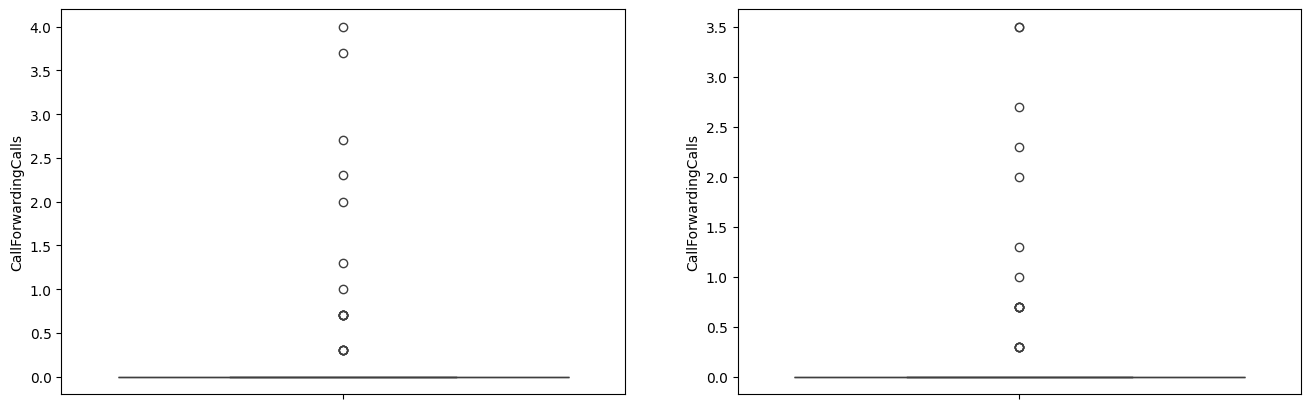

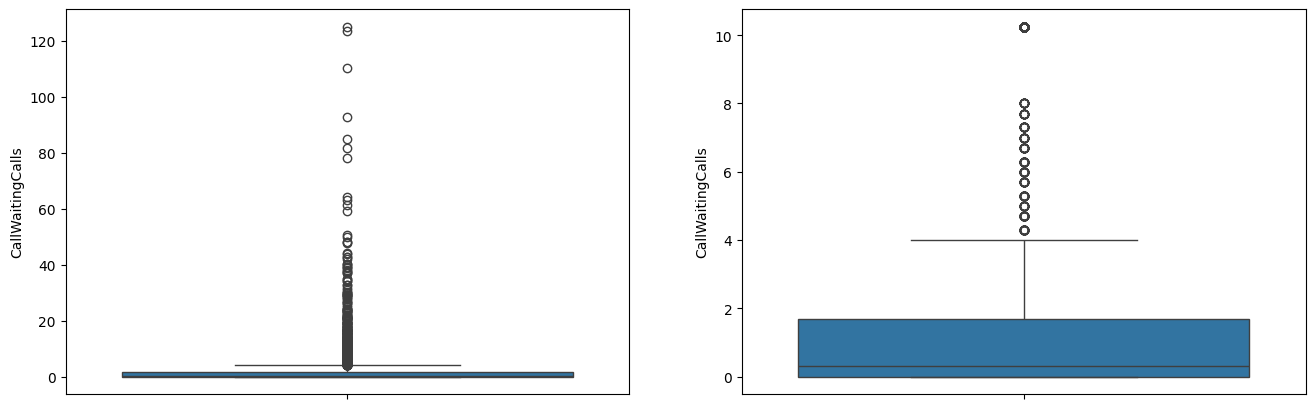

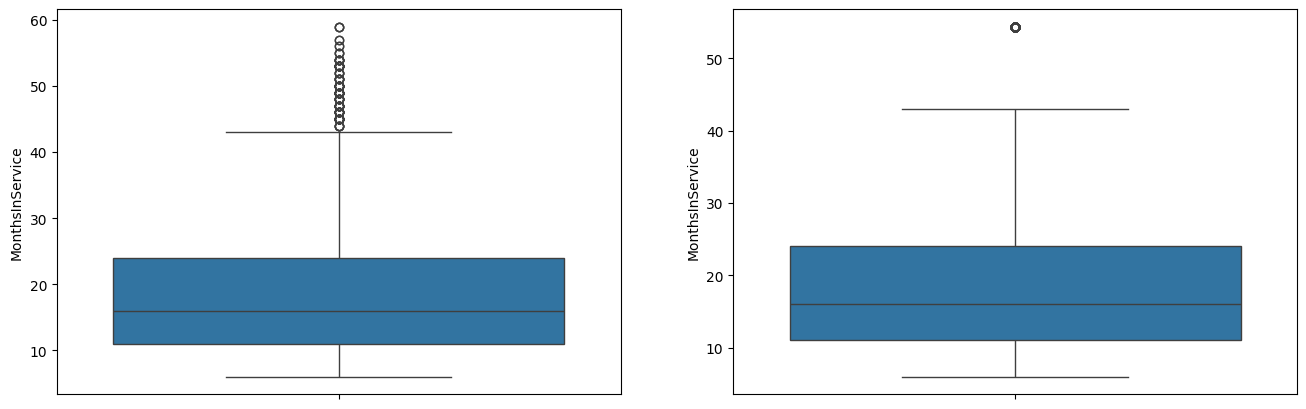

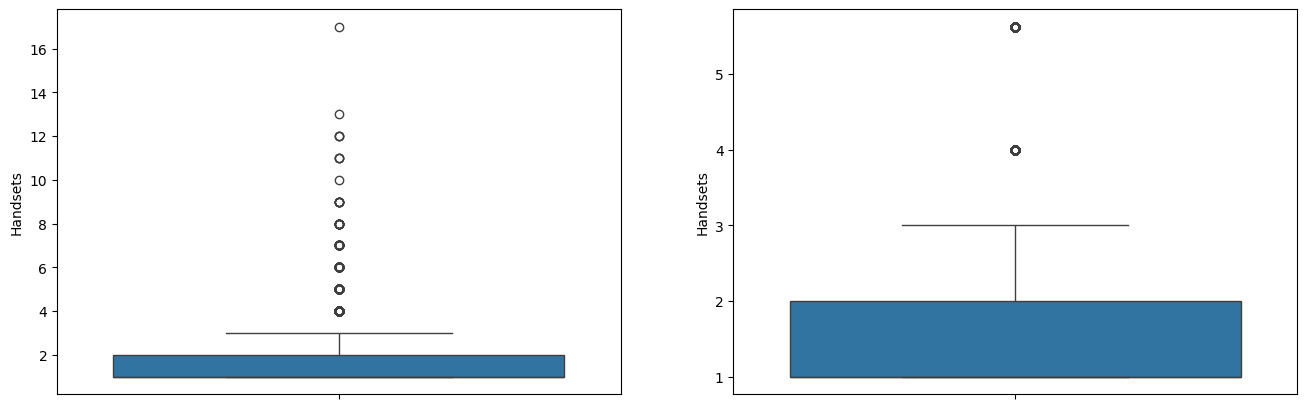

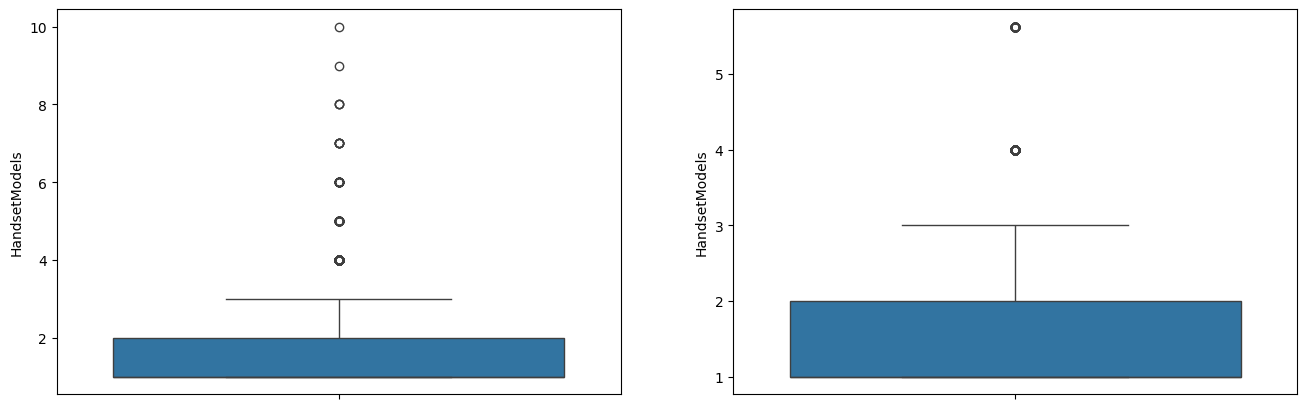

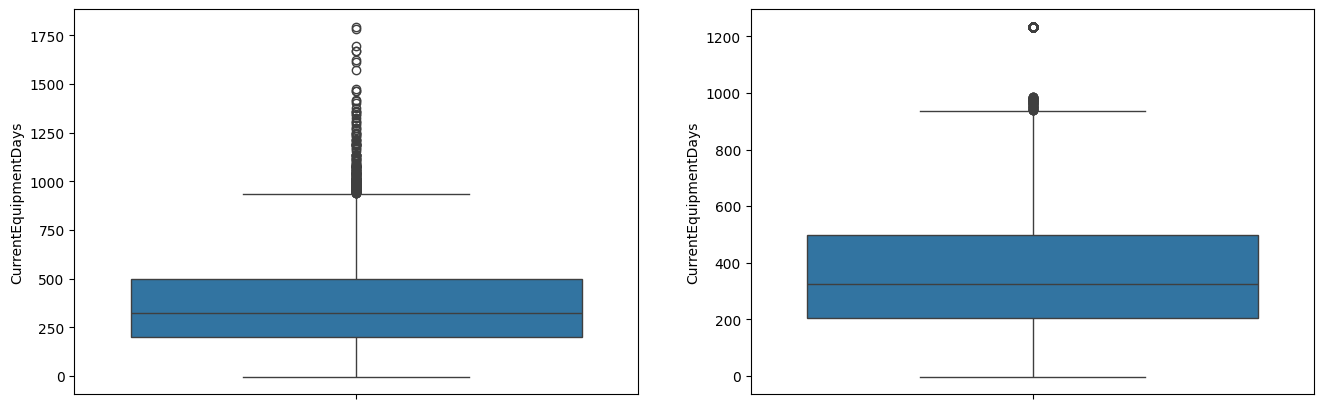

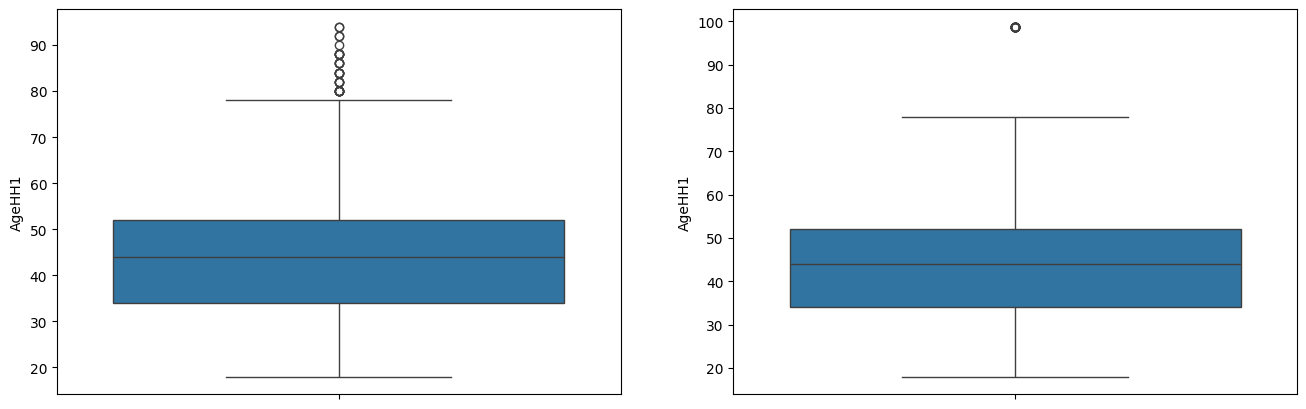

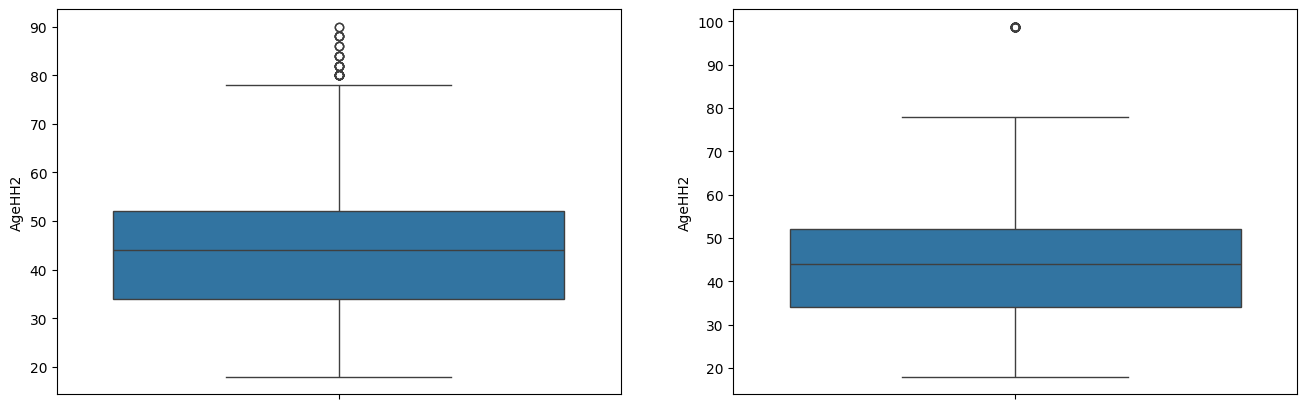

In [53]:
liste=list(number_of_outlier_val["#-of-Outliers"].index)
for i in liste:

    fig,ax=plt.subplots(1,2,figsize=(16,5))
    sns.boxplot(df_test[i],ax=ax[0])
    sns.boxplot(df_test_outlier_cleaned[i],ax=ax[1])

# MISSING VALUE HANDLING

In [54]:
df_missing=df_outlier.copy()

df_train_missing=df_train_outlier_cleaned.copy()
df_test_missing=df_test_outlier_cleaned.copy()
df_val_missing=df_val_outlier_cleaned.copy()

In [55]:
df_info[(df_info["Missing_Value_Rate"]>0) & (df_info["Missing_Value_Rate"]<10)]

Variable_Name     Type  Total_Entry  Missing_Value  \
2          MonthlyRevenue  float64        50891            156   
3          MonthlyMinutes  float64        50891            156   
4    TotalRecurringCharge  float64        50891            156   
5   DirectorAssistedCalls  float64        50891            156   
6          OverageMinutes  float64        50891            156   
7            RoamingCalls  float64        50891            156   
8       PercChangeMinutes  float64        50680            367   
9      PercChangeRevenues  float64        50680            367   
26            ServiceArea   object        51023             24   
27               Handsets  float64        51046              1   
28          HandsetModels  float64        51046              1   
29   CurrentEquipmentDays  float64        51046              1   

    Missing_Value_Rate                                      Unique_Values  \
2               0.3056  [24.0, 16.99, 38.0, 82.28, 17.14, 38.05, 31.66...   
3               0.3056  [219.0, 10.0, 8.0, 1312.0, 0.0, 682.0, 26.0, 9...   
4               0.3056  [22.0, 17.0, 38.0, 75.0, 52.0, 30.0, 66.0, 35....   
5               0.3056  [0.25, 0.0, 1.24, 2.48, 2.23, 0.5, 0.99, 2.97,...   
6               0.3056  [0.0, 250.0, 6.0, 2.0, 362.0, 10.0, 14.0, 97.0...   
7               0.3056  [0.0, 35.5, 1.3, 2.6, 1.9, 1.8, 0.1, 6.7, 2.1,...   
8               0.7189  [-157.0, -4.0, -2.0, 157.0, 0.0, 148.0, 60.0, ...   
9               0.7189  [-19.0, 0.0, 8.1, -0.2, -3.1, 4.0, 6.8, -0.3, ...   
26              0.0470  [SEAPOR503, PITHOM412, MILMIL414, OKCTUL918, O...   
27              0.0020  [2.0, 1.0, 9.0, 4.0, 3.0, 10.0, 5.0, 8.0, 18.0...   
28              0.0020  [2.0, 1.0, 4.0, 3.0, 5.0, 6.0, 9.0, 7.0, 10.0,...   
29              0.0020  [361.0, 1504.0, 1812.0, 458.0, 852.0, 231.0, 6...   

    Nunique_Values    Mean  Median      Min      Max             Variable  
2            12665   58.83   48.46    -6.17  1223.38     Continuous-Ratio  
3             2719  525.65  366.00     0.00  7359.00     Continuous-Ratio  
4              214   46.83   45.00   -11.00   400.00     Continuous-Ratio  
5              146    0.90    0.25     0.00   159.39     Continuous-Ratio  
6              746   40.03    3.00     0.00  4321.00     Continuous-Ratio  
7              530    1.24    0.00     0.00  1112.40     Continuous-Ratio  
8             2262  -11.55   -5.00 -3875.00  5192.00     Continuous-Ratio  
9             2899   -1.19   -0.30 -1107.70  2483.50     Continuous-Ratio  
26             747     NaN     NaN      NaN      NaN              Nominal  
27              23    1.81    1.00     1.00    24.00  Continuous-Interval  
28              13    1.56    1.00     1.00    15.00  Continuous-Interval  
29            1438  380.55  329.00    -5.00  1812.00     Continuous-Ratio

In [56]:
# We prefer to handle missing values for AgeHH1, AgeHH2 and HandsetPrice features with KNNImputer method.

imputer=KNNImputer()

df_train_missing[["AgeHH1"]]=imputer.fit_transform(df_train_missing[["AgeHH1"]])
df_test_missing[["AgeHH1"]]=imputer.transform(df_test_missing[["AgeHH1"]])
df_val_missing[["AgeHH1"]]=imputer.transform(df_val_missing[["AgeHH1"]])

df_train_missing[["AgeHH2"]]=imputer.fit_transform(df_train_missing[["AgeHH2"]])
df_test_missing[["AgeHH2"]]=imputer.transform(df_test_missing[["AgeHH2"]])
df_val_missing[["AgeHH2"]]=imputer.transform(df_val_missing[["AgeHH2"]])

df_train_missing[["HandsetPrice"]]=imputer.fit_transform(df_train_missing[["HandsetPrice"]])
df_test_missing[["HandsetPrice"]]=imputer.transform(df_test_missing[["HandsetPrice"]])
df_val_missing[["HandsetPrice"]]=imputer.transform(df_val_missing[["HandsetPrice"]])

df_train_missing[["HandsetPrice"]]=df_train_missing[["HandsetPrice"]].astype("float64")
df_test_missing[["HandsetPrice"]]=df_test_missing[["HandsetPrice"]].astype("float64")
df_val_missing[["HandsetPrice"]]=df_val_missing[["HandsetPrice"]].astype("float64")

In [57]:
k=list(df_missing.isnull().sum()[df_missing.isnull().sum()>0].index)
k.remove("ServiceArea")
k.remove("HandsetPrice")
k.remove("MaritalStatus")
k.remove("AgeHH1")
k.remove("AgeHH2")

for i in k:
    df_train_missing[i].fillna(df_train_missing[i].median(),inplace=True)
    df_test_missing[i].fillna(df_test_missing[i].median(),inplace=True)
    df_val_missing[i].fillna(df_val_missing[i].median(),inplace=True)


k=[]
k.append("ServiceArea")
for i in k:
    df_train_missing[i].fillna(df_train_missing[i].mode()[0],inplace=True)
    df_test_missing[i].fillna(df_test_missing[i].mode()[0],inplace=True)
    df_val_missing[i].fillna(df_val_missing[i].mode()[0],inplace=True)


In [58]:
# Made an approach to create a category "Unknown" instead of nan values


df_train_missing['MaritalStatus'].replace(np.nan,"Unknown", inplace = True)
df_test_missing['MaritalStatus'].replace(np.nan,"Unknown", inplace = True)
df_val_missing['MaritalStatus'].replace(np.nan,"Unknown", inplace = True)


# FEATURE GENERATION

We try to raise the roc score so that we create new features above.

In [59]:
def feature_gen(df):
    data=df.groupby(["MonthlyMinutes"])[["PercChangeMinutes"]].mean()
    data.columns=["_minutes"]
    df=pd.merge(df,data,on="MonthlyMinutes")
    data=df.groupby(["PercChangeMinutes"])[["MonthlyMinutes"]].mean()
    data.columns=["_minutes_2"]
    df=pd.merge(df,data,on="PercChangeMinutes")

    data=df.groupby(["MonthlyRevenue"])[["MonthlyMinutes"]].mean()
    data.columns=["_monthly"]
    df=pd.merge(df,data,on="MonthlyRevenue")

    data=df.groupby(["PercChangeRevenues"])[["PercChangeMinutes"]].mean()
    data.columns=["_perc"]
    df=pd.merge(df,data,on="PercChangeRevenues")

    data=df.groupby(["DroppedCalls"])[["BlockedCalls"]].mean()
    data.columns=["_failedCalls"]
    df=pd.merge(df,data,on="DroppedCalls")


    df["RetentionOfferUnAccepted"]=df["RetentionCalls"]-df["RetentionOffersAccepted"]
    df["TwoHH"] = df["AgeHH1"] + df["AgeHH2"]

    return df

In [60]:
df_train_missing = feature_gen(df_train_missing)
df_test_missing = feature_gen(df_test_missing)
df_val_missing = feature_gen(df_val_missing)

# ENCODING

In [61]:
df_encode=df_missing.copy()

df_train_encode=df_train_missing.copy()
df_test_encode=df_test_missing.copy()
df_val_encode=df_val_missing.copy()

### Handsetmodel & Handsets Categorizing

Before Encoding step, we categorize two value of Handsetprice feature.

In [62]:
df_train_encode.HandsetModels.value_counts()

HandsetModels
1.000    25510
2.000    10407
3.000     3305
4.000     1032
5.625      583
Name: count, dtype: int64

In [63]:
for i in df_train_encode["HandsetModels"].unique():
    if i==1.0:
        df_train_encode.loc[df_train_encode["HandsetModels"]==i,"HandsetModels"]="Model1"
        df_test_encode.loc[df_test_encode["HandsetModels"]==i,"HandsetModels"]="Model1"
        df_val_encode.loc[df_val_encode["HandsetModels"]==i,"HandsetModels"]="Model1"
    else:
        df_train_encode.loc[df_train_encode["HandsetModels"]==i,"HandsetModels"]="Model2"
        df_test_encode.loc[df_test_encode["HandsetModels"]==i,"HandsetModels"]="Model2"
        df_val_encode.loc[df_val_encode["HandsetModels"]==i,"HandsetModels"]="Model2"

In [64]:
df_train_encode.Handsets.value_counts()

Handsets
1.000    23068
2.000    10187
3.000     4035
4.000     1787
5.625     1760
Name: count, dtype: int64

In [65]:
for i in df_train_encode["Handsets"].unique():
    if i==1.0:
        df_train_encode.loc[df_train_encode["Handsets"]==i,"Handsets"]="Handsets1"
        df_test_encode.loc[df_test_encode["Handsets"]==i,"Handsets"]="Handsets1"
        df_val_encode.loc[df_val_encode["Handsets"]==i,"Handsets"]="Handsets1"
    else:
        df_train_encode.loc[df_train_encode["Handsets"]==i,"Handsets"]="Handsets2"
        df_test_encode.loc[df_test_encode["Handsets"]==i,"Handsets"]="Handsets2"
        df_val_encode.loc[df_val_encode["Handsets"]==i,"Handsets"]="Handsets2"

## Label Encoder

In [66]:
# If Feature has equal to two unique values, we use LabelEncoder method.

liste=list(df_info[(df_info["Type"]=="object")&(df_info["Nunique_Values"]==2)]["Variable_Name"])
liste.remove("MaritalStatus")
label=LabelEncoder()
for i in liste:
    df_train_encode[i]=label.fit_transform(df_train_encode[i])
    df_test_encode[i]=label.transform(df_test_encode[i])
    df_val_encode[i]=label.transform(df_val_encode[i])

## Ordinal Encoder for CreditRating

In [67]:
# We label CreditRating as "1-Highest" equal to 7 and "7-Lowest" equal to 1.

df_train_encode["CreditRating"].replace('1-Highest',7,inplace=True)
df_train_encode["CreditRating"].replace('2-High',6,inplace=True)
df_train_encode["CreditRating"].replace('3-Good',5,inplace=True)
df_train_encode["CreditRating"].replace('4-Medium',4,inplace=True)
df_train_encode["CreditRating"].replace('5-Low',3,inplace=True)
df_train_encode["CreditRating"].replace('6-VeryLow',2,inplace=True)
df_train_encode["CreditRating"].replace('7-Lowest',1,inplace=True)

df_test_encode["CreditRating"].replace('1-Highest',7,inplace=True)
df_test_encode["CreditRating"].replace('2-High',6,inplace=True)
df_test_encode["CreditRating"].replace('3-Good',5,inplace=True)
df_test_encode["CreditRating"].replace('4-Medium',4,inplace=True)
df_test_encode["CreditRating"].replace('5-Low',3,inplace=True)
df_test_encode["CreditRating"].replace('6-VeryLow',2,inplace=True)
df_test_encode["CreditRating"].replace('7-Lowest',1,inplace=True)

df_val_encode["CreditRating"].replace('1-Highest',7,inplace=True)
df_val_encode["CreditRating"].replace('2-High',6,inplace=True)
df_val_encode["CreditRating"].replace('3-Good',5,inplace=True)
df_val_encode["CreditRating"].replace('4-Medium',4,inplace=True)
df_val_encode["CreditRating"].replace('5-Low',3,inplace=True)
df_val_encode["CreditRating"].replace('6-VeryLow',2,inplace=True)
df_val_encode["CreditRating"].replace('7-Lowest',1,inplace=True)


## DROPPING COLUMNS

In [68]:
# We prefer to drop ServiceArea because of 747 unique values.

df_train_encode.drop("ServiceArea",axis=1,inplace=True)
df_test_encode.drop("ServiceArea",axis=1,inplace=True)
df_val_encode.drop("ServiceArea",axis=1,inplace=True)


df_train_encode.drop(["CustomerID"],axis=1,inplace=True)
df_test_encode.drop(["CustomerID"],axis=1,inplace=True)
df_val_encode.drop(["CustomerID"],axis=1,inplace=True)

### One-Hot Encoder

In [69]:
df_train_encode.head()

MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0           35.84           600.0                  45.0   
1           40.98           160.0                  50.0   
2           52.61           314.0                  54.0   
3           34.74           163.0                  30.0   
4           67.71           546.0                  48.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                0.00000             2.0           0.2              191.0   
1                0.99000             0.0           0.0              -96.0   
2                1.49000             0.0           1.2               69.0   
3                0.50000             2.0           3.2               86.0   
4                5.71875            59.0           0.0              290.0   

   PercChangeRevenues  DroppedCalls  BlockedCalls  ...    Occupation  \
0             -0.8000          11.0           3.0  ...         Other   
1             -1.0000           1.7           0.7  ...         Other   
2             -0.6000           6.7           3.3  ...         Other   
3             11.2000           1.7           0.7  ...         Other   
4             18.3125           3.3           0.0  ...  Professional   

   MaritalStatus  Churn   _minutes  _minutes_2    _monthly       _perc  \
0            Yes      1  28.355263  738.384615  344.375000  -16.192018   
1             No      0 -17.830986  461.988372  565.266667  -21.557515   
2        Unknown      0 -38.556604  443.241935  384.333333  -13.062147   
3            Yes      0  38.795455  492.013333  297.100000   53.490385   
4        Unknown      0 -36.223214  680.937500  842.000000  177.242553   

   _failedCalls  RetentionOfferUnAccepted       TwoHH  
0      3.879492                         0   66.241847  
1      2.682831                         0   87.702139  
2      3.753214                         0   87.702139  
3      2.682831                         0   66.000000  
4      3.220009                         0  100.000000  

[5 rows x 63 columns]

In [70]:
df_train_encode=pd.get_dummies(df_train_encode)
df_test_encode=pd.get_dummies(df_test_encode)
df_val_encode=pd.get_dummies(df_val_encode)

# NORMALIZATION

In [71]:

df_standard=df_encode.copy()

df_train_standard=df_train_encode.copy()
df_test_standard=df_test_encode.copy()
df_val_standard=df_val_encode.copy()

In [72]:
list_1=set(list(df_info[(df_info["Type"]=="int64")|(df_info["Type"]=="float64")]["Variable_Name"]))
list_2=set(list(df_train_standard.columns))

num_columns=list_1.intersection(list_2)
num_columns=list(num_columns)

In [73]:
# Using the standard Scaler for normalization because dataset is unbalanced

std=StandardScaler()


df_train_standard[num_columns] = pd.DataFrame(std.fit_transform(df_train_standard[num_columns]),columns=num_columns, index=df_train_standard[num_columns].index)
df_test_standard[num_columns] = pd.DataFrame(std.transform(df_test_standard[num_columns]),columns=num_columns, index=df_test_standard[num_columns].index)
df_val_standard[num_columns] = pd.DataFrame(std.transform(df_val_standard[num_columns]),columns=num_columns, index=df_val_standard[num_columns].index)

In [74]:
df_train_standard.head()

MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0       -0.605268        0.170965             -0.069823   
1       -0.459435       -0.731012              0.149592   
2       -0.129465       -0.415320              0.325123   
3       -0.636478       -0.724862             -0.728066   
4        0.298957        0.060268              0.061826   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0              -0.565030       -0.526731     -0.269287           1.167190   
1               0.157241       -0.558813     -0.375656          -0.506674   
2               0.522024       -0.558813      0.262557           0.455652   
3              -0.200247       -0.526731      1.326244           0.554801   
4               3.607177        0.387600     -0.375656           1.744586   

   PercChangeRevenues  DroppedCalls  BlockedCalls  ...  Occupation_Crafts  \
0            0.119410      0.872559      0.011099  ...              False   
1            0.103088     -0.587134     -0.517747  ...              False   
2            0.135732      0.197647      0.080078  ...              False   
3            1.098718     -0.587134     -0.517747  ...              False   
4            1.679162     -0.336004     -0.678701  ...              False   

   Occupation_Homemaker  Occupation_Other  Occupation_Professional  \
0                 False              True                    False   
1                 False              True                    False   
2                 False              True                    False   
3                 False              True                    False   
4                 False             False                     True   

   Occupation_Retired  Occupation_Self  Occupation_Student  MaritalStatus_No  \
0               False            False               False             False   
1               False            False               False              True   
2               False            False               False             False   
3               False            False               False             False   
4               False            False               False             False   

   MaritalStatus_Unknown  MaritalStatus_Yes  
0                  False               True  
1                  False              False  
2                   True              False  
3                  False               True  
4                   True              False  

[5 rows x 77 columns]

In [75]:
df_test_standard.head()

MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0       -0.645273       -0.415320             -0.728066   
1       -0.770962       -0.745362             -0.728066   
2        0.111699       -0.386621              0.456772   
3       -1.216123       -0.341522             -1.605724   
4       -0.763869       -0.702313             -0.728066   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0              -0.565030       -0.478608      1.007138          -0.016763   
1              -0.565030       -0.558813     -0.375656           0.111547   
2               0.157241       -0.205913     -0.375656          -2.199494   
3              -0.565030       -0.542772     -0.375656          -0.821618   
4              -0.382638       -0.558813     -0.375656           0.379832   

   PercChangeRevenues  DroppedCalls  BlockedCalls  ...  Occupation_Crafts  \
0            0.086767      0.558646     -0.218834  ...              False   
1            0.184697     -0.744090     -0.678701  ...              False   
2           -0.345761      0.197647      2.827779  ...              False   
3            0.160215     -0.853960     -0.678701  ...              False   
4            0.168376     -0.492960     -0.448768  ...              False   

   Occupation_Homemaker  Occupation_Other  Occupation_Professional  \
0                 False             False                     True   
1                 False              True                    False   
2                 False             False                     True   
3                  True             False                    False   
4                 False             False                     True   

   Occupation_Retired  Occupation_Self  Occupation_Student  MaritalStatus_No  \
0               False            False               False             False   
1               False            False               False              True   
2               False            False               False             False   
3               False            False               False             False   
4               False            False               False             False   

   MaritalStatus_Unknown  MaritalStatus_Yes  
0                  False               True  
1                  False              False  
2                  False               True  
3                  False               True  
4                  False               True  

[5 rows x 77 columns]

In [76]:
df_val_standard.head()

MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0       -0.679320       -0.591615             -0.640300   
1       -0.191033       -0.015580              0.588420   
2       -0.002073        1.698177              0.588420   
3       -0.541147       -0.027880             -0.377003   
4       -0.728404       -0.936007             -0.728066   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0              -0.025151       -0.558813     -0.375656          -0.407526   
1              -0.565030       -0.558813     -0.375656           0.718105   
2               0.157241       -0.093627     -0.375656          -0.366700   
3              -0.565030       -0.526731     -0.375656          -0.413358   
4               0.339632       -0.558813     -0.375656           0.210696   

   PercChangeRevenues  DroppedCalls  BlockedCalls  ...  Occupation_Crafts  \
0            0.127571     -0.492960     -0.678701  ...              False   
1            0.152054     -0.697003     -0.287814  ...              False   
2            0.013319      1.296340     -0.448768  ...              False   
3           -1.870829     -0.540047     -0.287814  ...              False   
4            0.143893     -0.649917     -0.678701  ...              False   

   Occupation_Homemaker  Occupation_Other  Occupation_Professional  \
0                 False             False                    False   
1                 False             False                     True   
2                 False              True                    False   
3                 False              True                    False   
4                 False              True                    False   

   Occupation_Retired  Occupation_Self  Occupation_Student  MaritalStatus_No  \
0               False             True               False              True   
1               False            False               False             False   
2               False            False               False              True   
3               False            False               False             False   
4               False            False               False             False   

   MaritalStatus_Unknown  MaritalStatus_Yes  
0                  False              False  
1                  False               True  
2                  False              False  
3                   True              False  
4                   True              False  

[5 rows x 77 columns]

# TRAIN TEST VALIDATION SPLIT(X,Y)

In [77]:
X_train,y_train=df_train_standard.drop(["Churn"],axis=1),df_train_standard["Churn"]
X_test,y_test=df_test_standard.drop(["Churn"],axis=1),df_test_standard["Churn"]
X_val,y_val=df_val_standard.drop(["Churn"],axis=1),df_val_standard["Churn"]

# FEATURE IMPORTANCE

In [78]:
X_train.shape

(40837, 76)

## Feature Importance for data frame which is not include new features in "feature generate"

In this section, we are not include the freatures that we generate before so that we can see the differences.

In [79]:
X_train_no_new_feature=X_train.drop(["_minutes","_minutes_2","_monthly","_perc","_failedCalls","RetentionOfferUnAccepted","TwoHH"],axis=1)

<Axes: ylabel='Columns'>

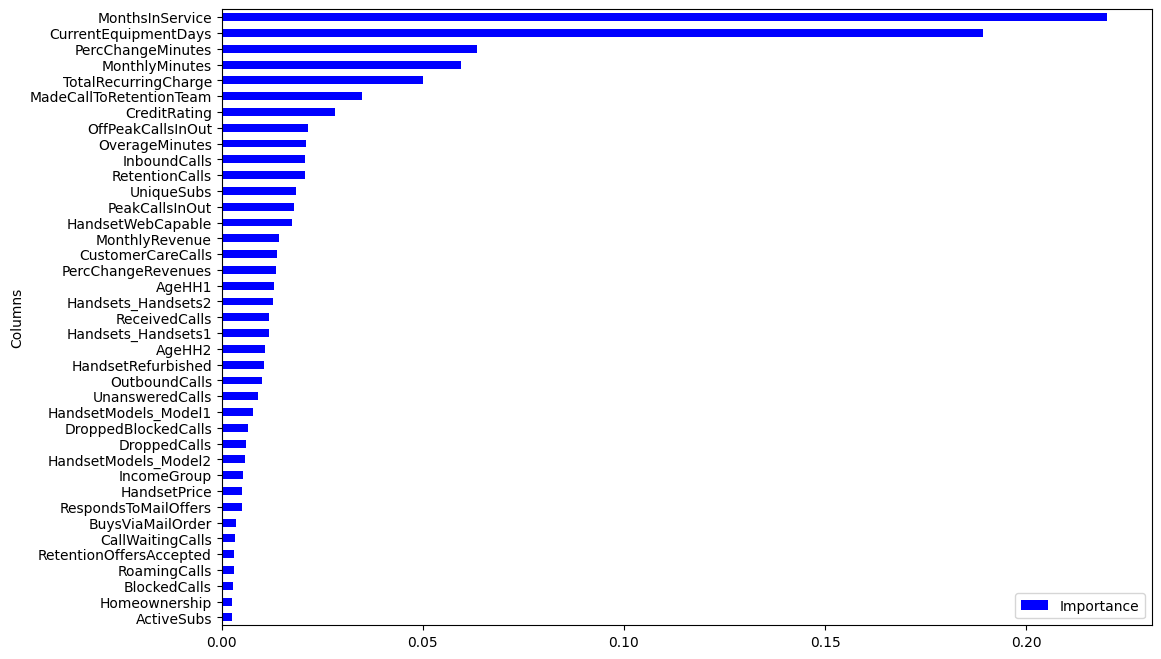

In [80]:
model_rf = RandomForestClassifier(class_weight ="balanced",max_depth= 5,random_state=0)
model_rf.fit(X_train_no_new_feature,y_train)

importance = model_rf.feature_importances_
importances=pd.DataFrame({"Columns":X_train_no_new_feature.columns,"Importance":importance})
importances=importances.set_index("Columns")
importances.sort_values(by="Importance",axis=0,ascending=True)[30:].plot(kind="barh",color="blue",figsize=(12,8))

## Feature Importance for data frame which is include new features in "feature generate"

<Axes: ylabel='Columns'>

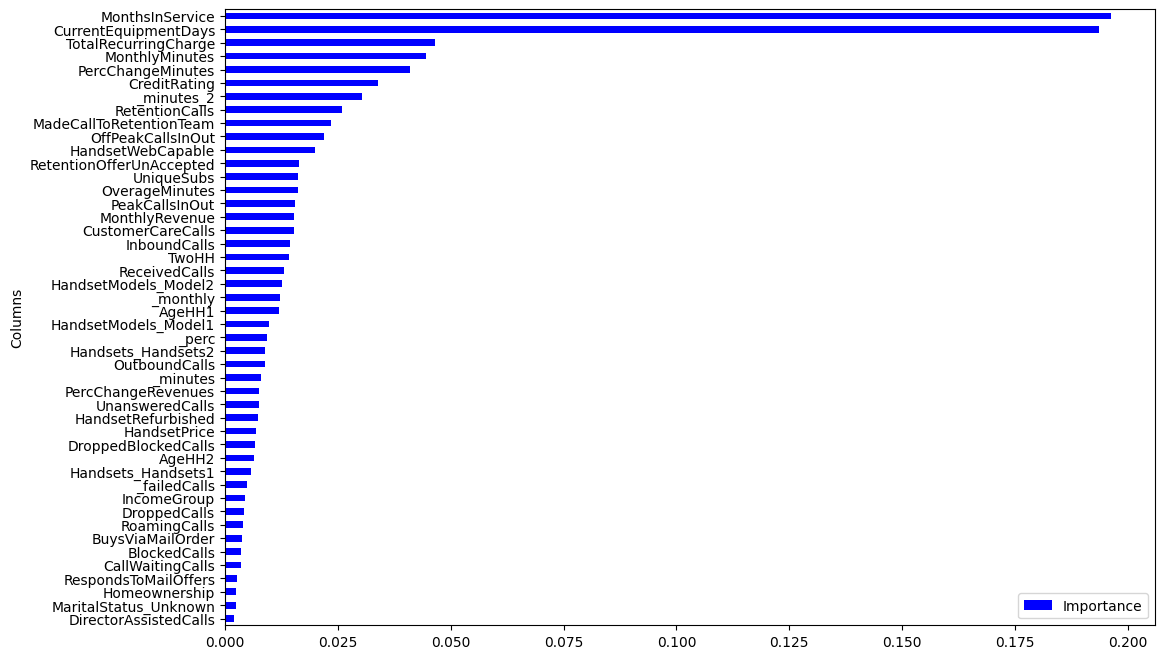

In [81]:
model_rf = RandomForestClassifier(class_weight ="balanced",max_depth= 5,random_state=0)
model_rf.fit(X_train,y_train)

importance = model_rf.feature_importances_
importances=pd.DataFrame({"Columns":X_train.columns,"Importance":importance})
importances=importances.set_index("Columns")
importances.sort_values(by="Importance",axis=0,ascending=True)[30:].plot(kind="barh",color="blue",figsize=(12,8))

You can see that "_minutes_2,_monthly,TwoHH,_perc" features are effective for model.

In [82]:

feature_outlier=list(importances[importances["Importance"]<0.001].index)

In [83]:
X_train.drop(feature_outlier,axis=1,inplace=True)
X_test.drop(feature_outlier,axis=1,inplace=True)
X_val.drop(feature_outlier,axis=1,inplace=True)

In [84]:
y_train.value_counts()

Churn
0    29004
1    11833
Name: count, dtype: int64

# CREATE MODEL

We will check different models and compare them

In [87]:
dc_model=DecisionTreeClassifier(class_weight='balanced',criterion='entropy',max_depth=7,max_features=21,min_samples_split=30)
dc_model.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=7, max_features=21, min_samples_split=30)

In [88]:
gb_model = GradientBoostingClassifier(learning_rate=0.055,max_depth=4,subsample=0.6)
gb_model.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.055, max_depth=4, subsample=0.6)

In [89]:
xgb_model = XGBClassifier(learning_rate=0.05,max_depth=4,n_estimators=1000,scale_pos_weight=2.4575524949198466,subsample=0.6)
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.05, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=1000,
              n_jobs=None, num_parallel_tree=None, ...)

In [110]:
import warnings
warnings.filterwarnings("ignore")

import lightgbm as lgb
from lightgbm import LGBMClassifier

lgbm_model = LGBMClassifier(
    class_weight="balanced",
    learning_rate=0.05,
    max_depth=3,
    num_leaves=31,
    min_child_samples=20,
    n_estimators=300,     # reduced from 1000 → MUCH faster
    boosting_type="gbdt",
    n_jobs=-1,
    verbose=-1
)

lgbm_model.fit(
    X_train,
    y_train,
    eval_set=[(X_val, y_val)],
    eval_metric="auc",
    callbacks=[lgb.early_stopping(stopping_rounds=50),  # stops when no improvement
               lgb.log_evaluation(-1)]                 # removes logs
)


Training until validation scores don't improve for 50 rounds
Did not meet early stopping. Best iteration is:
[300]	valid_0's auc: 0.6799	valid_0's binary_logloss: 0.636815


LGBMClassifier(class_weight='balanced', learning_rate=0.05, max_depth=3,
               n_estimators=300, n_jobs=-1, verbose=-1)

In [111]:
rf_model=RandomForestClassifier(class_weight='balanced',max_depth=10,max_features=8,min_samples_split=10,n_estimators=1000)
rf_model.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=8,
                       min_samples_split=10, n_estimators=1000)

In [112]:
cat_model=CatBoostClassifier(scale_pos_weight=2.4575524949198466,learning_rate=0.05,max_depth=4,n_estimators=1000)
cat_model.fit(X_train,y_train)

0:	learn: 0.6910018	total: 12.9ms	remaining: 12.9s
1:	learn: 0.6893461	total: 24.2ms	remaining: 12.1s
2:	learn: 0.6875151	total: 35.8ms	remaining: 11.9s
3:	learn: 0.6858789	total: 46.6ms	remaining: 11.6s
4:	learn: 0.6845875	total: 62.4ms	remaining: 12.4s
5:	learn: 0.6833446	total: 84.1ms	remaining: 13.9s
6:	learn: 0.6817658	total: 99.5ms	remaining: 14.1s
7:	learn: 0.6806278	total: 110ms	remaining: 13.6s
8:	learn: 0.6792687	total: 122ms	remaining: 13.4s
9:	learn: 0.6781240	total: 133ms	remaining: 13.1s
10:	learn: 0.6770888	total: 143ms	remaining: 12.9s
11:	learn: 0.6762827	total: 154ms	remaining: 12.6s
12:	learn: 0.6753570	total: 165ms	remaining: 12.5s
13:	learn: 0.6745911	total: 175ms	remaining: 12.3s
14:	learn: 0.6735999	total: 186ms	remaining: 12.2s
15:	learn: 0.6729042	total: 196ms	remaining: 12.1s
16:	learn: 0.6722391	total: 207ms	remaining: 12s
17:	learn: 0.6714200	total: 222ms	remaining: 12.1s
18:	learn: 0.6708414	total: 234ms	remaining: 12.1s
19:	learn: 0.6701927	total: 246ms	re

In [93]:
list_model=[dc_model,rf_model,gb_model,xgb_model,lgbm_model,cat_model]
list_model_name=["DecisionTree","RandomForest","GBM","XGBoost","LightGBM","CatBoost"]

In [113]:
for i in range(len(list_model)):
    print(list_model_name[i])
    print("-"*50)
    print(classification_report(y_test,list_model[i].predict(X_test)))

DecisionTree
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.79      0.58      0.67      3691
           1       0.35      0.60      0.44      1414

    accuracy                           0.58      5105
   macro avg       0.57      0.59      0.56      5105
weighted avg       0.67      0.58      0.61      5105

RandomForest
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.61      0.69      3691
           1       0.37      0.59      0.45      1414

    accuracy                           0.61      5105
   macro avg       0.58      0.60      0.57      5105
weighted avg       0.68      0.61      0.63      5105

GBM
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.73      0.98      0.84      3691
           1       0.60      0.06      0.12      1414


Text(0.5, 0.98, 'ROC Curve Comparison')

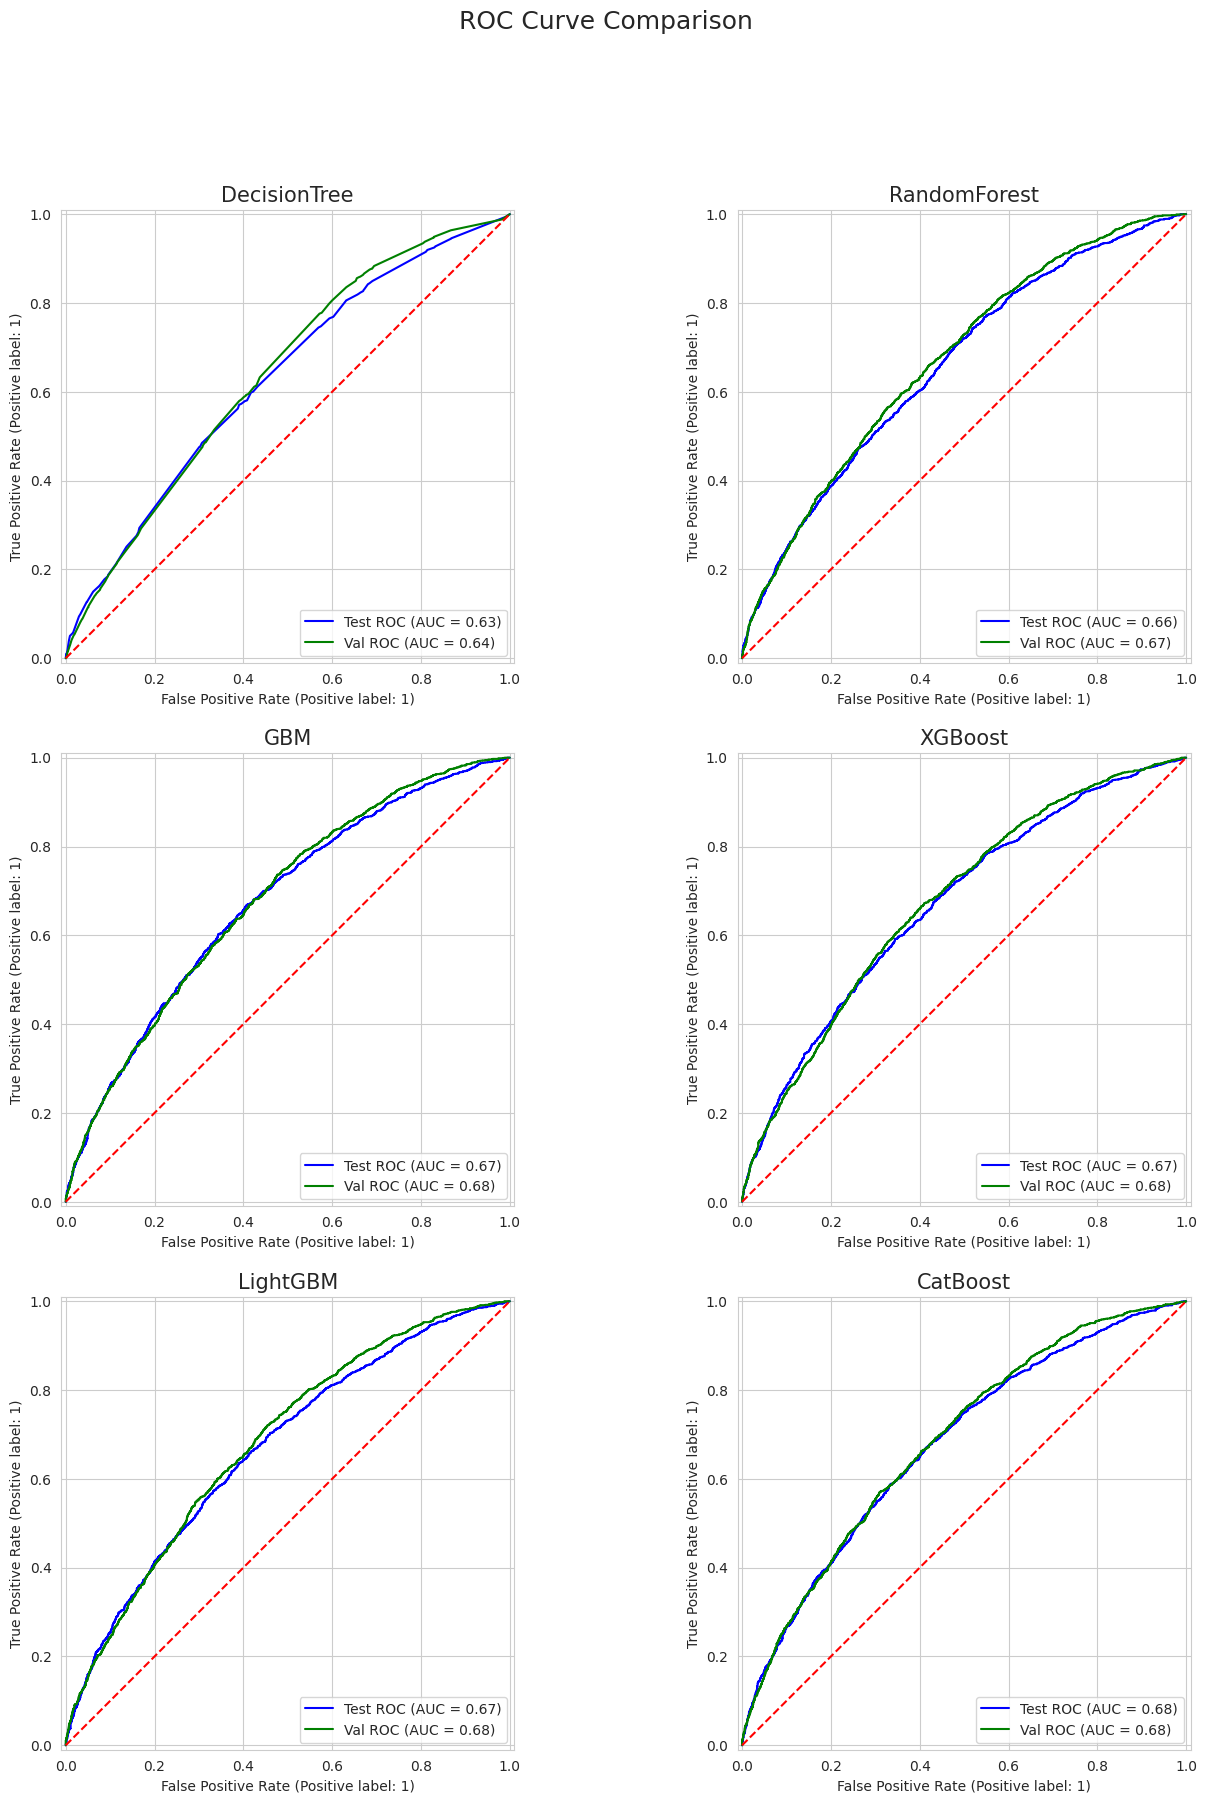

In [122]:
from sklearn.metrics import RocCurveDisplay

MY_test = {}
MY_val = {}

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 20))
count = 0

for i in range(3):
    for j in range(2):

        # ROC for Test
        roc_1 = RocCurveDisplay.from_estimator(
            list_model[count],
            X_test,
            y_test,
            ax=ax[i][j],
            name="Test ROC",
            color="blue"
        )

        # ROC for Validation
        roc_2 = RocCurveDisplay.from_estimator(
            list_model[count],
            X_val,
            y_val,
            ax=ax[i][j],
            name="Val ROC",
            color="green"
        )

        # Diagonal line (baseline)
        ax[i][j].plot([0,1], [0,1], 'r--')

        ax[i][j].legend(loc="lower right")
        ax[i][j].set_title(list_model_name[count], fontsize=15)

        # Save AUC scores
        MY_test[list_model_name[count]] = roc_1.roc_auc
        MY_val[list_model_name[count]] = roc_2.roc_auc

        count += 1

fig.suptitle("ROC Curve Comparison", fontsize=18)


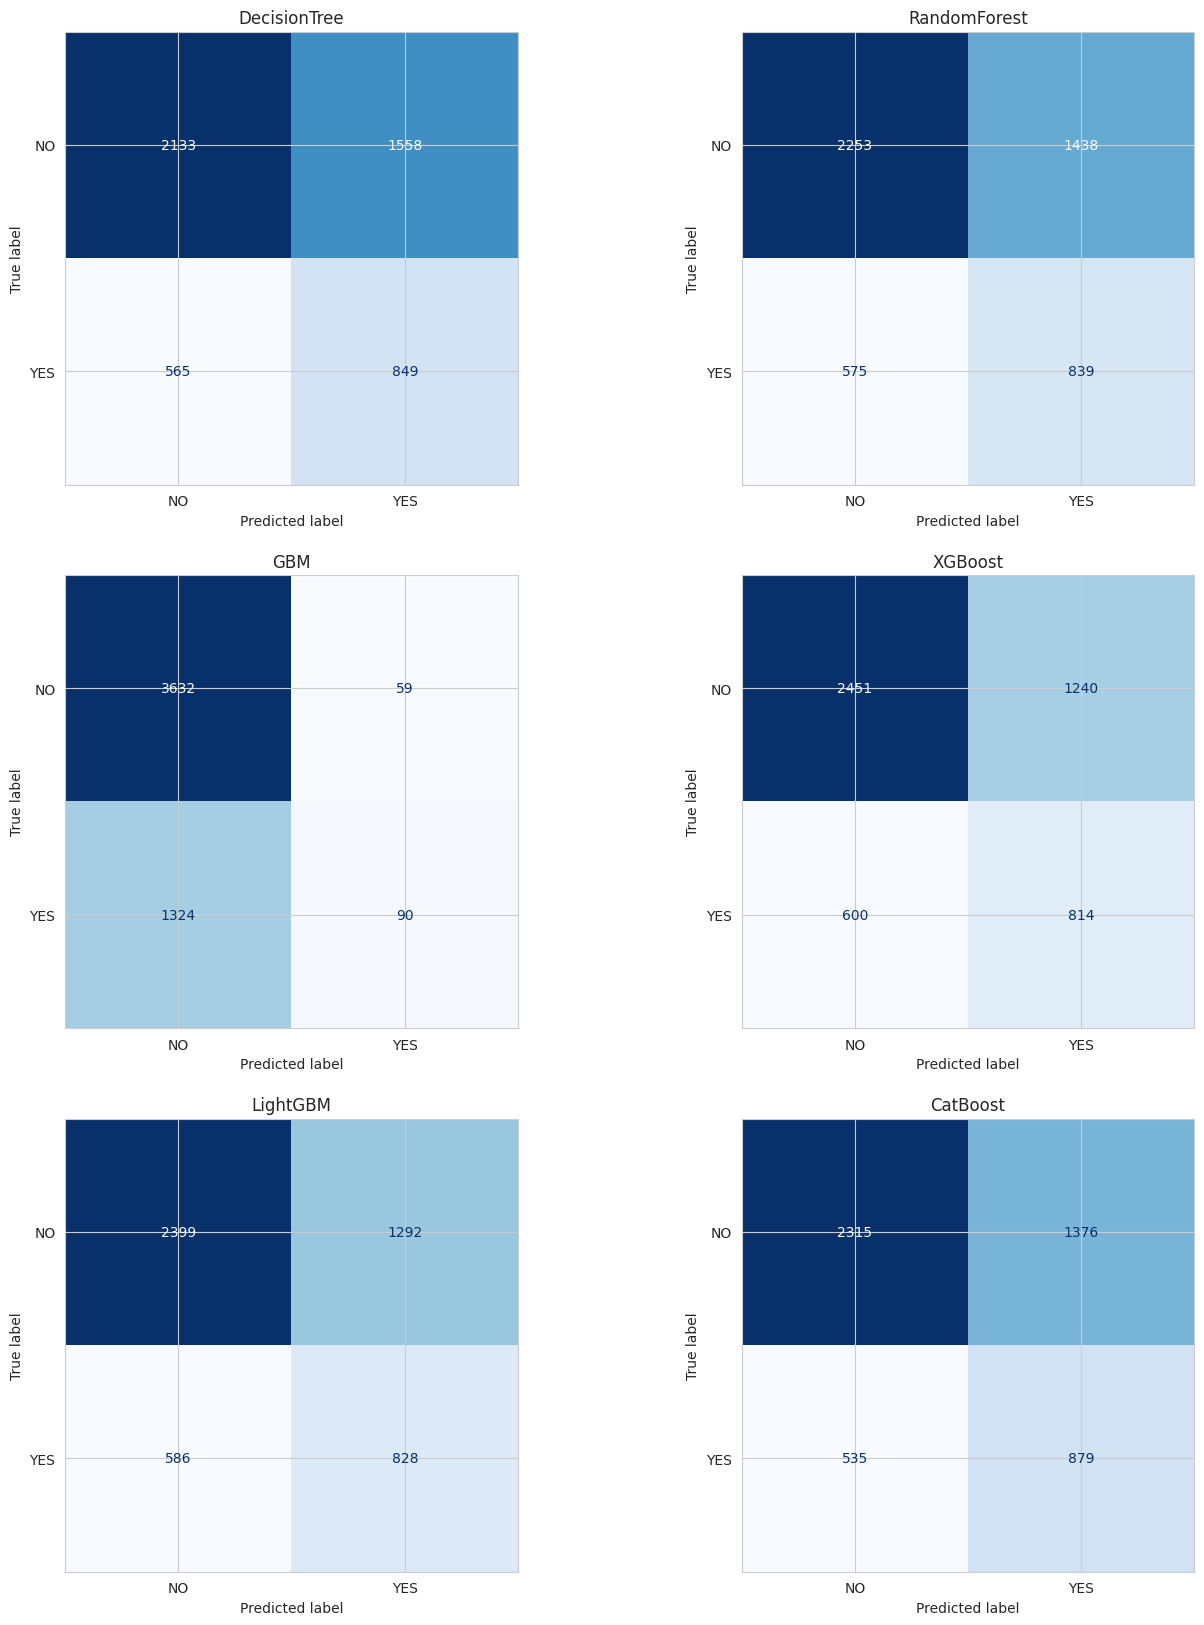

In [123]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(16, 20))
count = 0

for i in range(3):
    for j in range(2):
        ConfusionMatrixDisplay.from_estimator(
            list_model[count],
            X_test,
            y_test,
            display_labels=["NO", "YES"],
            cmap=plt.cm.Blues,
            ax=ax[i][j],
            colorbar=False
        )

        ax[i][j].set_title(list_model_name[count])
        count += 1


In [124]:
data_test=pd.DataFrame(MY_test,index=np.arange(1)).T
data_test.columns=["Test_Score"]

data_val=pd.DataFrame(MY_val,index=np.arange(1)).T
data_val.columns=["Val_Score"]

In [125]:
data_test

Test_Score
DecisionTree    0.628475
RandomForest    0.658264
GBM             0.673659
XGBoost         0.669433
LightGBM        0.668361
CatBoost        0.675433

In [126]:
data_val

Val_Score
DecisionTree   0.639053
RandomForest   0.671476
GBM            0.678972
XGBoost        0.675954
LightGBM       0.681233
CatBoost       0.683844

In [127]:
sns.set_style("whitegrid")

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'DecisionTree'),
  Text(1, 0, 'RandomForest'),
  Text(2, 0, 'LightGBM'),
  Text(3, 0, 'XGBoost'),
  Text(4, 0, 'GBM'),
  Text(5, 0, 'CatBoost')])

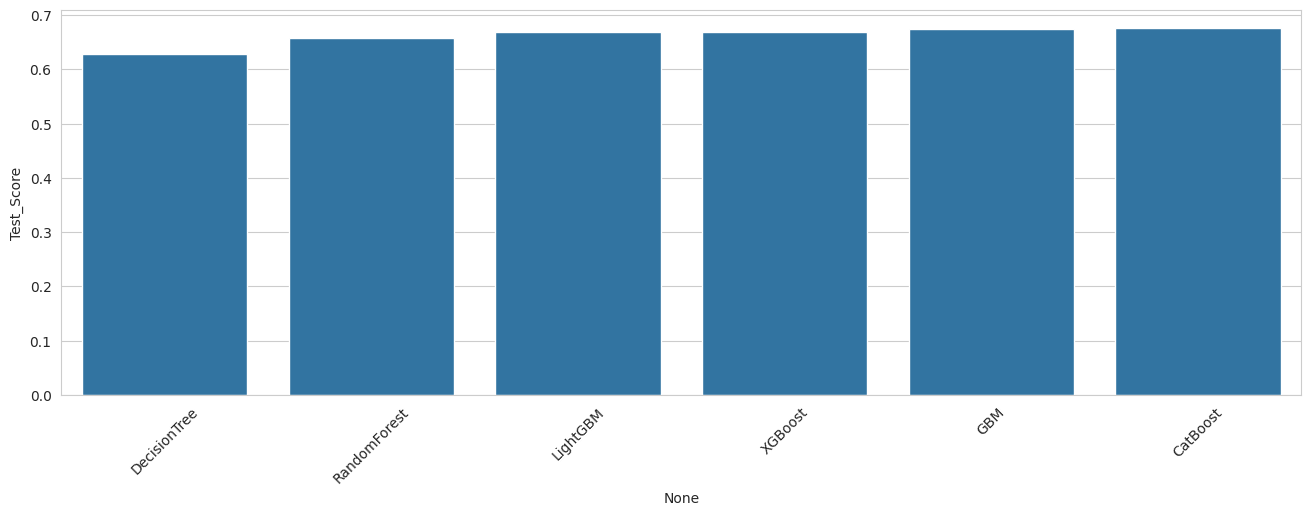

In [128]:
#Comparing different models on graphs
plt.figure(figsize=(16,5))
data_test=data_test.sort_values("Test_Score")
sns.barplot(x=data_test.index,y=data_test.Test_Score)
plt.xticks(rotation=45)

([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'DecisionTree'),
  Text(1, 0, 'RandomForest'),
  Text(2, 0, 'XGBoost'),
  Text(3, 0, 'GBM'),
  Text(4, 0, 'LightGBM'),
  Text(5, 0, 'CatBoost')])

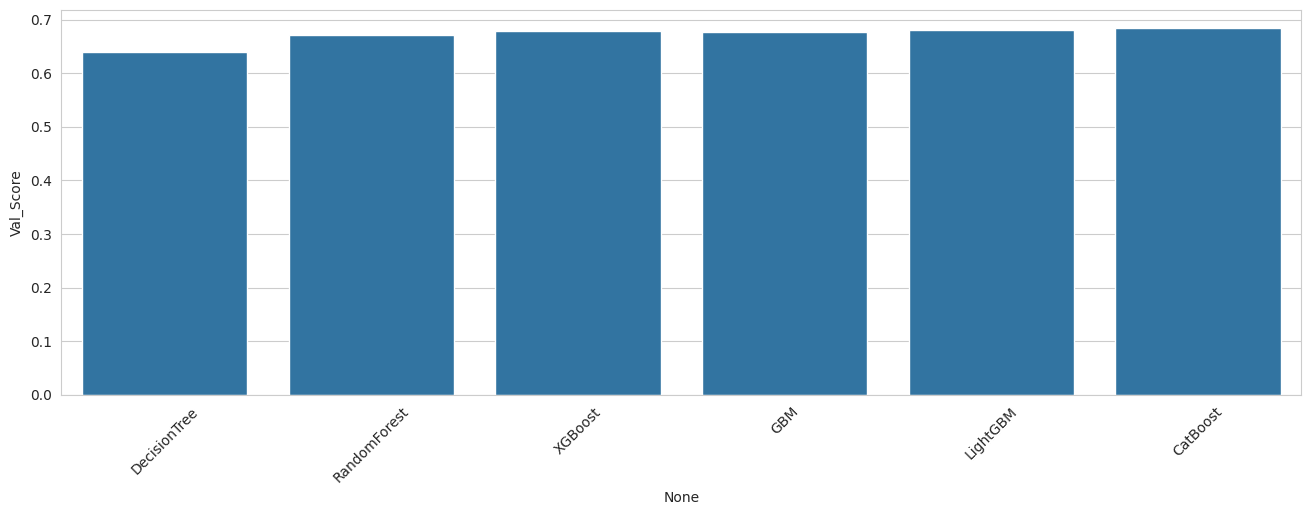

In [129]:
#Comparing different models on graphs
plt.figure(figsize=(16,5))
data_test=data_val.sort_values("Val_Score")
sns.barplot(x=data_test.index,y=data_val.Val_Score)
plt.xticks(rotation=45)